<a href="https://colab.research.google.com/github/asma-gud/Student-Dropout-and-Success-Prediction/blob/main/projet_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC

In [ ]:
 # Mount Google Drive
 from google.colab import drive
 drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
 delimiter = ','  # Change this if your CSV file uses a different delimiter
 csv = pd.read_csv('/content/drive/MyDrive/ML/dataset.csv',delimiter=delimiter)
 df= pd.DataFrame(csv)


# **Description of the dataset**

In [ ]:
df.shape

(4424, 35)

In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [ ]:
df.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.000000                1.000000     1.000000   
25%                      1.000000                1.000000     1.000000   
50%                      1.000000                1.000000     1.000000   
75%                      1.000000                1.000000     1.000000   
max                      1.000000               17.000000    21.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             4424.000000             4424.000000          4424.000000   
mean                12.322107               16.455244             7.317812   
std                  9.026251               11.044800             3.997828   
min                  1.000000                1.000000             1.000000   
25%                  2.000000                3.000000             5.000000   
50%                 13.000000               14.000000             6.000000   
75%                 22.000000               27.000000            10.000000   
max                 29.000000               34.000000            32.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                     4424.000000   
mean   ...                                        0.137658   
std    ...                                        0.690880   
min    ...                                        0.000000   
25%    ...                                        0.000000   
50%    ...                                        0.000000   
75%    ...                                        0.000000   
max    ...                                       12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                          4424.000000        

In [ ]:
df.describe(include = ['O'])

Target
count       4424
unique         3
top     Graduate
freq        2209

In [ ]:
df.head(10)

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   
5               2                12                  1      17   
6               1                 1                  1      12   
7               1                 9                  4      11   
8               1                 1                  3      10   
9               1                 1                  1      10   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   
5                           0                      12            1   
6                           1                       1            1   
7                           1                       1            1   
8                           1                       1           15   
9                           1                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   
5                      22                      27                   10  ...   
6                      13                      28                    8  ...   
7                      22                      27                   10  ...   
8                       1                       1                   10  ...   
9                       1                      14                    5  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   
5                                    0                                    5   
6                                    0                                    8   
7                                    0                                    5   
8                                    0                                    6   
9                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   
5                                      17   
6                                       8   
7                                       5   
8                                       7   
9                                      14   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
# Check for null values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [ ]:
# Check for duplicated values
df.duplicated().sum()

0

In [ ]:
df_columns = df.columns[0].split(';')

# Create a new DataFrame with the reshaped columns
df_reshaped = pd.DataFrame(columns=df_columns)

# Display the reshaped DataFrame
print(df_reshaped)

Empty DataFrame
Columns: [Marital status]
Index: []


In [ ]:
# Display the Target values
df['Target'].unique()


array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

# **Data visualization**

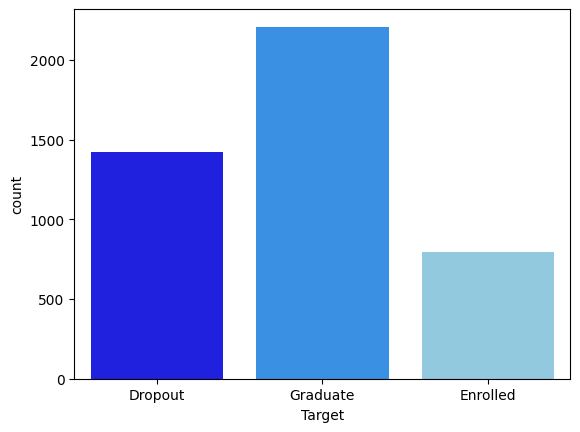

In [ ]:
# Data distrubution
sns.countplot(data=df, x='Target',hue='Target', palette=["blue","dodgerblue", "skyblue"])
plt.show()

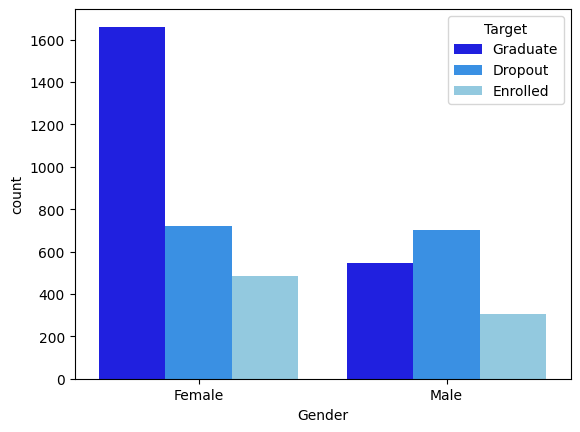

In [ ]:
# Gender repartition
sns.countplot(data=df, x='Gender', hue='Target', palette=["blue","dodgerblue", "skyblue"])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.show()

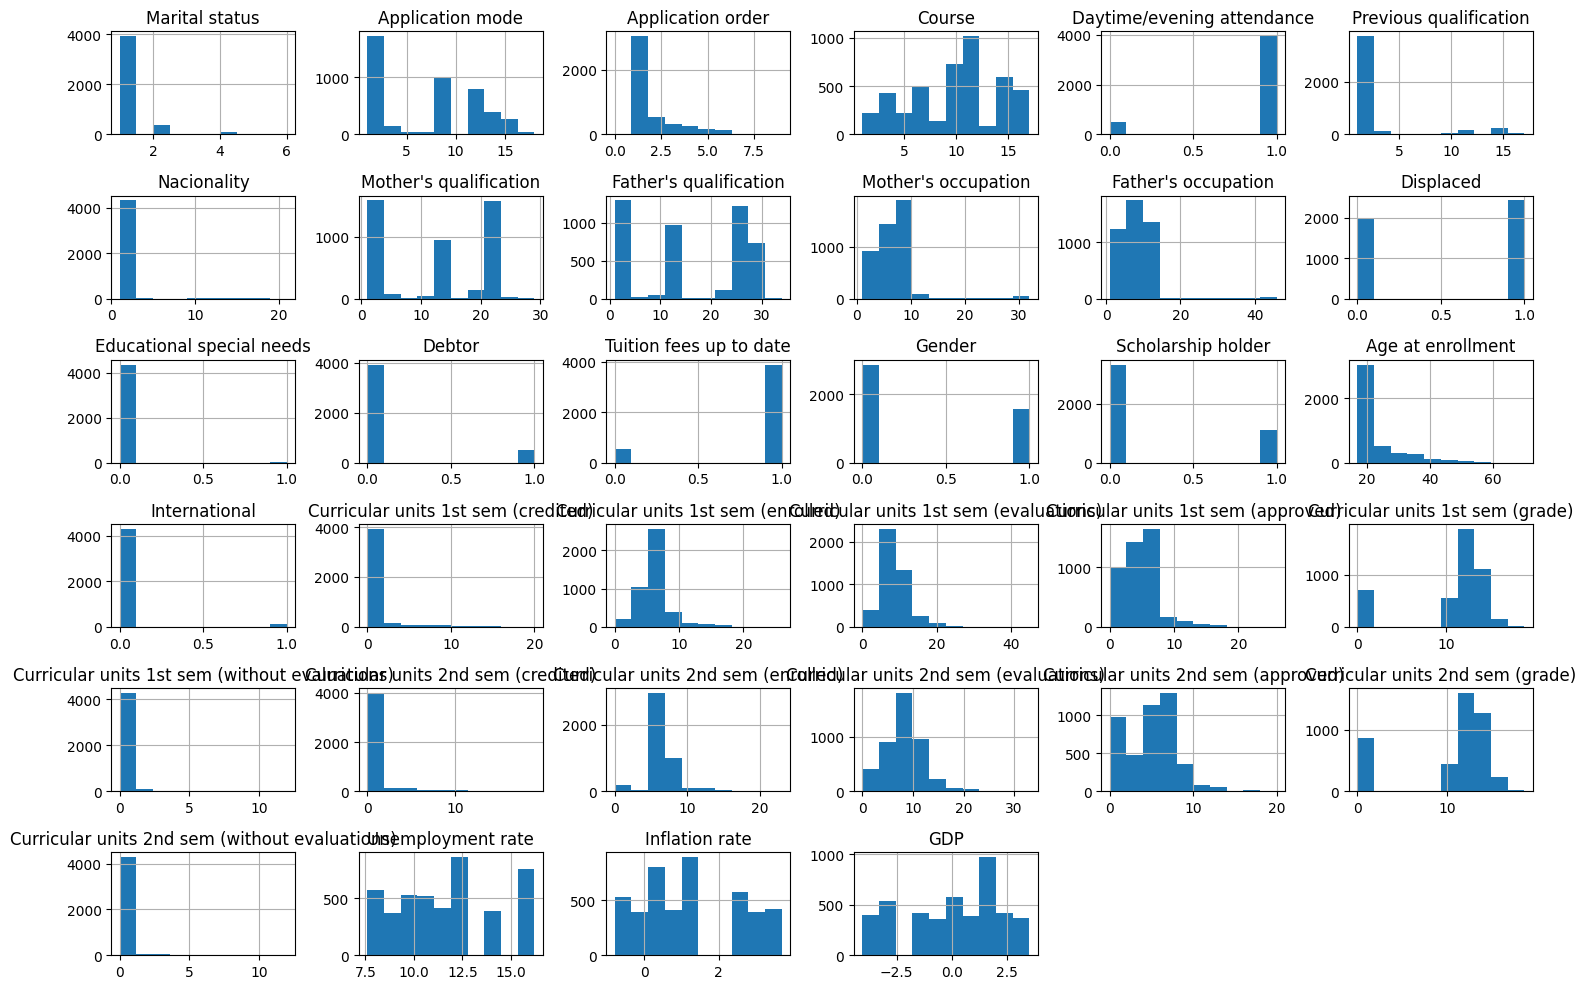

In [ ]:
# Histogram for the repartition of each column
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

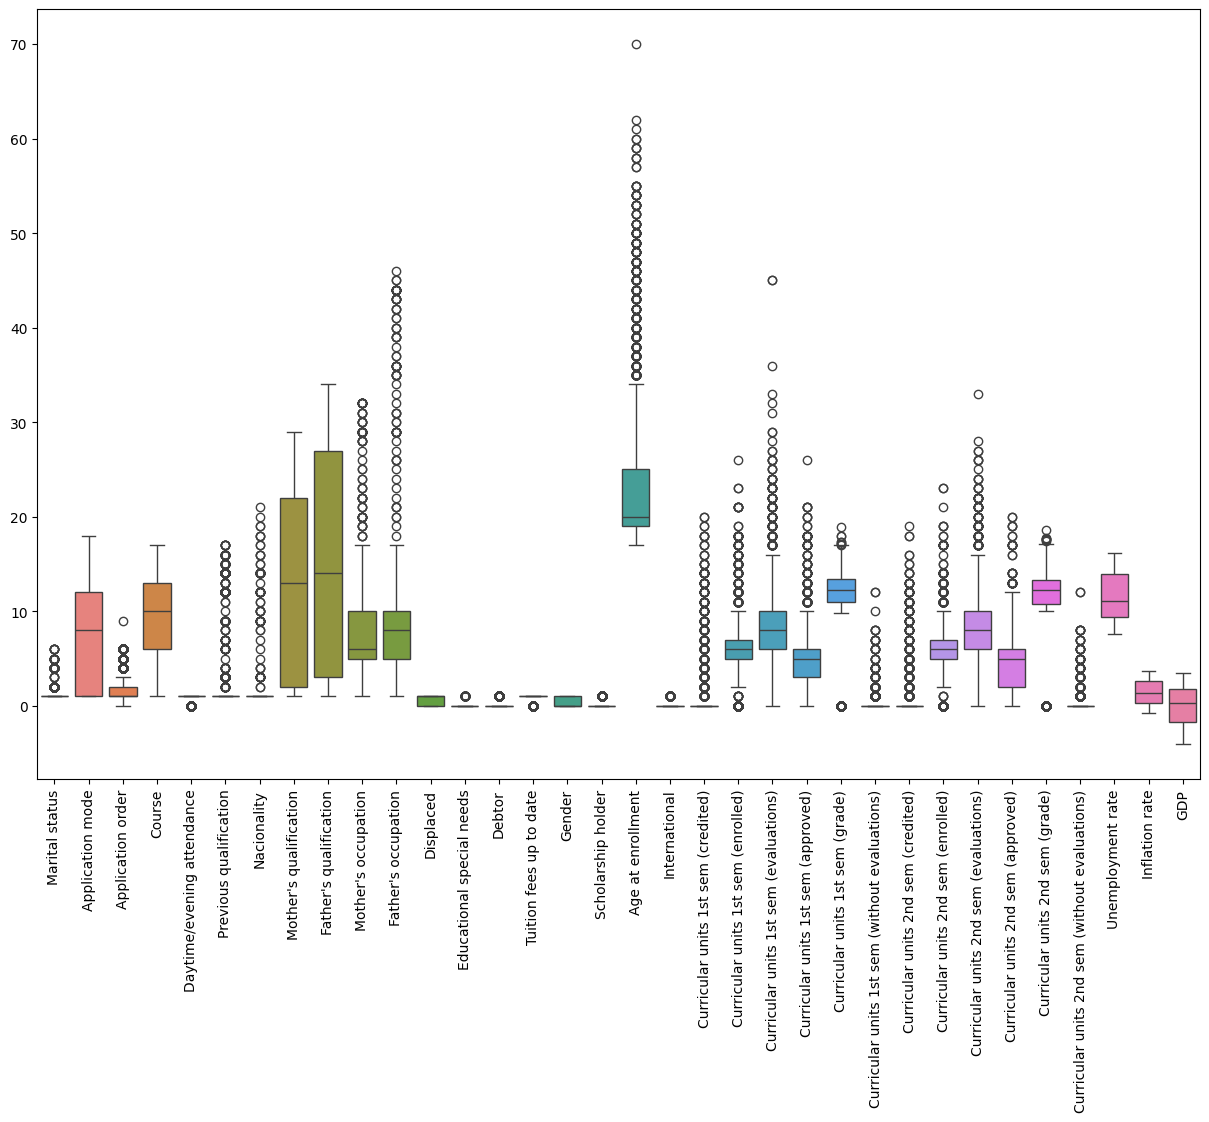

In [ ]:
# Box plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Age at enrollment', ylabel='Count'>

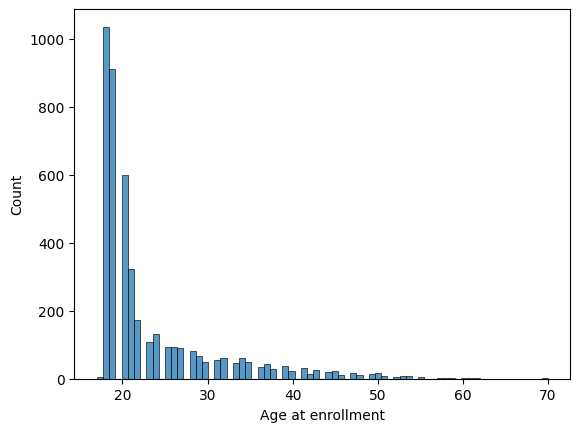

In [ ]:
sns.histplot(data=df['Age at enrollment'])

# **Data preprocessing**

In [ ]:
# To work with the same values all along
import random
random.seed(10)

## **Delete the "Enrolled" category**

In [ ]:
# Delete the "Enrolled" category
new_target = df['Target'].replace({'Enrolled': None})
df = df[new_target.notnull()]
df.drop

<bound method DataFrame.drop of       Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3  

In [ ]:
df.shape

(3630, 35)

In [ ]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [ ]:
df['Target'].value_counts(normalize=True)

Target
Graduate    0.60854
Dropout     0.39146
Name: proportion, dtype: float64

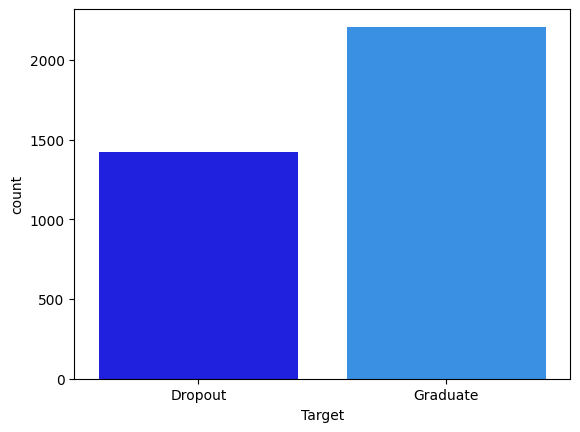

In [ ]:
# Display new distribution
sns.countplot(x='Target', data=df,hue='Target', palette=["blue","dodgerblue"])
plt.show()

In [ ]:
df.head(10)

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   
5               2                12                  1      17   
6               1                 1                  1      12   
7               1                 9                  4      11   
8               1                 1                  3      10   
9               1                 1                  1      10   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   
5                           0                      12            1   
6                           1                       1            1   
7                           1                       1            1   
8                           1                       1           15   
9                           1                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   
5                      22                      27                   10  ...   
6                      13                      28                    8  ...   
7                      22                      27                   10  ...   
8                       1                       1                   10  ...   
9                       1                      14                    5  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   
5                                    0                                    5   
6                                    0                                    8   
7                                    0                                    5   
8                                    0                                    6   
9                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   
5                                      17   
6                                       8   
7                                       5   
8                                       7   
9                                      14   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0   

## **Binary encoding for the target**

In [ ]:
# Binary encoding for the target
df_copy = df.copy()
df_copy['Target2'] = df_copy['Target'].map({'Graduate': 1, 'Dropout': 0})
df_copy.drop(columns=['Target'], inplace=True)
df_copy.rename(columns={'Target2': 'Target'}, inplace=True)

In [ ]:
df_copy.head(10)

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   
5               2                12                  1      17   
6               1                 1                  1      12   
7               1                 9                  4      11   
8               1                 1                  3      10   
9               1                 1                  1      10   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   
5                           0                      12            1   
6                           1                       1            1   
7                           1                       1            1   
8                           1                       1           15   
9                           1                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   
5                      22                      27                   10  ...   
6                      13                      28                    8  ...   
7                      22                      27                   10  ...   
8                       1                       1                   10  ...   
9                       1                      14                    5  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   
5                                    0                                    5   
6                                    0                                    8   
7                                    0                                    5   
8                                    0                                    6   
9                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   
5                                      17   
6                                       8   
7                                       5   
8                                       7   
9                                      14   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0   

## **Nationality generalization**

In [ ]:
df_copy['Nacionality'].unique()

array([ 1, 15,  3, 14, 12, 18,  5, 11, 17,  4,  9, 16, 10, 21,  2,  8,  6,
        7, 19])

In [ ]:
# Nationality generalization
conditions = [
    df_copy['Nacionality'].isin([1, 2, 3, 4, 5, 6, 7, 15, 16, 18, 19]),
    df_copy['Nacionality'].isin([8, 9, 10, 11, 12]),
    df_copy['Nacionality'].eq(13),
    df_copy['Nacionality'].isin([14, 17, 20, 21])
]

values = [0, 1, 2, 3]
df_copy['Nationality'] = np.select(conditions, values, default=-1)
df_copy['Nationality'] = df_copy['Nationality'].astype(int)
df_copy.drop(columns=['Nacionality'], inplace=True)

In [ ]:
# Change the position of the column
nationality_column = df_copy.pop('Nationality')
df_copy.insert(6, 'Nationality', nationality_column)

In [ ]:
df_copy.head(10)

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   
5               2                12                  1      17   
6               1                 1                  1      12   
7               1                 9                  4      11   
8               1                 1                  3      10   
9               1                 1                  1      10   

   Daytime/evening attendance  Previous qualification  Nationality  \
0                           1                       1            0   
1                           1                       1            0   
2                           1                       1            0   
3                           1                       1            0   
4                           0                       1            0   
5                           0                      12            0   
6                           1                       1            0   
7                           1                       1            0   
8                           1                       1            0   
9                           1                       1            0   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   
5                      22                      27                   10  ...   
6                      13                      28                    8  ...   
7                      22                      27                   10  ...   
8                       1                       1                   10  ...   
9                       1                      14                    5  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   
5                                    0                                    5   
6                                    0                                    8   
7                                    0                                    5   
8                                    0                                    6   
9                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   
5                                      17   
6                                       8   
7                                       5   
8                                       7   
9                                      14   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0   

## **Droping the less correlated features**

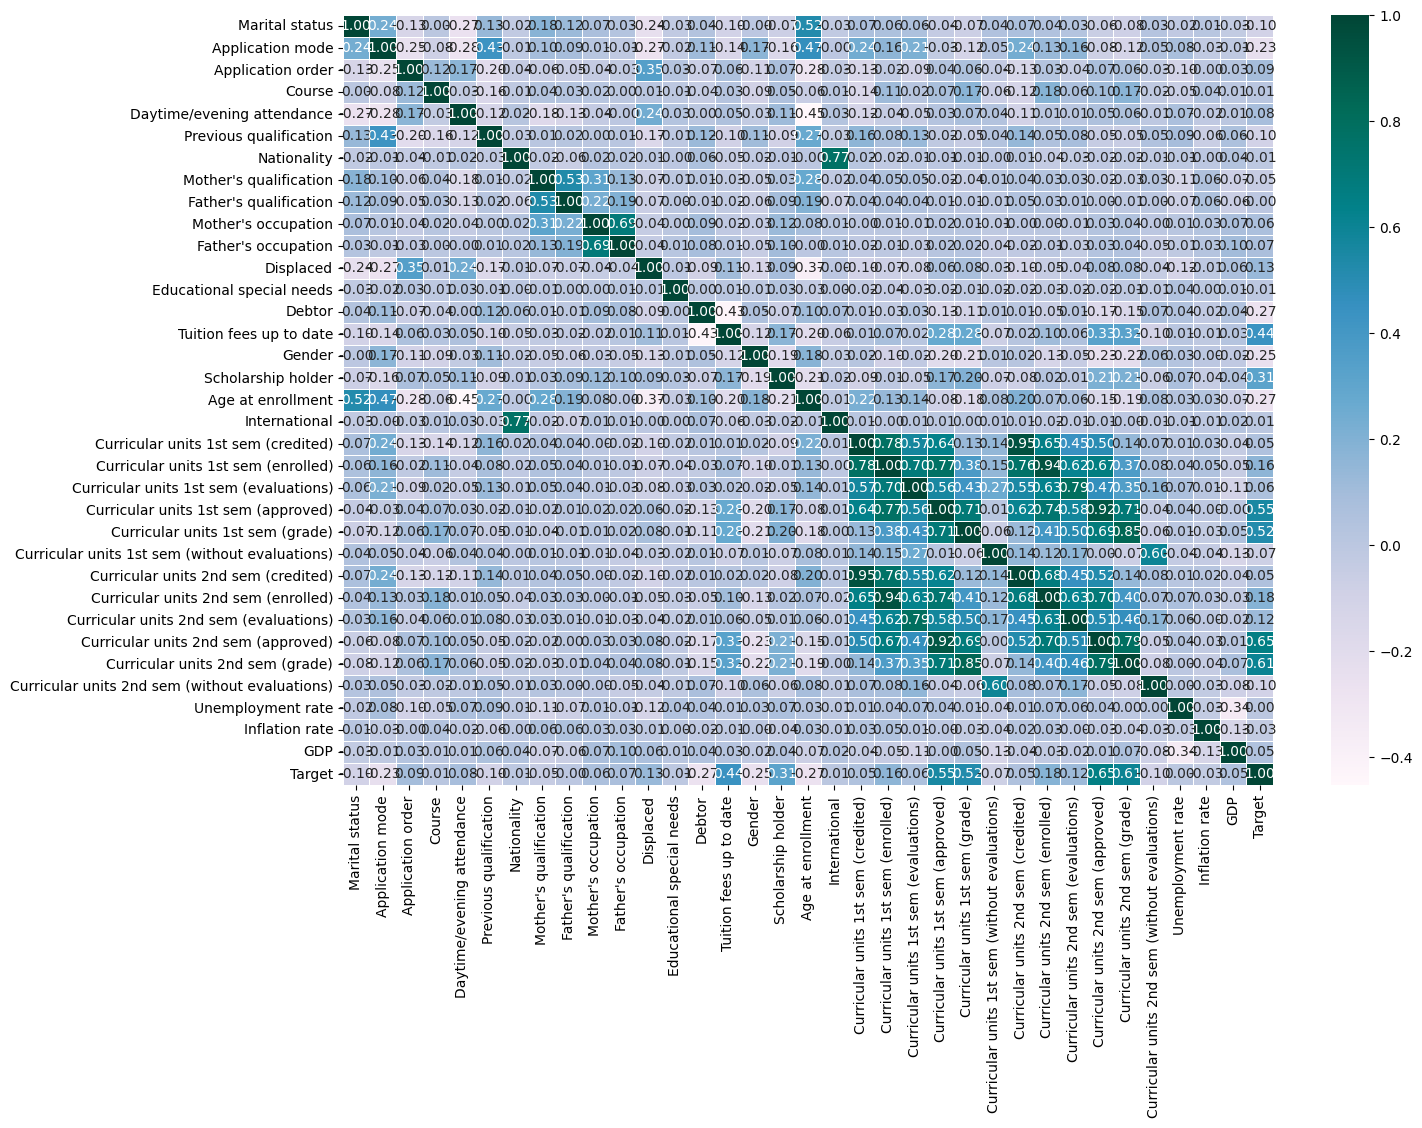

In [ ]:
# Visualizing the correlation matrix
corr_matrix = df_copy.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 xticklabels = True,
                 yticklabels = True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="PuBuGn")

In [ ]:
# Calculating the correlation between features and the target
df_copy.corr()['Target']

Marital status                                   -0.100479
Application mode                                 -0.233888
Application order                                 0.094355
Course                                            0.006814
Daytime/evening attendance                        0.084496
Previous qualification                           -0.102795
Nationality                                      -0.005429
Mother's qualification                           -0.048459
Father's qualification                           -0.003850
Mother's occupation                               0.064195
Father's occupation                               0.073238
Displaced                                         0.126113
Educational special needs                        -0.007254
Debtor                                           -0.267207
Tuition fees up to date                           0.442138
Gender                                           -0.251955
Scholarship holder                                0.3130

The closer it is to 0, the less correlated it is with the target feature.

* Course                                            0.006814
* Nationality                                      -0.005429
* Mother's qualification                           -0.048459
* Father's qualification                           -0.003850
* Educational special needs                        -0.007254
* International                                     0.006181
* Unemployment rate                                 0.004198
* Inflation rate                                   -0.030326

In [ ]:
# Droping the less correlated features
df_droped = df_copy.copy()
df_droped.drop(columns=['Course', 'Nationality', "Mother's qualification","Father's qualification", 'Educational special needs', 'International', 'Unemployment rate', 'Inflation rate'], inplace=True)

In [ ]:
df_droped.head()

Marital status  Application mode  Application order  \
0               1                 8                  5   
1               1                 6                  1   
2               1                 1                  5   
3               1                 8                  2   
4               2                12                  1   

   Daytime/evening attendance  Previous qualification  Mother's occupation  \
0                           1                       1                    6   
1                           1                       1                    4   
2                           1                       1                   10   
3                           1                       1                    6   
4                           0                       1                   10   

   Father's occupation  Displaced  Debtor  Tuition fees up to date  ...  \
0                   10          1       0                        1  ...   
1                    4          1       0                        0  ...   
2                   10          1       0                        0  ...   
3                    4          1       0                        1  ...   
4                   10          0       0                        1  ...   

   Curricular units 1st sem (grade)  \
0                          0.000000   
1                         14.000000   
2                          0.000000   
3                         13.428571   
4                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)   GDP  Target  
0                                               0  1.74       0  
1                                               0  0.79       1  
2                                               0  1.74       0  
3                                               0 -3.12       1  
4                                               0  0.79       1  

[5 rows x 27 columns]

In [ ]:
df_droped.shape

(3630, 27)

## **Forward Feature construction**

In [ ]:
data = df_droped
# Split features and target variable
X = data.drop(columns=['Target'])
y = data['Target']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize an empty set of selected features
selected_features = []
best_performance = 0

while len(selected_features) < len(X.columns):
    # Initialize variables to keep track of the best feature to add
    best_feature = None
    best_accuracy = 0

    # Iterate over features not yet selected
    for feature in X.columns:
        if feature not in selected_features:
            # Add the feature to the selected features
            features_to_use = selected_features + [feature]

            # Train a model using only the selected features
            model = RandomForestClassifier(random_state=42)
            model.fit(X_train[features_to_use], y_train)

            # Evaluate the model's performance on the validation set
            y_pred = model.predict(X_test[features_to_use])
            accuracy = accuracy_score(y_test, y_pred)

            # Check if adding this feature improves performance
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature

    # Add the best feature to the selected features
    selected_features.append(best_feature)
    print(f"Selected feature: {best_feature}, Accuracy: {best_accuracy}")

    # Update best performance if necessary
    if best_accuracy > best_performance:
        best_performance = best_accuracy
        best_selected_features = selected_features.copy()




Selected feature: Curricular units 2nd sem (approved), Accuracy: 0.8677685950413223
Selected feature: Tuition fees up to date, Accuracy: 0.8884297520661157
Selected feature: Curricular units 2nd sem (enrolled), Accuracy: 0.8980716253443526
Selected feature: Debtor, Accuracy: 0.8994490358126722
Selected feature: Curricular units 1st sem (credited), Accuracy: 0.9022038567493113
Selected feature: Daytime/evening attendance, Accuracy: 0.9077134986225895
Selected feature: Curricular units 1st sem (approved), Accuracy: 0.9104683195592287
Selected feature: Scholarship holder, Accuracy: 0.9104683195592287
Selected feature: Previous qualification, Accuracy: 0.9173553719008265
Selected feature: Displaced, Accuracy: 0.9146005509641874
Selected feature: Application order, Accuracy: 0.9118457300275482
Selected feature: Gender, Accuracy: 0.9146005509641874
Selected feature: Curricular units 2nd sem (credited), Accuracy: 0.9146005509641874
Selected feature: Curricular units 1st sem (enrolled), Accura

In [ ]:
print("Best selected features:", best_selected_features)
print("Best performance:", best_performance)

Best selected features: ['Curricular units 2nd sem (approved)', 'Tuition fees up to date', 'Curricular units 2nd sem (enrolled)', 'Debtor', 'Curricular units 1st sem (credited)', 'Daytime/evening attendance', 'Curricular units 1st sem (approved)', 'Scholarship holder', 'Previous qualification']
Best performance: 0.9173553719008265


In [ ]:
# Select only the best selected features
df_ffc = data[best_selected_features + ['Target']]
df_ffc.head()

Curricular units 2nd sem (approved)  Tuition fees up to date  \
0                                    0                        1   
1                                    6                        0   
2                                    0                        0   
3                                    5                        1   
4                                    6                        1   

   Curricular units 2nd sem (enrolled)  Debtor  \
0                                    0       0   
1                                    6       0   
2                                    6       0   
3                                    6       0   
4                                    6       0   

   Curricular units 1st sem (credited)  Daytime/evening attendance  \
0                                    0                           1   
1                                    0                           1   
2                                    0                           1   
3                                    0                           1   
4                                    0                           0   

   Curricular units 1st sem (approved)  Scholarship holder  \
0                                    0                   0   
1                                    6                   0   
2                                    0                   0   
3                                    6                   0   
4                                    5                   0   

   Previous qualification  Target  
0                       1       0  
1                       1       1  
2                       1       0  
3                       1       1  
4                       1       1

In [ ]:
df_ffc.shape

(3630, 10)

In [ ]:
df_ffc.columns

Index(['Curricular units 2nd sem (approved)', 'Tuition fees up to date',
       'Curricular units 2nd sem (enrolled)', 'Debtor',
       'Curricular units 1st sem (credited)', 'Daytime/evening attendance',
       'Curricular units 1st sem (approved)', 'Scholarship holder',
       'Previous qualification', 'Target'],
      dtype='object')

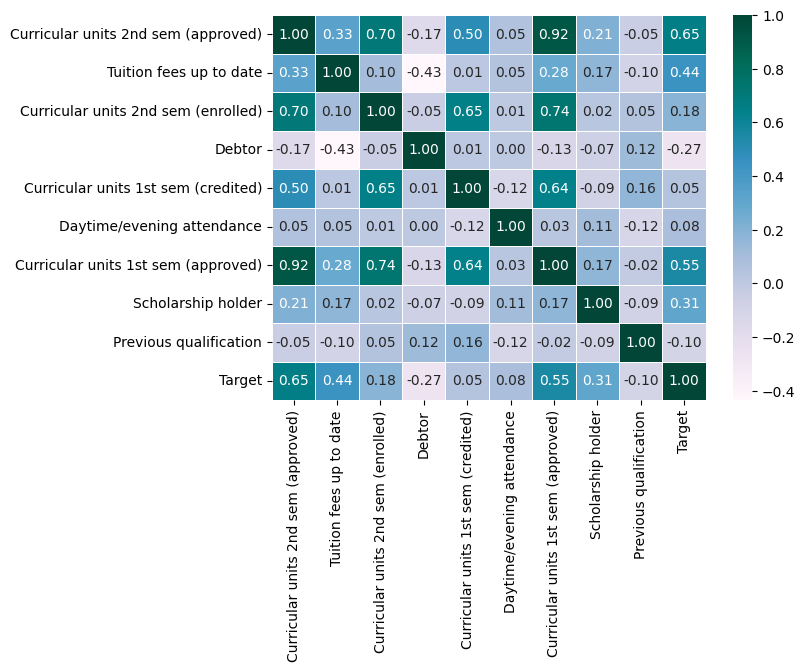

In [ ]:
# Visualizing the correlation matrix
corr_matrix = df_ffc.corr()
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="PuBuGn")

## Feature selection




In [ ]:
dataf = df_copy

In [ ]:
X = dataf.drop(columns=["Target"])
y = dataf["Target"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=0.95)

In [ ]:
X_pca = pca.fit_transform(X_scaled)

In [ ]:
print("Nombre de composantes principales sélectionnées:", pca.n_components_)

Nombre de composantes principales sélectionnées: 25


In [ ]:
print("Variance expliquée par chaque composante:", pca.explained_variance_ratio_)

Variance expliquée par chaque composante: [0.18810515 0.10845231 0.06632279 0.05401429 0.05014819 0.04298866
 0.04213335 0.04003768 0.03675241 0.03112404 0.0294141  0.02884452
 0.02717501 0.02623763 0.02465528 0.02271353 0.02141508 0.01882332
 0.01789409 0.01655938 0.01533293 0.01450099 0.01410107 0.01125169
 0.00994293]


## **Handling Outliers**

**Detecting outliers using Z-score method**

In [ ]:
numeric_cols = df_ffc.select_dtypes(include=np.number).columns.tolist()
exclude_cols = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation', 'Gender', 'International', 'Target']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
z_scores = df_ffc[numeric_cols].apply(zscore)
threshold = 3
outliers = (np.abs(z_scores) > threshold).any(axis=1)
clean_df = df_ffc[~outliers]

**Handling outliers**

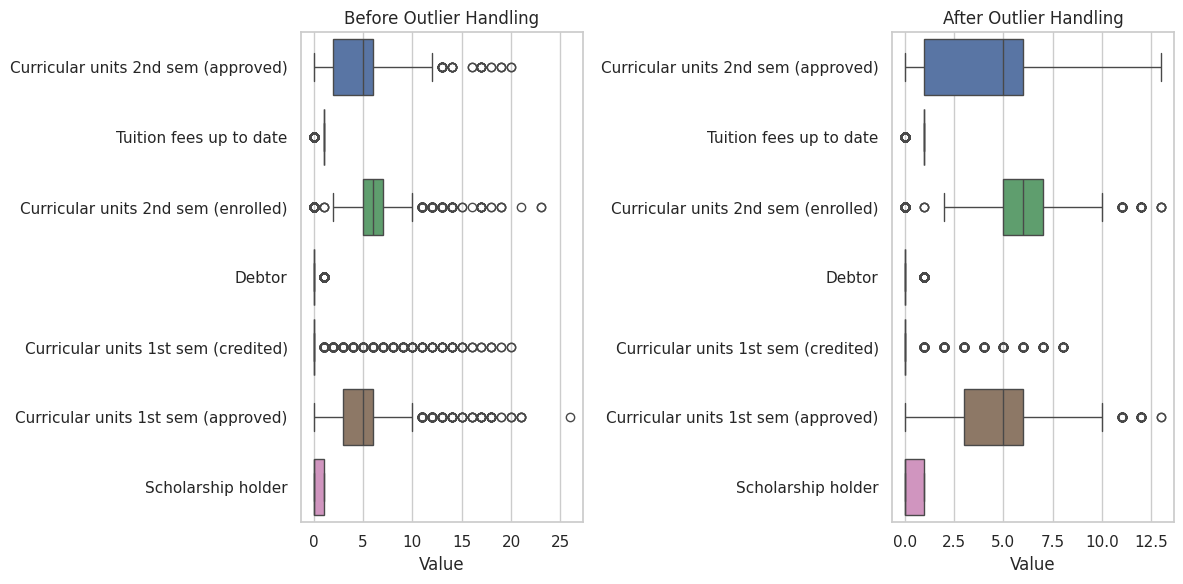

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot before outlier handling
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Before Outlier Handling")
plt.xlabel("Value")

# Plot after outlier handling
plt.subplot(1, 2, 2)
sns.boxplot(data=clean_df[numeric_cols], orient="h")
plt.title("After Outlier Handling")
plt.xlabel("Value")

plt.tight_layout()
plt.show()


In [ ]:
clean_df.shape

(3515, 10)

# **Learning phase**

> * Precision = TP/(TP + FP)
> * Accuracy = (TP + TN)/(TP + TN + FP + FN)
> * Recall = TP/(TP + FN)

##**Linear Regression with cross-validation**

### Uncleaned Dataset

In [ ]:
#select la cible
X = df_copy.drop(columns=["Target"])
y = df_copy["Target"]

In [ ]:
#initialiser
model = LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
scores_recall = cross_val_score(model, X, y, cv=5, scoring='recall')

In [ ]:
print("Accuracy avec df_ffc (9 fonctionnalités)", scores)
print("Accuracy moyen:", scores.mean())
print("\nRecall avec df_ffc (9 fonctionnalités):", scores_recall)
print("Recall moyen:", scores_recall.mean())

Accuracy avec df_ffc (9 fonctionnalités) [0.92561983 0.91046832 0.91184573 0.9077135  0.90909091]
Accuracy moyen: 0.9129476584022038

Recall avec df_ffc (9 fonctionnalités): [0.97505669 0.95701357 0.96153846 0.95701357 0.96153846]
Recall moyen: 0.9624321523481187


### Forward Construction Dataset

In [ ]:
X_ffc = df_ffc.drop(columns=["Target"])
y_ffc = df_ffc["Target"]

In [ ]:
model_ffc = LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
scores_accuracy_ffc = cross_val_score(model_ffc, X_ffc, y_ffc, cv=5, scoring='accuracy')
scores_recall_ffc = cross_val_score(model_ffc, X_ffc, y_ffc, cv=5, scoring='recall')

In [ ]:
print("Accuracy avec df_ffc (9 fonctionnalités):", scores_accuracy_ffc)
print("Accuracy moyenne:", scores_accuracy_ffc.mean())
print("\nRecall avec df_ffc (9 fonctionnalités):", scores_recall_ffc)
print("Recall moyen:", scores_recall_ffc.mean())

Accuracy avec df_ffc (9 fonctionnalités): [0.91735537 0.90633609 0.89807163 0.9077135  0.90495868]
Accuracy moyenne: 0.9068870523415977

Recall avec df_ffc (9 fonctionnalités): [0.95464853 0.94570136 0.93438914 0.96606335 0.9638009 ]
Recall moyen: 0.9529206554416639


### Dropped Dataset

In [ ]:
X_droped = df_droped.drop(columns=["Target"])
y_droped = df_droped["Target"]

In [ ]:
model_droped = LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
scores_accuracy_droped = cross_val_score(model_droped, X_droped, y_droped, cv=5, scoring='accuracy')
scores_recall_droped = cross_val_score(model_droped, X_droped, y_droped, cv=5, scoring='recall')

In [ ]:
print("Accuracy avec df_droped (9 fonctionnalités):", scores_accuracy_droped)
print("Accuracy moyenne:", scores_accuracy_droped.mean())
print("\nRecall avec df_droped (9 fonctionnalités):", scores_recall_droped)
print("Recall moyen:", scores_recall_droped.mean())

Accuracy avec df_droped (9 fonctionnalités): [0.92699725 0.91322314 0.91184573 0.90495868 0.91184573]
Accuracy moyenne: 0.9137741046831955

Recall avec df_droped (9 fonctionnalités): [0.97278912 0.96153846 0.95248869 0.95248869 0.95927602]
Recall moyen: 0.9597161941699758


### Comparaison Between Dataset

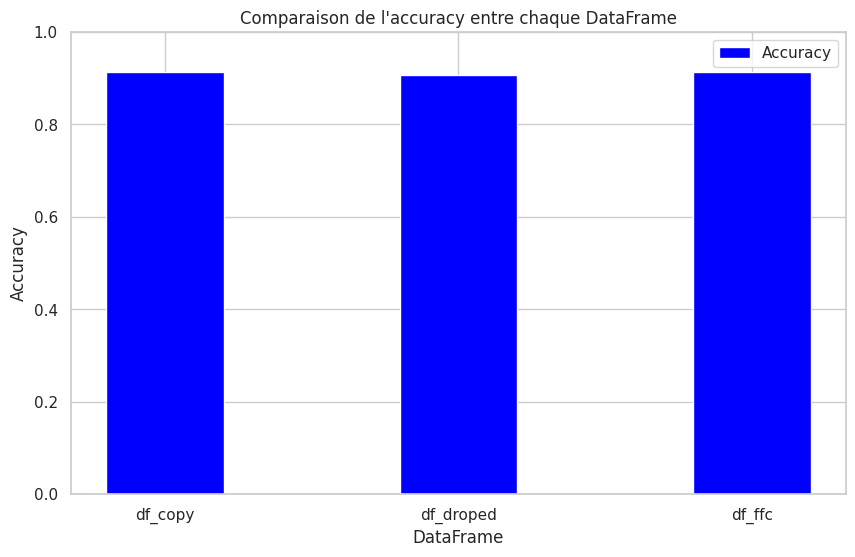

In [ ]:
# Données
datasets = ['df_copy', 'df_droped', 'df_ffc']
accuracies = [0.9126721763085399, 0.9071625344352616, 0.9132231404958677]
recalls = [0.9574496465252768, 0.9533731441294467, 0.9592647315336391]

# Créer un graphique à barres pour l'accuracy
plt.figure(figsize=(10, 6))
plt.bar(datasets, accuracies, color='blue', width=0.4, label='Accuracy')
plt.title('Comparaison de l\'accuracy entre chaque DataFrame')
plt.xlabel('DataFrame')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.legend()
plt.show()

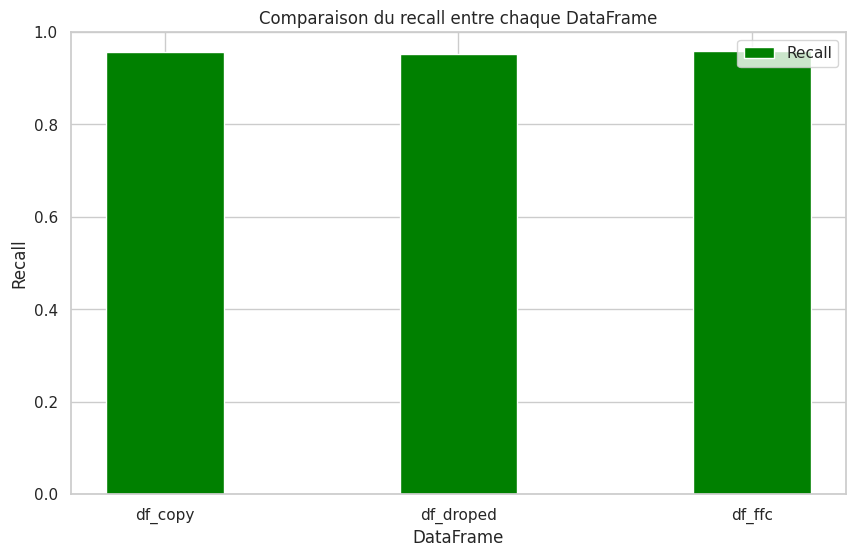

In [ ]:
# Créer un graphique à barres pour le recall
plt.figure(figsize=(10, 6))
plt.bar(datasets, recalls, color='green', width=0.4, label='Recall')
plt.title('Comparaison du recall entre chaque DataFrame')
plt.xlabel('DataFrame')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.legend()
plt.show()



```
# Ce texte est au format code
```

## **K Nearest Neighbors**

### **Uncleaned Dataset**

In [ ]:
# Splitting the data
X = df_copy.drop('Target', axis=1)
y = df_copy['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Building a classification model by testing different number of features
knn = KNeighborsClassifier()
precisions1 = []
accuracies1 = []
recalls1 = []
features = [num for num in range(1, len(X.columns) + 1)]
for num_feature in features:
    selected_features = X_train.iloc[:, :num_feature]
    knn.fit(selected_features, y_train) # Fit the K-NN classifier on the selected features
    selected_test_features = X_test.iloc[:, :num_feature]
    y_pred = knn.predict(selected_test_features)
    precision = precision_score(y_test, y_pred)
    precisions1.append(precision)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies1. append(accuracy)
    recall = recall_score(y_test, y_pred)
    recalls1.append(recall)
    print(f"\t{num_feature}\t\t {precision} \t\t {accuracy}\t\t {recall}")

	1		 0.4027777777777778 		 0.3622589531680441		 0.0645879732739421
	2		 0.6722689075630253 		 0.6639118457300276		 0.89086859688196
	3		 0.6327212020033389 		 0.6005509641873278		 0.844097995545657
	4		 0.7030567685589519 		 0.6377410468319559		 0.7171492204899778
	5		 0.7024070021881839 		 0.6363636363636364		 0.7149220489977728
	6		 0.7223529411764706 		 0.6418732782369146		 0.6837416481069042
	7		 0.7213114754098361 		 0.6418732782369146		 0.6859688195991092
	8		 0.7116564417177914 		 0.6666666666666666		 0.7750556792873051
	9		 0.6850715746421268 		 0.6308539944903582		 0.7461024498886414
	10		 0.6868686868686869 		 0.6363636363636364		 0.7572383073496659
	11		 0.6738703339882122 		 0.6253443526170799		 0.7639198218262806
	12		 0.6771653543307087 		 0.6294765840220385		 0.7661469933184856
	13		 0.6784313725490196 		 0.6322314049586777		 0.7706013363028953
	14		 0.6796875 		 0.6349862258953168		 0.7750556792873051
	15		 0.676923076923077 		 0.6349862258953168		 0.7839643652561247
	1

Best one : 31		 0.8048780487804879 		 0.8292011019283747		 0.955456570155902

In [ ]:
# Building a classification model by testing different number of neighbors
k_values = [i for i in range (1,21)]
precisions2 = []
accuracies2 = []
recalls2 = []
train_scores2 = []
test_scores2 = []
for k in k_values: # default=5
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precisions2.append(precision)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies2. append(accuracy)
    recall = recall_score(y_test, y_pred)
    recalls2.append(recall)
    train_score=knn.score(X_train,y_train)
    train_scores2.append(train_score)
    test_score=knn.score(X_test,y_test)
    test_scores2.append(test_score)
    if(k!=12):
        print(f"\t{k}\t\t {precision} \t\t {accuracy}\t\t {recall}")
    else :
        print(f"\t{k}\t\t {precision} \t\t\t {accuracy}\t\t {recall}")

	1		 0.8033126293995859 		 0.7851239669421488		 0.8641425389755011
	2		 0.8282828282828283 		 0.7396694214876033		 0.7305122494432071
	3		 0.8070175438596491 		 0.8154269972451791		 0.9220489977728286
	4		 0.8284518828451883 		 0.8140495867768595		 0.8819599109131403
	5		 0.8026565464895635 		 0.8209366391184573		 0.9420935412026726
	6		 0.8238866396761133 		 0.8223140495867769		 0.9064587973273942
	7		 0.7977736549165121 		 0.8236914600550964		 0.9576837416481069
	8		 0.8073929961089494 		 0.8168044077134986		 0.9242761692650334
	9		 0.7915129151291513 		 0.8168044077134986		 0.955456570155902
	10		 0.8061420345489443 		 0.8209366391184573		 0.9354120267260579
	11		 0.7952468007312614 		 0.8264462809917356		 0.9688195991091314
	12		 0.8060263653483992 			 0.8292011019283747		 0.9532293986636972
	13		 0.7967032967032966 		 0.8278236914600551		 0.9688195991091314
	14		 0.8011152416356877 		 0.8278236914600551		 0.9599109131403119
	15		 0.7862318840579711 		 0.8168044077134986		 0.966592

*   Best precision : 4		 **0.8284518828451883** 		 0.8140495867768595		 0.8819599109131403
*   Best accuracy : 13		 0.7967032967032966 		 **0.8278236914600551**		 0.9688195991091314 and	14		 0.8011152416356877 		 **0.8278236914600551**		 0.9599109131403119
*   Best recall : 19		 0.7870036101083032 		 0.8195592286501377		 **0.9710467706013363** and 17		 0.7898550724637681 		 0.8223140495867769		 **0.9710467706013363**

In [ ]:
# Building a classification model by testing different similarity measures
similarity_measures = ['euclidean', 'manhattan', 'cosine','minkowski']
precisions3 = []
accuracies3 = []
recalls3 = []
for measure in similarity_measures: # default=’minkowski’
    knn = KNeighborsClassifier(metric=measure)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precisions3.append(precision)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies3. append(accuracy)
    recall = recall_score(y_test, y_pred)
    recalls3.append(recall)
    print(f"    {measure.capitalize()}\t\t {precision}\t\t {accuracy}\t\t {recall}")

    Euclidean		 0.8026565464895635		 0.8209366391184573		 0.9420935412026726
    Manhattan		 0.8007448789571695		 0.8264462809917356		 0.9576837416481069
    Cosine		 0.8079847908745247		 0.8278236914600551		 0.9465478841870824
    Minkowski		 0.8026565464895635		 0.8209366391184573		 0.9420935412026726


Best precision and accuracy : Cosine		 **0.8079847908745247		 0.8278236914600551**		 0.9465478841870824
Best recall : Manhattan		 0.8007448789571695		 0.8264462809917356		 **0.9576837416481069**

Text(0, 0.5, 'Precision')

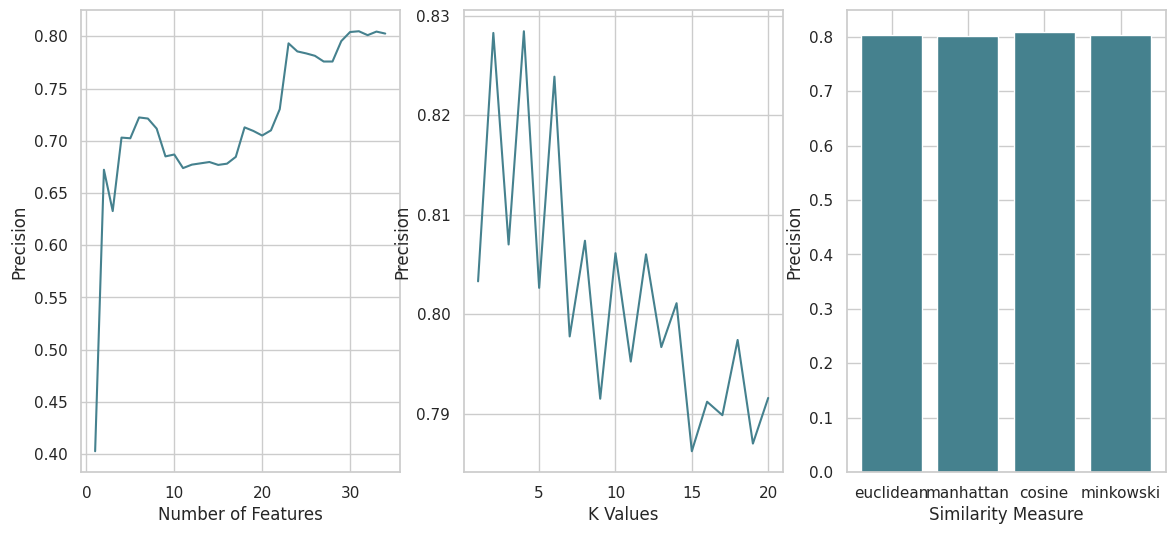

In [ ]:
# Precision results visualization
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# (a)
axs[0].plot(features, precisions1, color='#45818e')
axs[0].set_xlabel("Number of Features")
axs[0].set_ylabel("Precision")

# (b)
axs[1].plot(k_values, precisions2, color='#45818e')
axs[1].set_xlabel("K Values")
axs[1].set_ylabel("Precision")

# (c)
axs[2].bar(similarity_measures, precisions3, color='#45818e')
axs[2].set_xlabel("Similarity Measure")
axs[2].set_ylabel("Precision")

Text(0, 0.5, 'Accuracy')

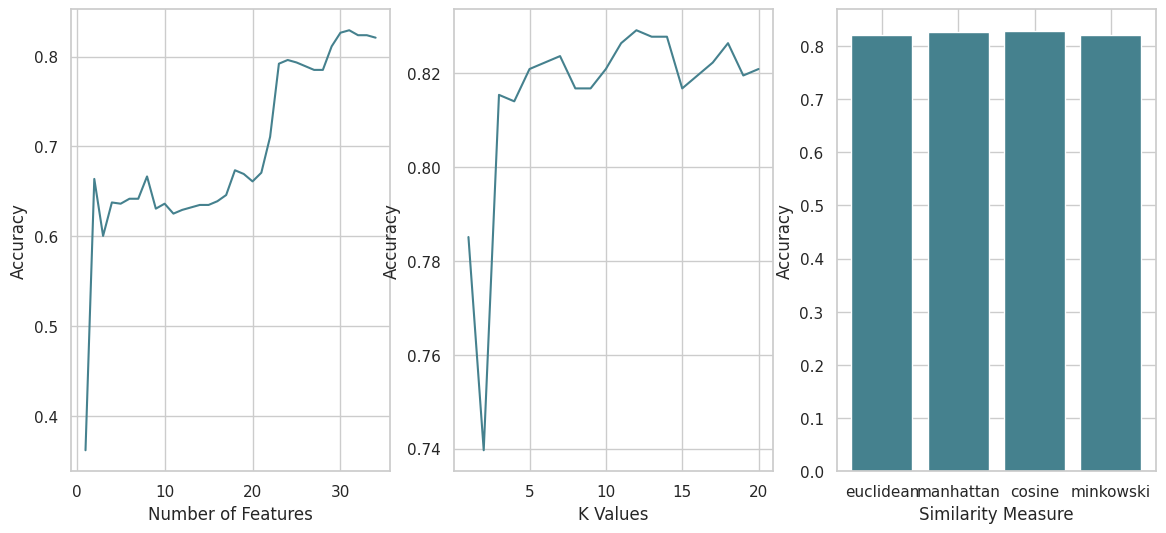

In [ ]:
# Accuracy results visualization
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# (a)
axs[0].plot(features, accuracies1, color='#45818e')
axs[0].set_xlabel("Number of Features")
axs[0].set_ylabel("Accuracy")

# (b)
axs[1].plot(k_values, accuracies2, color='#45818e')
axs[1].set_xlabel("K Values")
axs[1].set_ylabel("Accuracy")

# (c)
axs[2].bar(similarity_measures, accuracies3, color='#45818e')
axs[2].set_xlabel("Similarity Measure")
axs[2].set_ylabel("Accuracy")

Text(0, 0.5, 'Recall')

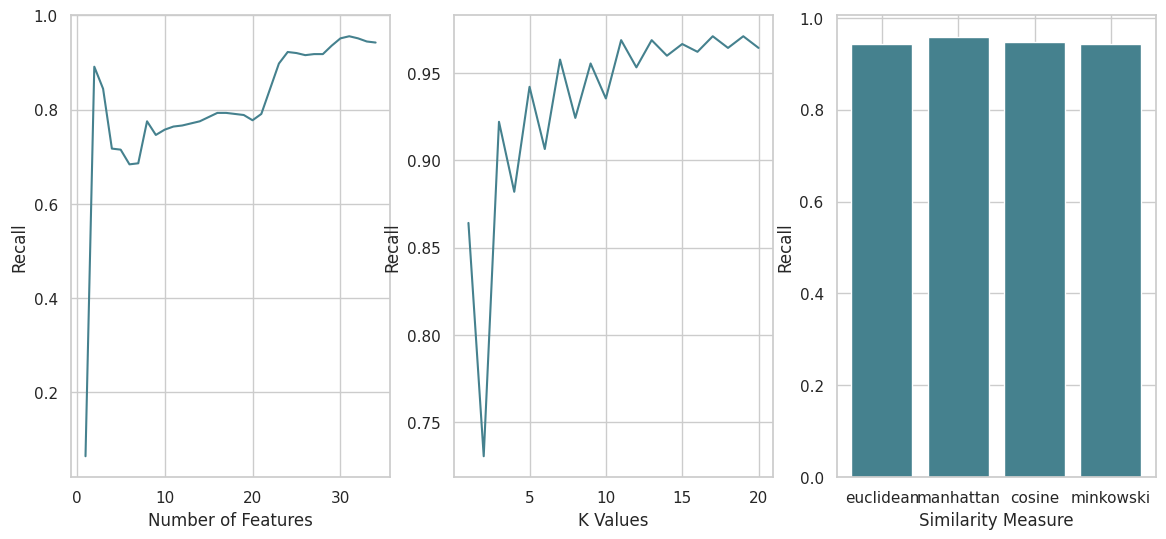

In [ ]:
# Recall results visualization
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# (a)
axs[0].plot(features, recalls1, color='#45818e')
axs[0].set_xlabel("Number of Features")
axs[0].set_ylabel("Recall")

# (b)
axs[1].plot(k_values, recalls2, color='#45818e')
axs[1].set_xlabel("K Values")
axs[1].set_ylabel("Recall")

# (c)
axs[2].bar(similarity_measures, recalls3, color='#45818e')
axs[2].set_xlabel("Similarity Measure")
axs[2].set_ylabel("Recall")

Text(0, 0.5, 'Scores')

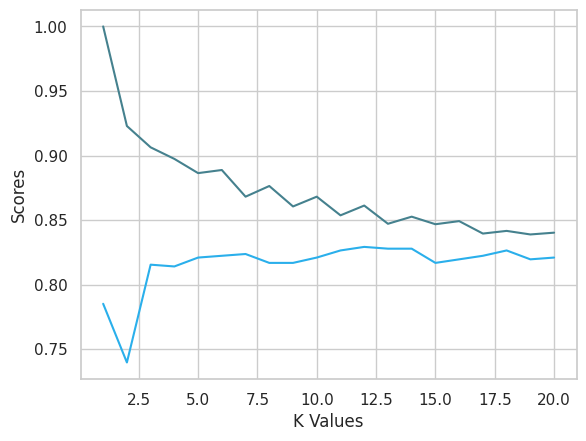

In [ ]:
# Scores results visualization according to k values
plt.plot(k_values, train_scores2, color='#45818e', label="Training score")
plt.plot(k_values, test_scores2, color='#2aafeb', label="Testing score")
plt.xlabel("K Values")
plt.ylabel("Scores")

In [ ]:
# Using GridSearchCV to determine the best_params_ for n_neighbors and metric
kf = KFold(n_splits=5,shuffle=True,random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1),
             'metric': ['euclidean', 'manhattan', 'cosine','minkowski']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
{'metric': 'manhattan', 'n_neighbors': 10}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy)
recall = recall_score(y_test, y_pred)
print("Recall : ",recall)

Accuracy :  0.837465564738292
Recall :  0.955456570155902


### Dropped Dataset

In [ ]:
# Splitting the data
X = df_droped.drop('Target', axis=1)
y = df_droped['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Building a classification model by testing different number of features
knn = KNeighborsClassifier()
precisions1 = []
accuracies1 = []
recalls1 = []
features = [num for num in range(1, len(X.columns) + 1)]
for num_feature in features:
    selected_features = X_train.iloc[:, :num_feature]
    knn.fit(selected_features, y_train) # Fit the K-NN classifier on the selected features
    selected_test_features = X_test.iloc[:, :num_feature]
    y_pred = knn.predict(selected_test_features)
    precision = precision_score(y_test, y_pred)
    precisions1.append(precision)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies1. append(accuracy)
    recall = recall_score(y_test, y_pred)
    recalls1.append(recall)
    print(f"\t{num_feature}\t\t {precision} \t\t {accuracy}\t\t {recall}")

	1		 0.4027777777777778 		 0.3622589531680441		 0.0645879732739421
	2		 0.6722689075630253 		 0.6639118457300276		 0.89086859688196
	3		 0.6327212020033389 		 0.6005509641873278		 0.844097995545657
	4		 0.6957403651115619 		 0.6473829201101928		 0.7639198218262806
	5		 0.6933333333333334 		 0.6611570247933884		 0.8106904231625836
	6		 0.6987951807228916 		 0.6542699724517906		 0.7750556792873051
	7		 0.7106382978723405 		 0.6542699724517906		 0.7438752783964365
	8		 0.7098901098901099 		 0.6446280991735537		 0.7193763919821826
	9		 0.7226890756302521 		 0.6735537190082644		 0.7661469933184856
	10		 0.7237903225806451 		 0.6873278236914601		 0.799554565701559
	11		 0.7313725490196078 		 0.7066115702479339		 0.8307349665924276
	12		 0.7387755102040816 		 0.7038567493112947		 0.8062360801781737
	13		 0.7274549098196392 		 0.6942148760330579		 0.8084632516703786
	14		 0.7329317269076305 		 0.7011019283746557		 0.8129175946547884
	15		 0.7379032258064516 		 0.7066115702479339		 0.8151447661

* Best precision and accuracy : 23		 **0.8336594911937377** 		 **0.8512396694214877**		 0.9487750556792873
* Best recall : 24		 0.8227360308285164 		 0.8429752066115702		 **0.9510022271714922**

In [ ]:
# Building a classification model by testing different number of neighbors
k_values = [i for i in range (1,21)]
precisions2 = []
accuracies2 = []
recalls2 = []
train_scores2 = []
test_scores2 = []
for k in k_values: # default=5
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precisions2.append(precision)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies2. append(accuracy)
    recall = recall_score(y_test, y_pred)
    recalls2.append(recall)
    train_score=knn.score(X_train,y_train)
    train_scores2.append(train_score)
    test_score=knn.score(X_test,y_test)
    test_scores2.append(test_score)
    if(k!=12):
        print(f"\t{k}\t\t {precision} \t\t {accuracy}\t\t {recall}")
    else :
        print(f"\t{k}\t\t {precision} \t\t\t {accuracy}\t\t {recall}")

	1		 0.8275154004106776 		 0.8209366391184573		 0.8975501113585747
	2		 0.8714285714285714 		 0.8112947658402204		 0.8151447661469933
	3		 0.8228346456692913 		 0.8333333333333334		 0.9309576837416481
	4		 0.8492569002123143 		 0.8347107438016529		 0.89086859688196
	5		 0.8115384615384615 		 0.8278236914600551		 0.9398663697104677
	6		 0.8397565922920892 		 0.8429752066115702		 0.9220489977728286
	7		 0.8199233716475096 		 0.8415977961432507		 0.9532293986636972
	8		 0.8336633663366336 		 0.8457300275482094		 0.9376391982182628
	9		 0.8223062381852552 		 0.8512396694214877		 0.9688195991091314
	10		 0.8362919132149902 		 0.8512396694214877		 0.9443207126948775
	11		 0.8192090395480226 		 0.8484848484848485		 0.9688195991091314
	12		 0.83984375 			 0.8608815426997245		 0.9576837416481069
	13		 0.8241965973534972 		 0.8539944903581267		 0.9710467706013363
	14		 0.8310940499040307 		 0.8567493112947658		 0.9643652561247216
	15		 0.8134328358208955 		 0.8443526170798898		 0.971046770601336

* Best precision : 2		 **0.8714285714285714** 		 0.8112947658402204		 0.8151447661469933
* Best accuracy : 12		 0.83984375 			 **0.8608815426997245**		 0.9576837416481069
* Best recall : 17		 0.8122676579925651 		 0.8443526170798898		 **0.9732739420935412**

In [ ]:
# Building a classification model by testing different similarity measures
similarity_measures = ['euclidean', 'manhattan', 'cosine']
precisions3 = []
accuracies3 = []
recalls3 = []
for measure in similarity_measures: # default=’minkowski’
    knn = KNeighborsClassifier(metric=measure)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precisions3.append(precision)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies3. append(accuracy)
    recall = recall_score(y_test, y_pred)
    recalls3.append(recall)
    print(f"    {measure.capitalize()}\t\t {precision}\t\t {accuracy}\t\t {recall}")

    Euclidean		 0.8115384615384615		 0.8278236914600551		 0.9398663697104677
    Manhattan		 0.8385826771653543		 0.8553719008264463		 0.9487750556792873
    Cosine		 0.8088803088803089		 0.8223140495867769		 0.933184855233853


Best one : Manhattan

In [ ]:
# Building a classification model by testing different similarity measures and number of neighbors
precisions4 = []
accuracies4 = []
recalls4 = []
max_precision = 0
max_accuracy = 0
max_recall = 0
max_precision_measure = ''
max_accuracy_measure = ''
max_recall_measure = ''
for measure in similarity_measures: # default=’minkowski’
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=measure)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        precision = precision_score(y_test, y_pred)
        precisions4.append(precision)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies4. append(accuracy)
        recall = recall_score(y_test, y_pred)
        recalls4.append(recall)
        if precision > max_precision:
            max_precision = precision
            max_precision_measure = measure
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            max_accuracy_measure = measure
        if recall > max_recall:
            max_recall = recall
            max_recall_measure = measure
        if(k==12 and measure=='euclidean'):
            print(f"    {measure.capitalize()}\t\t {k} \t\t{precision}\t\t\t {accuracy}\t\t {recall}")
        else :
            print(f"    {measure.capitalize()}\t\t {k} \t\t{precision}\t\t {accuracy}\t\t {recall}")

    Euclidean		 1 		0.8275154004106776		 0.8209366391184573		 0.8975501113585747
    Euclidean		 2 		0.8714285714285714		 0.8112947658402204		 0.8151447661469933
    Euclidean		 3 		0.8228346456692913		 0.8333333333333334		 0.9309576837416481
    Euclidean		 4 		0.8492569002123143		 0.8347107438016529		 0.89086859688196
    Euclidean		 5 		0.8115384615384615		 0.8278236914600551		 0.9398663697104677
    Euclidean		 6 		0.8397565922920892		 0.8429752066115702		 0.9220489977728286
    Euclidean		 7 		0.8199233716475096		 0.8415977961432507		 0.9532293986636972
    Euclidean		 8 		0.8336633663366336		 0.8457300275482094		 0.9376391982182628
    Euclidean		 9 		0.8223062381852552		 0.8512396694214877		 0.9688195991091314
    Euclidean		 10 		0.8362919132149902		 0.8512396694214877		 0.9443207126948775
    Euclidean		 11 		0.8192090395480226		 0.8484848484848485		 0.9688195991091314
    Euclidean		 12 		0.83984375			 0.8608815426997245		 0.9576837416481069
    Euclidean		 13 		0.82419659735

In [ ]:
print('Max precision : ', max_precision, max_precision_measure)
print('Max accuracy : ', max_accuracy, max_accuracy_measure)
print('Max recall : ', max_recall, max_recall_measure)

Max precision :  0.8714285714285714 euclidean
Max accuracy :  0.8705234159779615 manhattan
Max recall :  0.9799554565701559 manhattan


* Best precision : Euclidean		 2 		**0.8714285714285714**		 0.8112947658402204		 0.8151447661469933
* Best accuracy : Manhattan		 8 		0.8542914171656687		 **0.8705234159779615**		 0.9532293986636972 and Manhattan		 14 		0.8433268858800773		 **0.8705234159779615**		 0.9710467706013363
* Best recall : Manhattan		 17 		0.8301886792452831		 0.8636363636363636		 **0.9799554565701559**

Text(0, 0.5, 'Precision')

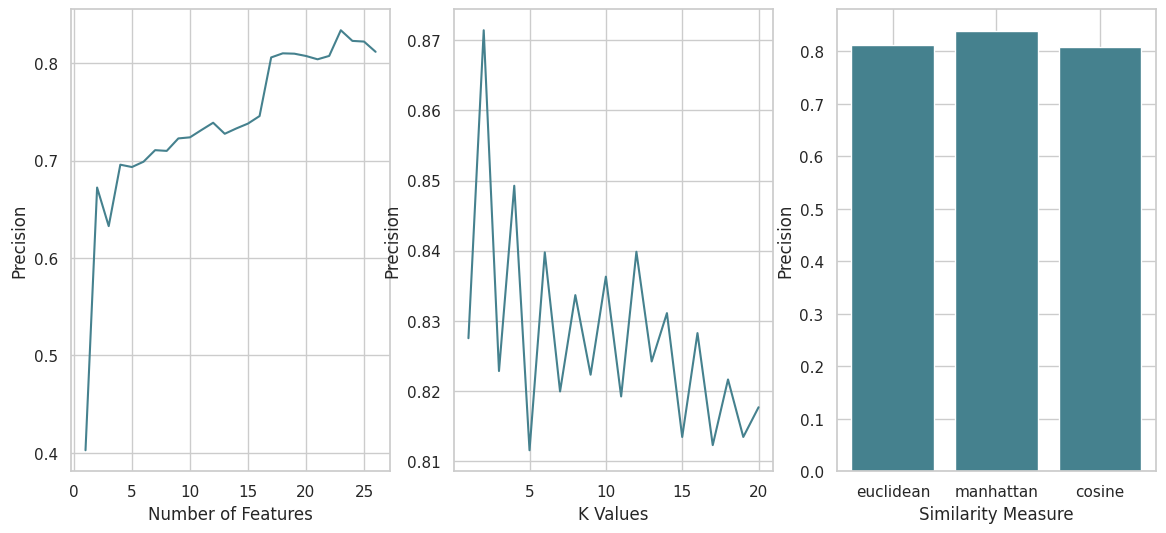

In [ ]:
# Precision results visualization
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# (a)
axs[0].plot(features, precisions1, color='#45818e')
axs[0].set_xlabel("Number of Features")
axs[0].set_ylabel("Precision")

# (b)
axs[1].plot(k_values, precisions2, color='#45818e')
axs[1].set_xlabel("K Values")
axs[1].set_ylabel("Precision")

# (c)
axs[2].bar(similarity_measures, precisions3, color='#45818e')
axs[2].set_xlabel("Similarity Measure")
axs[2].set_ylabel("Precision")

Text(0, 0.5, 'Accuracy')

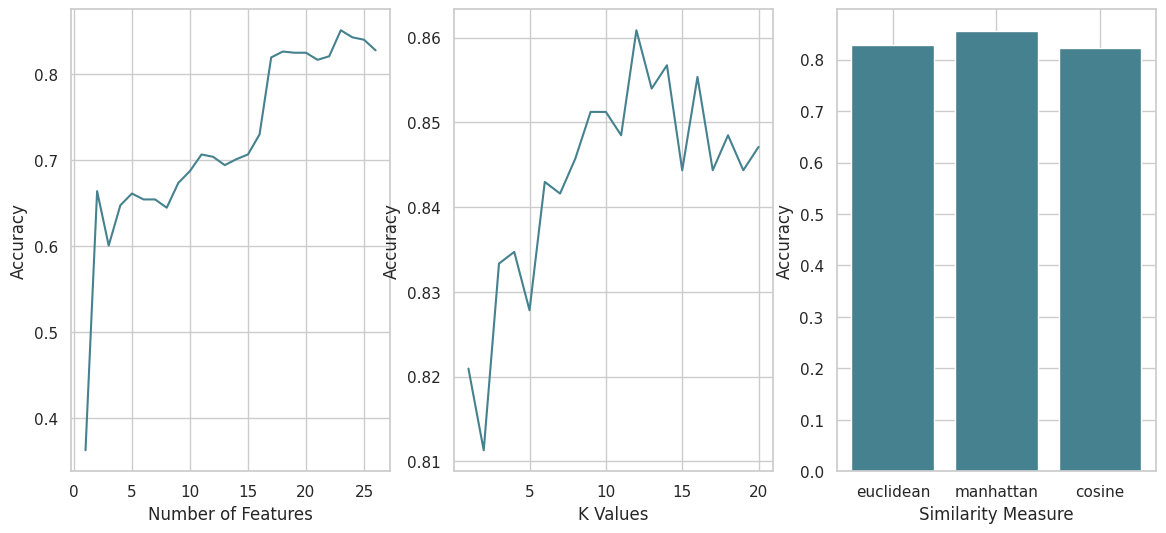

In [ ]:
# Accuracy results visualization
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# (a)
axs[0].plot(features, accuracies1, color='#45818e')
axs[0].set_xlabel("Number of Features")
axs[0].set_ylabel("Accuracy")

# (b)
axs[1].plot(k_values, accuracies2, color='#45818e')
axs[1].set_xlabel("K Values")
axs[1].set_ylabel("Accuracy")

# (c)
axs[2].bar(similarity_measures, accuracies3, color='#45818e')
axs[2].set_xlabel("Similarity Measure")
axs[2].set_ylabel("Accuracy")

Text(0, 0.5, 'Recall')

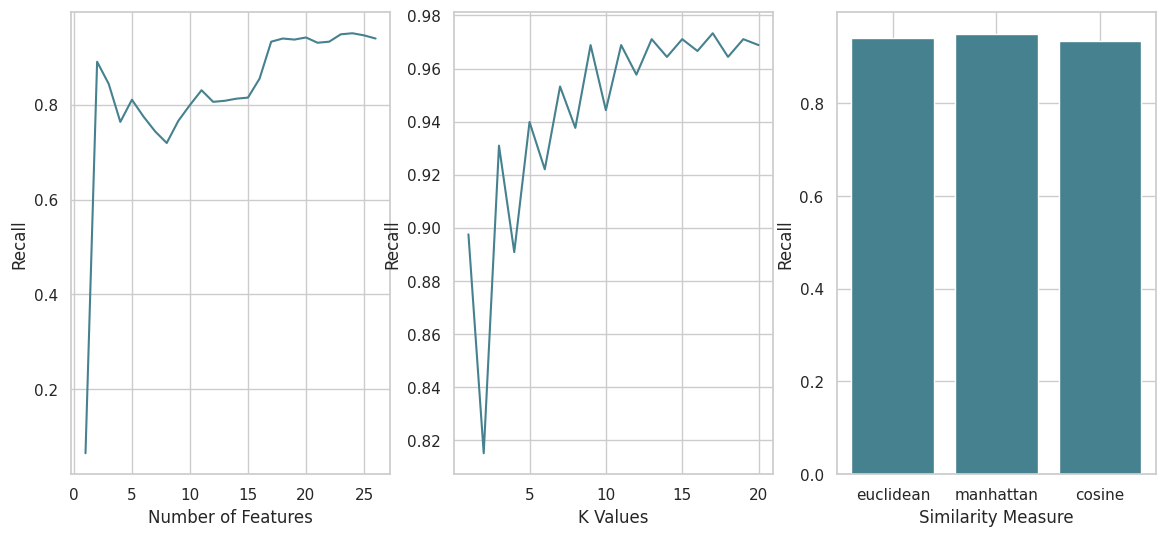

In [ ]:
# Recall results visualization
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# (a)
axs[0].plot(features, recalls1, color='#45818e')
axs[0].set_xlabel("Number of Features")
axs[0].set_ylabel("Recall")

# (b)
axs[1].plot(k_values, recalls2, color='#45818e')
axs[1].set_xlabel("K Values")
axs[1].set_ylabel("Recall")

# (c)
axs[2].bar(similarity_measures, recalls3, color='#45818e')
axs[2].set_xlabel("Similarity Measure")
axs[2].set_ylabel("Recall")

Text(0, 0.5, 'Scores')

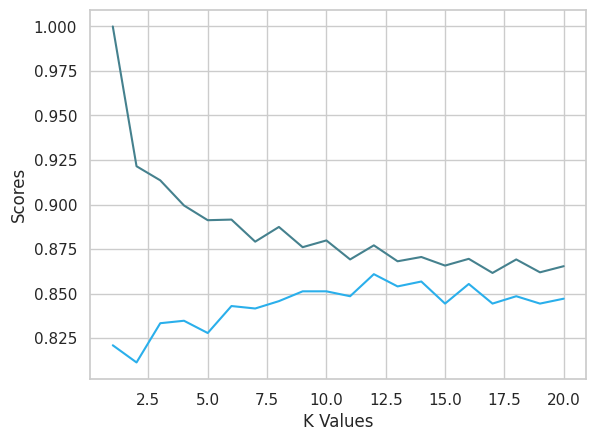

In [ ]:
# Scores results visualization according to k values
plt.plot(k_values, train_scores2, color='#45818e', label="Training score")
plt.plot(k_values, test_scores2, color='#2aafeb', label="Testing score")
plt.xlabel("K Values")
plt.ylabel("Scores")

In [ ]:
# Using GridSearchCV to determine the best_params_ for n_neighbors and metric
kf = KFold(n_splits=5,shuffle=True,random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1),
             'metric': ['euclidean', 'manhattan', 'cosine','minkowski']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
{'metric': 'manhattan', 'n_neighbors': 16}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=16, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy)
recall = recall_score(y_test, y_pred)
print("Recall : ",recall)

Accuracy :  0.8677685950413223
Recall :  0.9732739420935412


### Cleaned Dataset

In [ ]:
# Splitting the data
X = clean_df.drop('Target', axis=1)
y = clean_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Building a classification model by testing different number of features
knn = KNeighborsClassifier()
precisions1 = []
accuracies1 = []
recalls1 = []
features = [num for num in range(1, len(X.columns) + 1)]
for num_feature in features:
    selected_features = X_train.iloc[:, :num_feature]
    knn.fit(selected_features, y_train) # Fit the K-NN classifier on the selected features
    selected_test_features = X_test.iloc[:, :num_feature]
    y_pred = knn.predict(selected_test_features)
    precision = precision_score(y_test, y_pred)
    precisions1.append(precision)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies1. append(accuracy)
    recall = recall_score(y_test, y_pred)
    recalls1.append(recall)
    print(f"\t{num_feature}\t\t {precision} \t\t {accuracy}\t\t {recall}")

	1		 0.8340163934426229 		 0.8620199146514936		 0.9621749408983451
	2		 0.875 		 0.8933143669985776		 0.9598108747044918
	3		 0.8981481481481481 		 0.887624466571835		 0.91725768321513
	4		 0.9035294117647059 		 0.8862019914651493		 0.9078014184397163
	5		 0.9016393442622951 		 0.8862019914651493		 0.9101654846335697
	6		 0.9020979020979021 		 0.8890469416785206		 0.9148936170212766
	7		 0.9317647058823529 		 0.9203413940256046		 0.9361702127659575
	8		 0.9142212189616253 		 0.9203413940256046		 0.9574468085106383
	9		 0.9068736141906873 		 0.9203413940256046		 0.966903073286052


*   Best precision : 7		 **0.9317647058823529**	 0.9203413940256046		 0.9361702127659575
*   Best accuracy and recall : 9		 0.9068736141906873 		 **0.9203413940256046		 0.966903073286052**



In [ ]:
# Building a classification model by testing different number of neighbors
k_values = [i for i in range (1,21)]
precisions2 = []
accuracies2 = []
recalls2 = []
train_scores2 = []
test_scores2 = []
for k in k_values: # default=5
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precisions2.append(precision)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies2. append(accuracy)
    recall = recall_score(y_test, y_pred)
    recalls2.append(recall)
    train_score=knn.score(X_train,y_train)
    train_scores2.append(train_score)
    test_score=knn.score(X_test,y_test)
    test_scores2.append(test_score)
    if(k!=12):
        print(f"\t{k}\t\t {precision} \t\t {accuracy}\t\t {recall}")
    else :
        print(f"\t{k}\t\t {precision} \t\t\t {accuracy}\t\t {recall}")

	1		 0.903370786516854 		 0.9089615931721194		 0.950354609929078
	2		 0.9230769230769231 		 0.89900426742532		 0.9078014184397163
	3		 0.9046563192904656 		 0.9174964438122333		 0.9645390070921985
	4		 0.9099099099099099 		 0.9160739687055477		 0.9550827423167849
	5		 0.9068736141906873 		 0.9203413940256046		 0.966903073286052
	6		 0.9084821428571429 		 0.918918918918919		 0.9621749408983451
	7		 0.8984547461368654 		 0.9118065433854907		 0.9621749408983451
	8		 0.9082774049217002 		 0.9174964438122333		 0.9598108747044918
	9		 0.89587852494577 		 0.9174964438122333		 0.9763593380614657
	10		 0.9013157894736842 		 0.918918918918919		 0.9716312056737588
	11		 0.8973799126637555 		 0.9160739687055477		 0.9716312056737588
	12		 0.8969298245614035 			 0.9132290184921764		 0.966903073286052
	13		 0.8976034858387799 		 0.9174964438122333		 0.9739952718676123
	14		 0.8991228070175439 		 0.9160739687055477		 0.9692671394799054
	15		 0.8915401301518439 		 0.9118065433854907		 0.971631205673758

*   Best precision : 2		 **0.9230769230769231** 		 0.89900426742532		 0.9078014184397163
*   Best accuracy : 5		 0.9068736141906873 		 **0.9203413940256046**		 0.966903073286052
*   Best recall : 8 - 17 - 19 : **0.9763593380614657**



In [ ]:
# Building a classification model by testing different similarity measures
similarity_measures = ['euclidean', 'manhattan', 'cosine']
precisions3 = []
accuracies3 = []
recalls3 = []
for measure in similarity_measures: # default=’minkowski’
    knn = KNeighborsClassifier(metric=measure)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precisions3.append(precision)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies3. append(accuracy)
    recall = recall_score(y_test, y_pred)
    recalls3.append(recall)
    print(f"    {measure.capitalize()}\t\t {precision}\t\t {accuracy}\t\t {recall}")

    Euclidean		 0.9068736141906873		 0.9203413940256046		 0.966903073286052
    Manhattan		 0.9066666666666666		 0.918918918918919		 0.9645390070921985
    Cosine		 0.9092920353982301		 0.9246088193456614		 0.9716312056737588


Best one : cosine

Text(0, 0.5, 'Precision')

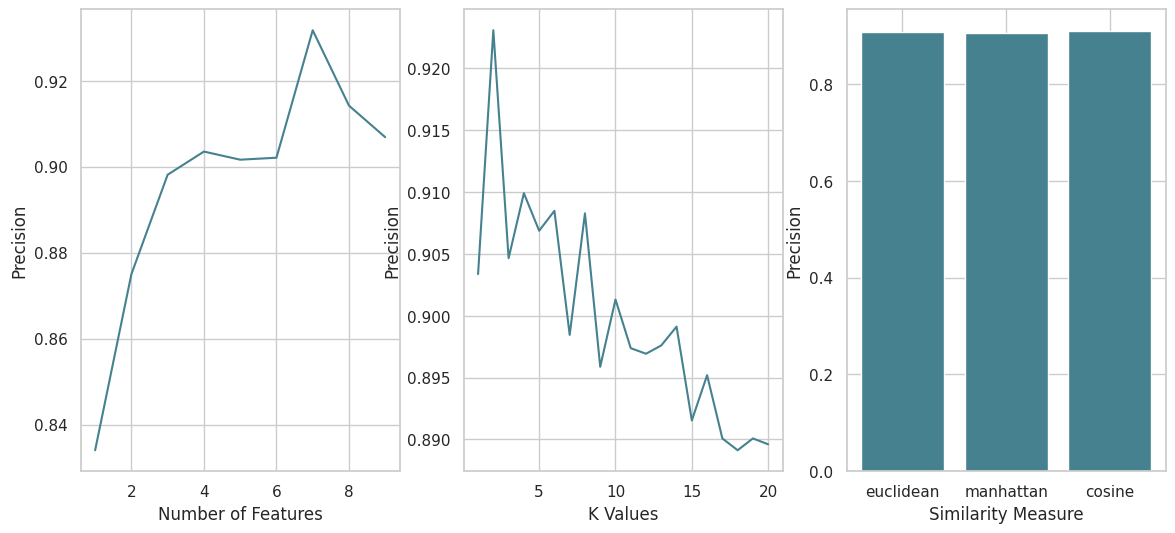

In [ ]:
# Precision results visualization
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# (a)
axs[0].plot(features, precisions1, color='#45818e')
axs[0].set_xlabel("Number of Features")
axs[0].set_ylabel("Precision")

# (b)
axs[1].plot(k_values, precisions2, color='#45818e')
axs[1].set_xlabel("K Values")
axs[1].set_ylabel("Precision")

# (c)
axs[2].bar(similarity_measures, precisions3, color='#45818e')
axs[2].set_xlabel("Similarity Measure")
axs[2].set_ylabel("Precision")

Text(0, 0.5, 'Accuracy')

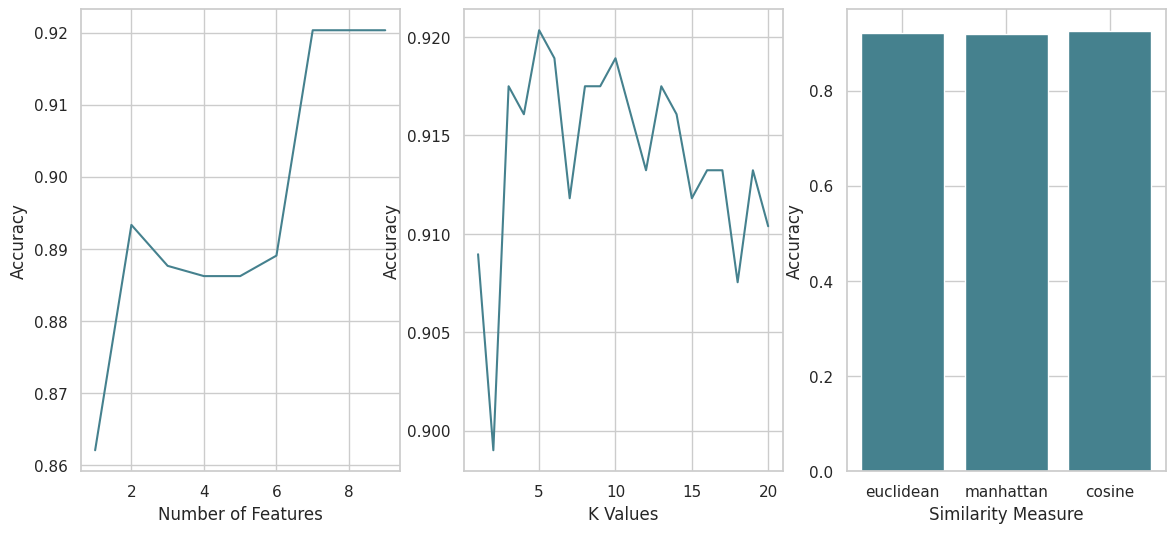

In [ ]:
# Accuracy results visualization
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# (a)
axs[0].plot(features, accuracies1, color='#45818e')
axs[0].set_xlabel("Number of Features")
axs[0].set_ylabel("Accuracy")

# (b)
axs[1].plot(k_values, accuracies2, color='#45818e')
axs[1].set_xlabel("K Values")
axs[1].set_ylabel("Accuracy")

# (c)
axs[2].bar(similarity_measures, accuracies3, color='#45818e')
axs[2].set_xlabel("Similarity Measure")
axs[2].set_ylabel("Accuracy")

Text(0, 0.5, 'Recall')

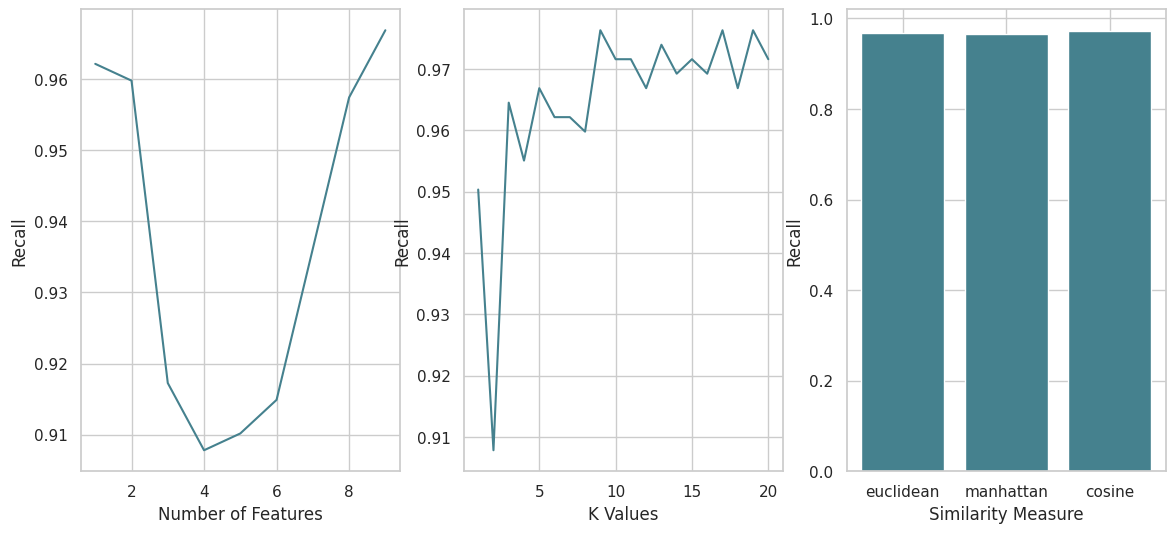

In [ ]:
# Recall results visualization
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# (a)
axs[0].plot(features, recalls1, color='#45818e')
axs[0].set_xlabel("Number of Features")
axs[0].set_ylabel("Recall")

# (b)
axs[1].plot(k_values, recalls2, color='#45818e')
axs[1].set_xlabel("K Values")
axs[1].set_ylabel("Recall")

# (c)
axs[2].bar(similarity_measures, recalls3, color='#45818e')
axs[2].set_xlabel("Similarity Measure")
axs[2].set_ylabel("Recall")

Text(0, 0.5, 'Scores')

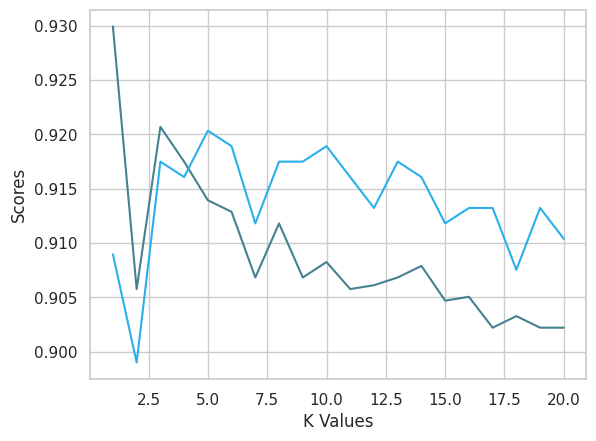

In [ ]:
# Scores results visualization according to k values
plt.plot(k_values, train_scores2, color='#45818e', label="Training score")
plt.plot(k_values, test_scores2, color='#2aafeb', label="Testing score")
plt.xlabel("K Values")
plt.ylabel("Scores")

In [ ]:
# Using GridSearchCV to determine the best_params_ for n_neighbors and metric
kf = KFold(n_splits=5,shuffle=True,random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1),
             'metric': ['euclidean', 'manhattan', 'cosine''minkowski']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
{'metric': 'manhattan', 'n_neighbors': 8}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/s

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8, metric='cosine')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy)
recall = recall_score(y_test, y_pred)
print("Recall : ",recall)

Accuracy :  0.9217638691322901
Recall :  0.966903073286052


# **Decision Tree**

## **Building model using Entropy as the criteria**

### **Uncleaned data**

In [ ]:
# Split data into training and testing sets
data1 = df_copy
X1 = data1.drop('Target',axis=1)
y1 = data1['Target']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [ ]:
# building model using Entropy as the criteria
clf_entropy1 = DecisionTreeClassifier(criterion="entropy", random_state=42)

clf_entropy1.fit(X_train1, y_train1)

y_pred_entropy1 = clf_entropy1.predict(X_test1)

print("Accuracy on testing dataset (Entropy):", accuracy_score(y_test1, y_pred_entropy1))

y_train_pred_entropy1 = clf_entropy1.predict(X_train1)
print("Accuracy on training dataset (Entropy):", accuracy_score(y_train1, y_train_pred_entropy1))


Accuracy on testing dataset (Entropy): 0.8636363636363636
Accuracy on training dataset (Entropy): 1.0


### **data after dropping less correlated features**

In [ ]:
# Split data into training and testing sets
data2 = df_droped
X2 = data2.drop('Target',axis=1)
y2 = data2['Target']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
# building model using Entropy as the criteria
clf_entropy2= DecisionTreeClassifier(criterion="entropy", random_state=42)

clf_entropy2.fit(X_train2, y_train2)

y_pred_entropy2 = clf_entropy2.predict(X_test2)

print("Accuracy on testing dataset (Entropy):", accuracy_score(y_test2, y_pred_entropy2))

y_train_pred_entropy2 = clf_entropy2.predict(X_train2)
print("Accuracy on training dataset (Entropy):", accuracy_score(y_train2, y_train_pred_entropy2))


Accuracy on testing dataset (Entropy): 0.8732782369146006
Accuracy on training dataset (Entropy): 1.0


### **data after forward feature condtraction**



In [ ]:
# Split data into training and testing sets
data = df_ffc
X = data.drop('Target',axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# building model using Entropy as the criteria
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)

clf_entropy.fit(X_train, y_train)

y_pred_entropy = clf_entropy.predict(X_test)

print("Accuracy on testing dataset (Entropy):", accuracy_score(y_test, y_pred_entropy))

y_train_pred_entropy = clf_entropy.predict(X_train)
print("Accuracy on training dataset (Entropy):", accuracy_score(y_train, y_train_pred_entropy))


Accuracy on testing dataset (Entropy): 0.9049586776859504
Accuracy on training dataset (Entropy): 0.940771349862259


### **data after forward feature condtraction + handling outliers**



In [ ]:
# Split data into training and testing sets
data = clean_df
Xc = data.drop('Target',axis=1)
yc = data['Target']

X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xc, yc, test_size=0.2, random_state=42)


In [ ]:
# building model using Entropy as the criteria
clf_entropyc = DecisionTreeClassifier(criterion="entropy", random_state=42)

clf_entropyc.fit(X_trainc, y_trainc)

y_pred_entropyc = clf_entropyc.predict(X_testc)

print("Accuracy on testing dataset (Entropy):", accuracy_score(y_testc, y_pred_entropyc))

y_train_pred_entropyc = clf_entropyc.predict(X_trainc)
print("Accuracy on training dataset (Entropy):", accuracy_score(y_trainc, y_train_pred_entropyc))


Accuracy on testing dataset (Entropy): 0.9132290184921764
Accuracy on training dataset (Entropy): 0.9413229018492176


## **Analysis and Justification:**

1. **Uncleaned Data**:
   - **Training Accuracy (1.0)**: Indicates perfect accuracy on the training set, suggesting overfitting, where the model memorizes the training data rather than learning generalizable patterns.
   - **Testing Accuracy (0.8636)**: The drop from training accuracy indicates overfitting, with the model performing worse on unseen data.

2. **Data after dropping less correlated features**:
   - **Training Accuracy (1.0)**: Overfitting is still present as the training accuracy remains perfect.
   - **Testing Accuracy (0.8733)**: A slight improvement in testing accuracy compared to the uncleaned data, suggesting a minor positive effect of removing less correlated features.

3. **Data after forward feature construction**:
   - **Training Accuracy (0.9408)**: A reduction in training accuracy indicates that the model is less overfitted, potentially learning more useful patterns instead of memorizing the training data.
   - **Testing Accuracy (0.9050)**: A significant improvement in testing accuracy indicates that forward feature construction has added valuable features, enhancing the model's ability to generalize to new data.

4. **Data after forward feature construction + handling outliers**:
   - **Training Accuracy (0.9413)**: Similar to the previous step, indicating consistent model performance on the training data after handling outliers.
   - **Testing Accuracy (0.9132)**: Further improvement in testing accuracy, showing that addressing outliers in combination with forward feature construction helps the model generalize even better by reducing the noise and potential biases caused by outliers.

### **Conclusion:**
- **Uncleaned Data** shows the worst performance with significant overfitting, as indicated by perfect training accuracy and lower testing accuracy.
- **Dropping less correlated features** slightly improves testing accuracy but does not resolve overfitting.
- **Forward feature construction** substantially improves testing accuracy and reduces overfitting, suggesting that the new features provide valuable information for the model.
- **Forward feature construction + handling outliers** results in the best performance with the highest testing accuracy, indicating that handling outliers along with feature construction significantly enhances the model's ability to generalize to new data.

## **Building model using Gini as the criteria**

### **Uncleaned data**

In [ ]:
# building model using Gini as the criteria
clf_gini1 = DecisionTreeClassifier(criterion="gini", random_state=42)

clf_gini1.fit(X_train1, y_train1)

y_pred_gini1 = clf_gini1.predict(X_test1)

print("Accuracy on testing dataset (Gini):", accuracy_score(y_test1, y_pred_gini1))

y_train_pred_gini1= clf_gini1.predict(X_train1)
print("Accuracy on training dataset (gini):", accuracy_score(y_train1, y_train_pred_gini1))

Accuracy on testing dataset (Gini): 0.8512396694214877
Accuracy on training dataset (gini): 1.0


In [ ]:
# Evaluating Model’s Performance
print("Classification Report (entropy):")
print(classification_report(y_test1, y_pred_entropy1))

Classification Report (entropy):
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       277
           1       0.89      0.89      0.89       449

    accuracy                           0.86       726
   macro avg       0.86      0.86      0.86       726
weighted avg       0.86      0.86      0.86       726



In [ ]:
print("Confusion Matrix (Gini):")
print(confusion_matrix(y_test1, y_pred_gini1))

Confusion Matrix (Gini):
[[224  53]
 [ 55 394]]


In [ ]:
print("Classification Report (Gini):")
print(classification_report(y_test1, y_pred_gini1))

Classification Report (Gini):
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       277
           1       0.88      0.88      0.88       449

    accuracy                           0.85       726
   macro avg       0.84      0.84      0.84       726
weighted avg       0.85      0.85      0.85       726



### **data after dropping less correlated features**

In [ ]:
# building model using Gini as the criteria
clf_gini2 = DecisionTreeClassifier(criterion="gini", random_state=42)

clf_gini2.fit(X_train2, y_train2)

y_pred_gini2 = clf_gini2.predict(X_test2)

print("Accuracy on testing dataset (Gini):", accuracy_score(y_test2, y_pred_gini2))

y_train_pred_gini2= clf_gini2.predict(X_train2)
print("Accuracy on training dataset (gini):", accuracy_score(y_train2, y_train_pred_gini2))


Accuracy on testing dataset (Gini): 0.8429752066115702
Accuracy on training dataset (gini): 1.0


In [ ]:
# Evaluating Model’s Performance
print("Classification Report (entropy):")
print(classification_report(y_test2, y_pred_entropy2))

Classification Report (entropy):
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       277
           1       0.91      0.88      0.90       449

    accuracy                           0.87       726
   macro avg       0.86      0.87      0.87       726
weighted avg       0.87      0.87      0.87       726



In [ ]:
print("Confusion Matrix (Gini):")
print(confusion_matrix(y_test2, y_pred_gini2))

Confusion Matrix (Gini):
[[227  50]
 [ 64 385]]


In [ ]:
print("Classification Report (Gini):")
print(classification_report(y_test2, y_pred_gini2))

Classification Report (Gini):
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       277
           1       0.89      0.86      0.87       449

    accuracy                           0.84       726
   macro avg       0.83      0.84      0.84       726
weighted avg       0.84      0.84      0.84       726



### **data after forward feature constraction**

In [ ]:
# building model using Gini as the criteria
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)

clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

print("Accuracy on testing dataset (Gini):", accuracy_score(y_test, y_pred_gini))

y_train_pred_gini= clf_gini.predict(X_train)
print("Accuracy on training dataset (gini):", accuracy_score(y_train, y_train_pred_gini))


Accuracy on testing dataset (Gini): 0.8994490358126722
Accuracy on training dataset (gini): 0.940771349862259


In [ ]:
# Evaluating Model’s Performance
print("Classification Report (entropy):")
print(classification_report(y_test, y_pred_entropy))

Classification Report (entropy):
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       277
           1       0.90      0.96      0.93       449

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.90      0.90       726



In [ ]:
print("Confusion Matrix (Gini):")
print(confusion_matrix(y_test, y_pred_gini))

Confusion Matrix (Gini):
[[227  50]
 [ 23 426]]


In [ ]:
print("Classification Report (Gini):")
print(classification_report(y_test, y_pred_gini))

Classification Report (Gini):
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       277
           1       0.89      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



### **data after forward feature constraction + outliers handling**

In [ ]:
# building model using Gini as the criteria
clf_ginic = DecisionTreeClassifier(criterion="gini", random_state=42)

clf_ginic.fit(X_trainc, y_trainc)

y_pred_ginic = clf_ginic.predict(X_testc)

print("Accuracy on testing dataset (Gini):", accuracy_score(y_testc, y_pred_ginic))

y_train_pred_ginic= clf_ginic.predict(X_trainc)
print("Accuracy on training dataset (gini):", accuracy_score(y_trainc, y_train_pred_ginic))


Accuracy on testing dataset (Gini): 0.9160739687055477
Accuracy on training dataset (gini): 0.9413229018492176


In [ ]:
# Evaluating Model’s Performance
print("Classification Report (entropy):")
print(classification_report(y_testc, y_pred_entropyc))

Classification Report (entropy):
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       280
           1       0.91      0.95      0.93       423

    accuracy                           0.91       703
   macro avg       0.91      0.90      0.91       703
weighted avg       0.91      0.91      0.91       703



In [ ]:
print("Confusion Matrix (Gini):")
print(confusion_matrix(y_testc, y_pred_ginic))

Confusion Matrix (Gini):
[[240  40]
 [ 19 404]]


In [ ]:
print("Classification Report (Gini):")
print(classification_report(y_testc, y_pred_ginic))

Classification Report (Gini):
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       280
           1       0.91      0.96      0.93       423

    accuracy                           0.92       703
   macro avg       0.92      0.91      0.91       703
weighted avg       0.92      0.92      0.92       703



## **Analysis and Justification:**
1. **Uncleaned Data:**
    * Training Accuracy (1.0): The model achieves perfect accuracy on the training set, which indicates overfitting. It memorizes the training data instead of learning generalizable patterns.
    * Testing Accuracy (0.8512): This is significantly lower than the training accuracy, further suggesting overfitting.
2. **Data after dropping less correlated features:**
    * Training Accuracy (1.0): Overfitting is still present, as the model continues to achieve perfect accuracy on the training set.
    * Testing Accuracy (0.8430): Slightly lower than the uncleaned data, which might be due to the removal of features that, while less correlated, still contained some useful information.
3. **Data after forward feature construction:**
    * Training Accuracy (0.9408): The drop from 1.0 to 0.9408 indicates reduced overfitting. The model is likely learning more generalizable patterns instead of memorizing the training data.
    * Testing Accuracy (0.8994): A substantial improvement in testing accuracy, suggesting that the forward feature construction added valuable features that improved the model's ability to generalize to unseen data.
4. **Data after forward feature construction + handling outliers:**
    * Training Accuracy (0.9413): Similar to the previous step, indicating that handling outliers did not significantly affect the model's performance on the training data.
    * Testing Accuracy (0.91607): Further improvement in testing accuracy, demonstrating that handling outliers helps the model generalize even better to new data by reducing noise and potential biases introduced by outliers.
    
###**Conclusion:**
* Uncleaned Data has the worst performance due to significant overfitting.
* Dropping less correlated features did not improve the situation, potentially removing some useful information and slightly reducing testing accuracy.
* Forward feature construction greatly improves testing accuracy and reduces overfitting, indicating the added features were valuable.
* Forward feature construction + handling outliers provides the best results, with the highest testing accuracy, showing that addressing outliers in combination with forward feature construction enhances the model's performance and generalizability the most.


## **Comparing the two criteria**

### **Analysis and Justification:**


1. **Training Accuracy**: Both criteria achieve identical training accuracy (0.9413), indicating that the models are equally well-fitted to the training data.
2. **Testing Accuracy**: The Gini criterion provides a marginally higher testing accuracy (0.91607) compared to the Entropy criterion (0.9132). This suggests that the model using the Gini criterion has a slightly better generalization performance on unseen data.

### **Conclusion:**

While both criteria result in strong performance after forward feature construction and handling outliers, the Gini criterion offers a slight edge in terms of testing accuracy. Therefore, the model using the Gini criterion is marginally more effective in generalizing to new data compared to the model using the Entropy criterion, given the same preprocessing steps.

## **Visualizing the model constructed**

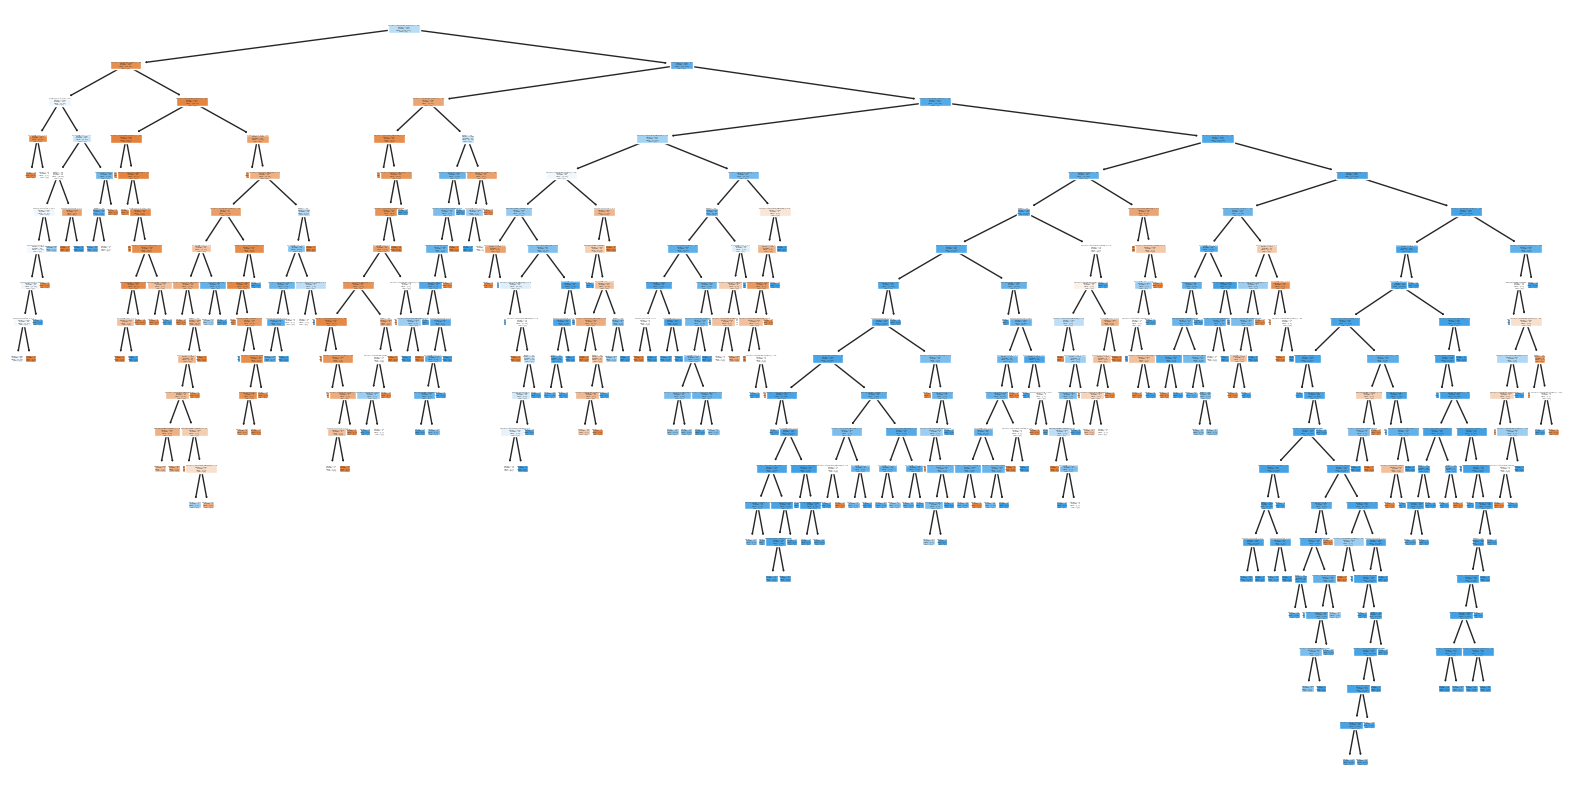

In [ ]:
# Visualizing the Decision Tree (Entropy)
plt.figure(figsize=(20,10))
plot_tree(clf_entropyc, feature_names=X.columns, class_names=True, filled=True)
plt.show()



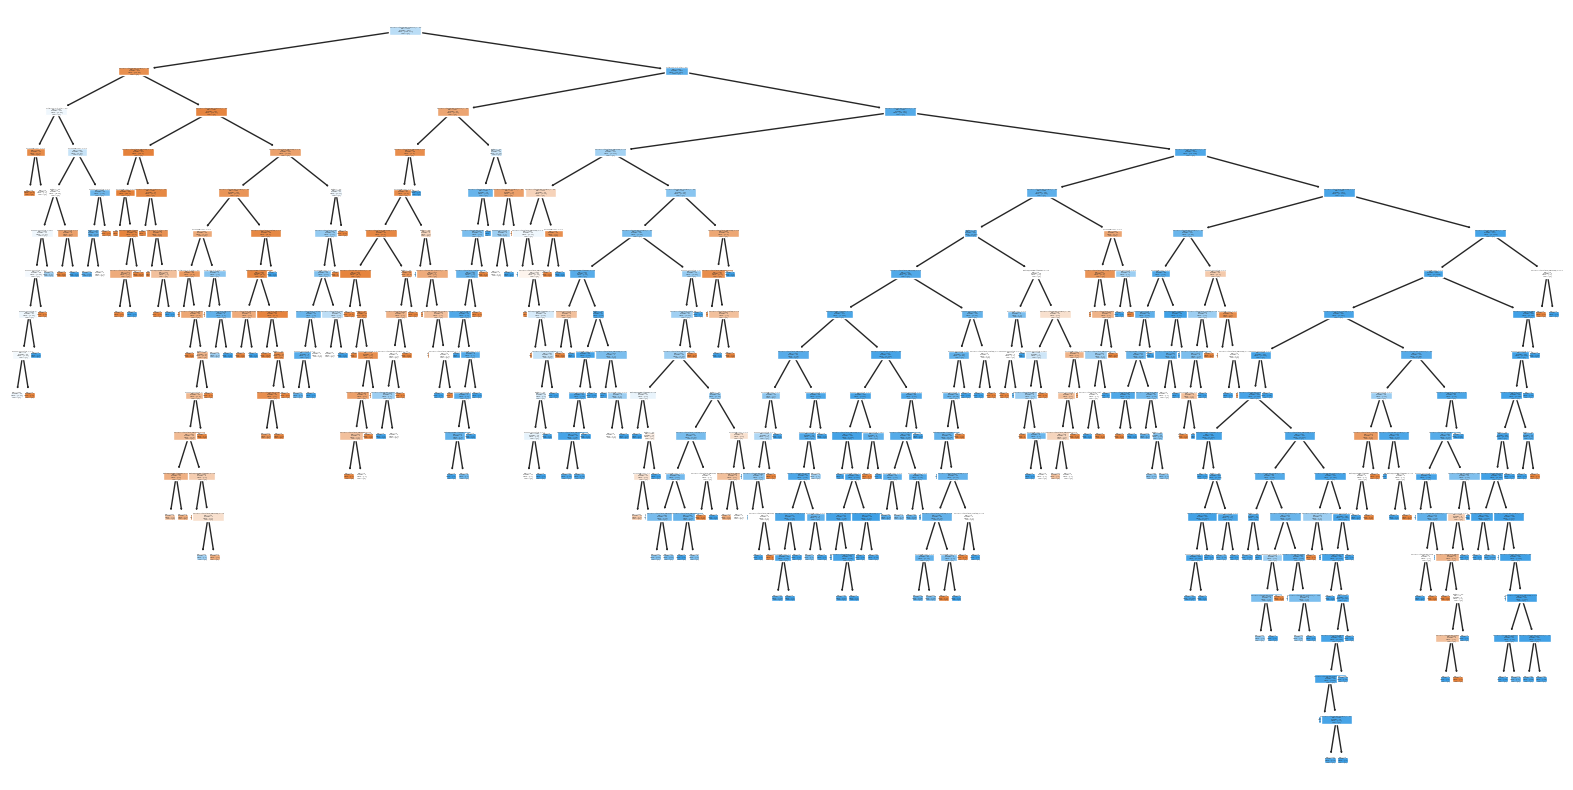

In [ ]:
# Visualizing the Decision Tree (Gini)
plt.figure(figsize=(20,10))
plot_tree(clf_ginic, feature_names=X.columns, class_names=True, filled=True)
plt.show()


## **Model optimization phase**

we have chosen the critaria : **Gini**
and the dataset **after forward deature constraction + handling outlierq**

In [ ]:
# Split data into training and testing sets
data = clean_df
X = data.drop('Target',axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score, f1_score

# Creating Decision Tree classifier
clf = DecisionTreeClassifier(criterion="gini", random_state=42)

# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grid
param_grid = {
    'max_depth': np.arange(5, 31, 2),

}

# Custom scoring function (you can change this to any other metric like f1_score, roc_auc_score, etc.)
scoring = {'Accuracy': make_scorer(accuracy_score), 'F1-score': make_scorer(f1_score)}

# Grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring=scoring, refit='F1-score')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_depth = best_params['max_depth']

# Testing Accuracy After Optimization
test_accuracy_after_optimized = grid_search.best_estimator_.score(X_test, y_test)
print("Testing Accuracy After Optimization:", test_accuracy_after_optimized)


Best parameters: {'max_depth': 7}
Testing Accuracy After Optimization: 0.918918918918919


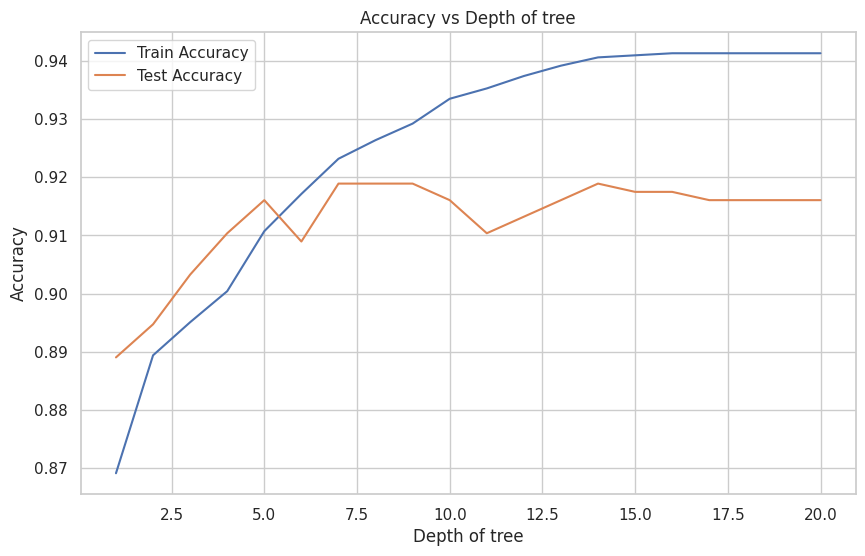

In [ ]:
# Array of depths to try
depths = np.arange(1, 21)

# Lists to store accuracy scores
train_accuracy = []
test_accuracy = []


for depth in depths:
    # Creating Decision Tree classifier with given depth
    clf = DecisionTreeClassifier(criterion="gini", max_depth=depth, random_state=42)

    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))
# Plotting the accuracy scores for different depths
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracy, label="Train Accuracy")
plt.plot(depths, test_accuracy, label="Test Accuracy")
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Depth of tree")
plt.legend()
plt.show()

In [ ]:
# Creating Decision Tree classifier with the best depth
clf_entropy_optimized = DecisionTreeClassifier(criterion="gini", max_depth=best_depth,random_state=42)
clf_entropy_optimized.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

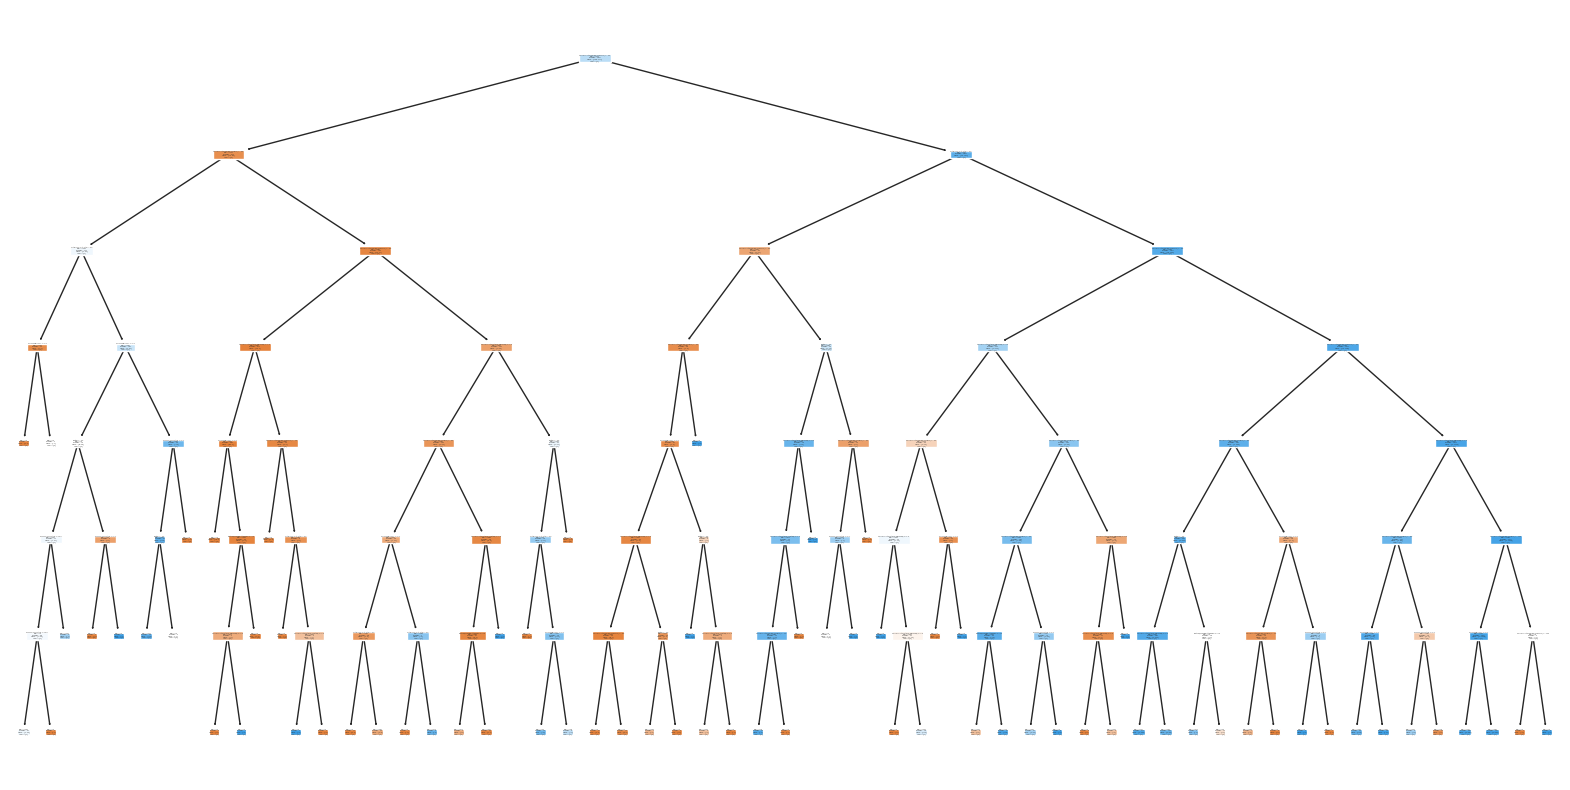

In [ ]:
# Visualizing the optimized Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf_entropy_optimized, feature_names=X.columns, class_names=True, filled=True)
plt.show()

In [ ]:
# Predicting using the optimized model
y_pred_optimized = clf_entropy_optimized.predict(X_test)

In [ ]:
# Evaluating Model’s Performance after optimization
print("Accuracy on testing dataset after optimization:", accuracy_score(y_test, y_pred_optimized))

Accuracy on testing dataset after optimization: 0.918918918918919


In [ ]:
# Classification report for optimized model
print("Classification Report (Optimized model):")
print(classification_report(y_test, y_pred_optimized))


Classification Report (Optimized model):
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       280
           1       0.90      0.97      0.94       423

    accuracy                           0.92       703
   macro avg       0.93      0.91      0.91       703
weighted avg       0.92      0.92      0.92       703



## **Models comparaison**


###**Model before optimizing the maximum depth:**
- **Testing Accuracy (Gini):** 0.91607
### **Model after optimizing the maximum depth to 7:**
- **Testing Accuracy after optimization:** 0.91892

### **Analysis:**

1. **Accuracy Improvement**:
   - The testing accuracy improved from 0.91607 to 0.91892 after optimizing the maximum depth. This indicates that optimizing the depth of the decision tree has led to a better generalization performance on the test data.
   - **Improvement Calculation**:
     \[
     \text{Improvement} = 0.91892 - 0.91607 = 0.00285
     \]
     The improvement in testing accuracy is 0.285 percentage points.

2. **Model Complexity**:
   - **Before Optimization**: The decision tree was likely not constrained by an optimal depth, which may have led to a model that was slightly overfitting or underfitting the data.
   - **After Optimization**: Setting the maximum depth to 7 helps to find a balance between bias and variance. A depth of 7 provides sufficient complexity to capture the underlying patterns in the data while avoiding overfitting, which typically results in better performance on unseen data.

3. **Generalization**:
   - The slight increase in testing accuracy suggests that the optimized model has better generalization capabilities. This is crucial for real-world applications where the model needs to perform well on new, unseen data.

### **Conclusion:**
Optimizing the maximum depth of the decision tree to 7 resulted in a noticeable improvement in testing accuracy. This indicates that the optimization process successfully enhanced the model's performance, making it more effective at predicting outcomes on new data. The optimized model is therefore preferable, given its higher testing accuracy and likely better generalization.

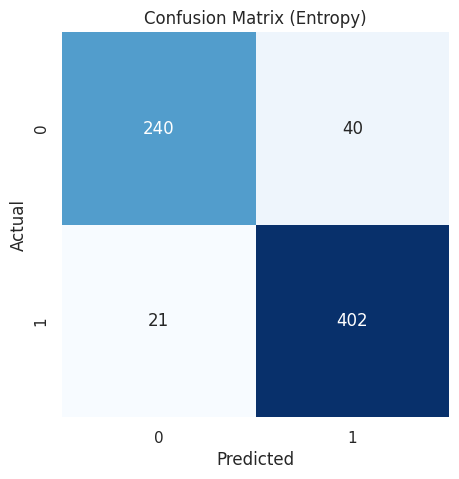

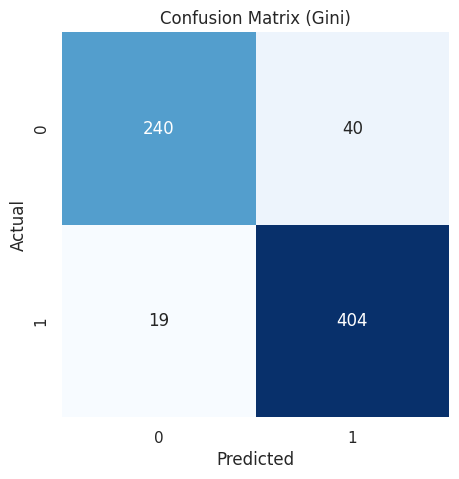

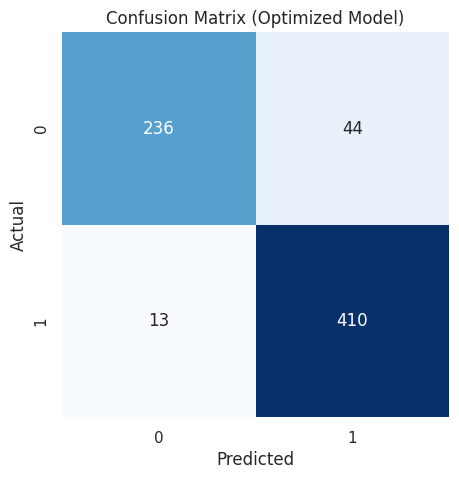

In [ ]:
# Plotting confusion matrix
def plot_metrics(y_true, y_pred, title):
    plt.figure(figsize=(5, 5))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_metrics(y_testc, y_pred_entropyc, "Confusion Matrix (Entropy)")
plot_metrics(y_testc, y_pred_ginic, "Confusion Matrix (Gini)")
plot_metrics(y_test, y_pred_optimized, "Confusion Matrix (Optimized Model)")

### **Accuracies**

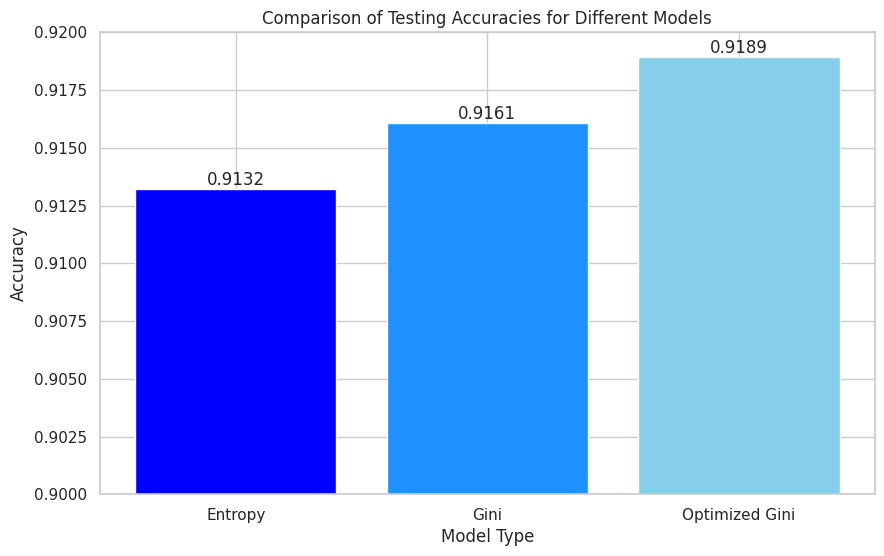

In [ ]:

# Accuracy values
accuracies = {
    'Entropy': accuracy_score(y_test, y_pred_entropyc),
    'Gini': accuracy_score(y_test, y_pred_ginic),
    'Optimized Gini': accuracy_score(y_test, y_pred_optimized)
}

# Extracting labels and values for plotting
labels = list(accuracies.keys())
values = list(accuracies.values())

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=["blue","dodgerblue", "skyblue"])

# Adding the accuracy values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

# Adding titles and labels
plt.xlabel('Model Type')
plt.ylabel('Accuracy')
plt.title('Comparison of Testing Accuracies for Different Models')
plt.ylim([0.9, 0.92])  # Setting y-axis limits to clearly show differences

# Display the plot
plt.show()


### **Precisions**

In [ ]:
precision_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)['1']['precision']
precision_gini = classification_report(y_test, y_pred_ginic, output_dict=True)['1']['precision']
precision_entropy = classification_report(y_test, y_pred_entropyc, output_dict=True)['1']['precision']
print('Precesion Entropy',precision_entropy)
print('Precesion Gini',precision_gini)
print('Precesion Optimized',precision_optimized)

Precesion Entropy 0.9095022624434389
Precesion Gini 0.9099099099099099
Precesion Optimized 0.9030837004405287


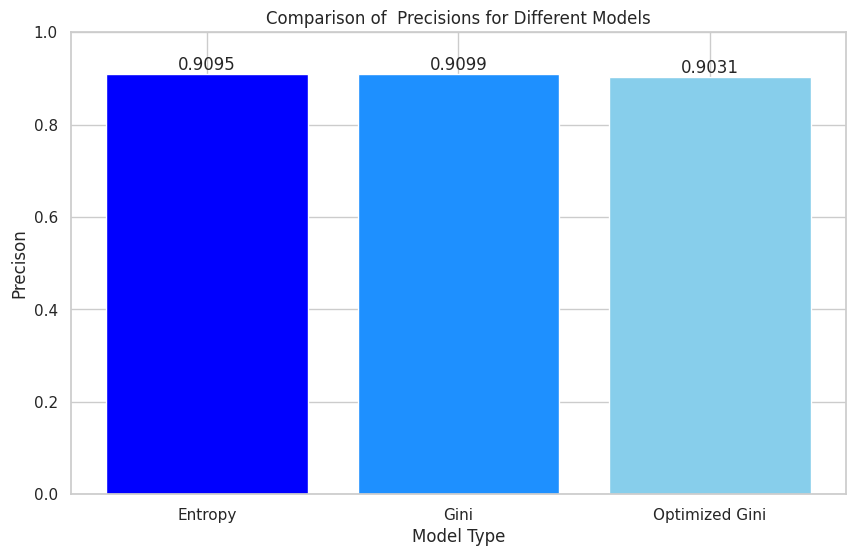

In [ ]:

# Accuracy values
precisions = {
    'Entropy': precision_entropy,
    'Gini': precision_gini,
    'Optimized Gini': precision_optimized
}

# Extracting labels and values for plotting
labels = list(precisions.keys())
values = list(precisions.values())

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=["blue","dodgerblue", "skyblue"])

# Adding the accuracy values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

# Adding titles and labels
plt.xlabel('Model Type')
plt.ylabel('Precison')
plt.title('Comparison of  Precisions for Different Models')
plt.ylim([0, 1])  # Setting y-axis limits to clearly show differences

# Display the plot
plt.show()


### **Recalls**

In [ ]:
recall_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)['1']['recall']
recall_gini = classification_report(y_test, y_pred_ginic, output_dict=True)['1']['recall']
recall_entropy = classification_report(y_test, y_pred_entropyc, output_dict=True)['1']['recall']
print('Recall Entropy', recall_entropy)
print('Recall Gini', recall_gini)
print('Recall Optimized', recall_optimized)


Recall Entropy 0.950354609929078
Recall Gini 0.9550827423167849
Recall Optimized 0.9692671394799054


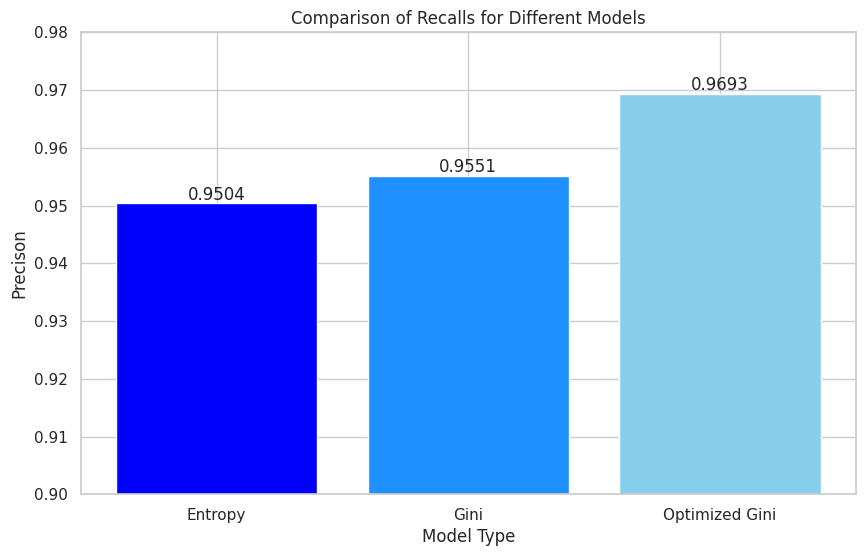

In [ ]:

# Accuracy values
recalls = {
    'Entropy': recall_entropy,
    'Gini': recall_gini,
    'Optimized Gini': recall_optimized
}

# Extracting labels and values for plotting
labels = list(recalls.keys())
values = list(recalls.values())

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=["blue","dodgerblue", "skyblue"])

# Adding the accuracy values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

# Adding titles and labels
plt.xlabel('Model Type')
plt.ylabel('Precison')
plt.title('Comparison of Recalls for Different Models')
plt.ylim([0.9, 0.98])  # Setting y-axis limits to clearly show differences

# Display the plot
plt.show()


### **F1-scores**

In [ ]:
F1_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)['1']['f1-score']
F1_gini = classification_report(y_test, y_pred_ginic, output_dict=True)['1']['f1-score']
F1_entropy = classification_report(y_test, y_pred_entropyc, output_dict=True)['1']['f1-score']
print('F1-score Entropy:', F1_entropy)
print('F1-score Gini:', F1_gini)
print('F1-score Optimized:', F1_optimized)


F1-score Entropy: 0.929479768786127
F1-score Gini: 0.9319492502883506
F1-score Optimized: 0.935005701254276


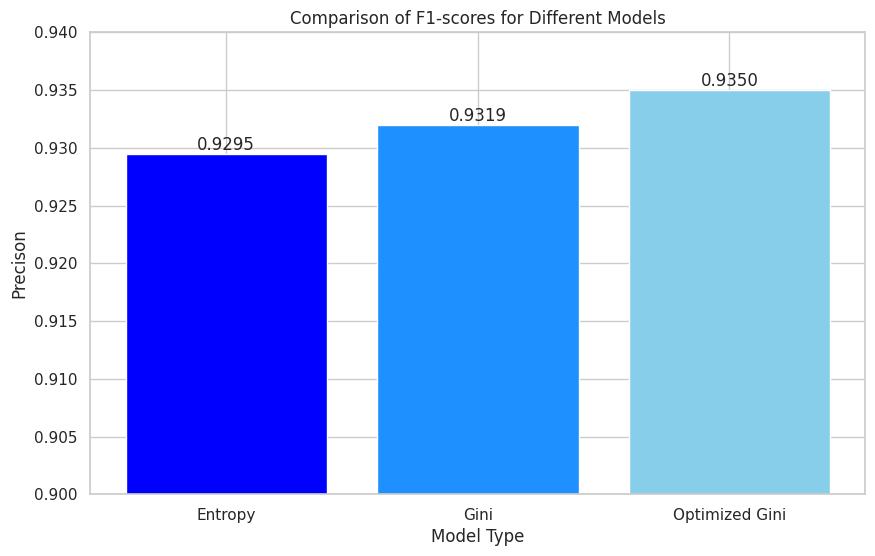

In [ ]:

# Accuracy values
f1 = {
    'Entropy': F1_entropy,
    'Gini':F1_gini,
    'Optimized Gini': F1_optimized
}

# Extracting labels and values for plotting
labels = list(f1.keys())
values = list(f1.values())

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=["blue","dodgerblue", "skyblue"])

# Adding the accuracy values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

# Adding titles and labels
plt.xlabel('Model Type')
plt.ylabel('Precison')
plt.title('Comparison of F1-scores for Different Models')
plt.ylim([0.9, 0.94])  # Setting y-axis limits to clearly show differences

# Display the plot
plt.show()


##**Comparaison results**



### **Analysis and Comparison of Results:**

We are comparing three models based on their accuracies, precisions, recalls, and F1-scores:

### **Detailed Comparison:**

#### **Accuracies:**
- **Entropy (0.9132)**: The accuracy is lower compared to the other models, indicating slightly less overall correctness.
- **Gini (0.9161)**: Slightly better than Entropy, suggesting improved overall performance.
- **Optimized Gini (0.9189)**: The highest accuracy, indicating the best overall performance in terms of correct predictions.

#### **Precisions:**
- **Entropy (0.9095)**: Slightly lower precision compared to Gini, indicating it has a higher rate of false positives.
- **Gini (0.9099)**: Marginally better than Entropy, with the highest precision, indicating the lowest rate of false positives.
- **Optimized Gini (0.9031)**: Slightly lower than both Entropy and Gini, indicating a small increase in false positives.

#### **Recalls:**
- **Entropy (0.9503)**: Lower recall than both Gini and Optimized Gini, indicating it misses more true positives.
- **Gini (0.9551)**: Better recall than Entropy, indicating it catches more true positives.
- **Optimized Gini (0.9693)**: The highest recall, indicating it misses the fewest true positives.

#### **F1-Scores:**
- **Entropy (0.9295)**: Lower F1-score compared to the other models, indicating a balance between precision and recall that is less optimal.
- **Gini (0.9319)**: Higher F1-score than Entropy, showing a better balance between precision and recall.
- **Optimized Gini (0.9350)**: The highest F1-score, indicating the best balance between precision and recall.

### **Summary:**
1. **Optimized Gini**:
   - **Accuracy**: 0.9189 (highest)
   - **Precision**: 0.9031 (slightly lower than others)
   - **Recall**: 0.9693 (highest)
   - **F1-score**: 0.9350 (highest)
   - **Conclusion**: The optimized Gini model performs the best overall, with the highest accuracy, recall, and F1-score. This suggests it is the most reliable model, with the best balance between identifying true positives and minimizing false positives.

2. **Gini**:
   - **Accuracy**: 0.9161
   - **Precision**: 0.9099 (highest)
   - **Recall**: 0.9551
   - **F1-score**: 0.9319
   - **Conclusion**: The Gini model performs well, particularly in precision, making it the best at minimizing false positives while still maintaining good recall and overall accuracy.

3. **Entropy**:
   - **Accuracy**: 0.9132 (lowest)
   - **Precision**: 0.9095
   - **Recall**: 0.9503 (lowest)
   - **F1-score**: 0.9295 (lowest)
   - **Conclusion**: The Entropy model, while still performing well, is outperformed by both Gini and Optimized Gini in all metrics, particularly recall and F1-score.



### **Final Recommendation:**
The **Optimized Gini** model is recommended as it offers the best overall performance, making it the most effective model for balancing accuracy, precision, recall, and F1-score.

## **Consuming the Model for prediction**

Let’s see to predict the output (whether student shall graduate or not) basis upon some random input-data-row.

In [ ]:
random.seed(100)
rand_ind =random.randint(0, len(data))

In [ ]:
data.iloc[rand_ind]

Curricular units 2nd sem (approved)    3
Tuition fees up to date                1
Curricular units 2nd sem (enrolled)    5
Debtor                                 0
Curricular units 1st sem (credited)    0
Daytime/evening attendance             0
Curricular units 1st sem (approved)    4
Scholarship holder                     0
Previous qualification                 1
Target                                 0
Name: 743, dtype: int64

In [ ]:
new_student = data.drop('Target',axis=1).iloc[rand_ind]
new_student

Curricular units 2nd sem (approved)    3
Tuition fees up to date                1
Curricular units 2nd sem (enrolled)    5
Debtor                                 0
Curricular units 1st sem (credited)    0
Daytime/evening attendance             0
Curricular units 1st sem (approved)    4
Scholarship holder                     0
Previous qualification                 1
Name: 743, dtype: int64

In [ ]:
new_student_predictd_target=clf_entropy_optimized.predict(new_student.values.reshape(1,len(new_student)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#the predicted category
print(new_student_predictd_target[0])

0


In [ ]:
#the  actual predicted category
print(data.iloc[rand_ind]['Target'])

0


# **Random Forest**

## **Uncleaned Dataset**

In [ ]:
X = df_copy.drop('Target', axis=1)
y = df_copy['Target']

In [ ]:
#Séparation des données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Initialisation du modèle Random Forest
random_forest = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  #Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],   #Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],    # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4],      # Nombre minimum d'échantillons requis pour être à un nœud feuille
    'bootstrap': [True, False]          # Utiliser ou non le bootstrap pour créer les échantillons de formation
}

In [ ]:
#Recherche aléatoire des meilleurs hyperparamètres
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [ ]:
#Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:")
print(random_search.best_params_)

Meilleurs hyperparamètres:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}


In [ ]:
# Prédiction sur l'ensemble de test
y_pred = random_search.predict(X_test)

In [ ]:
# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))

Recall: 0.9487750556792873
Accuracy: 0.8966942148760331

Rapport de classification:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       277
           1       0.89      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726


Matrice de confusion:
[[225  52]
 [ 23 426]]


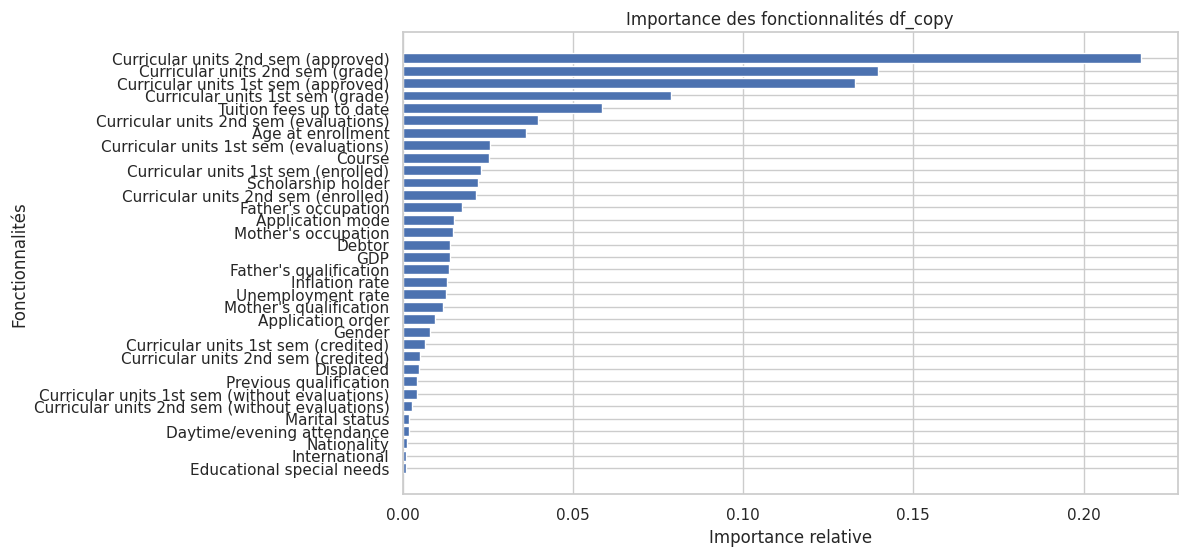

In [ ]:
#Visualisation de l'importance des fonctionnalités
feature_importances = random_search.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Importance relative')
plt.ylabel('Fonctionnalités')
plt.title('Importance des fonctionnalités df_copy')
plt.show()

## **Forward Construction Dataset**

In [ ]:
X = clean_df.drop('Target', axis=1)
y = clean_df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
random_forest = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [ ]:
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [ ]:
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)

Accuracy: 0.9231863442389758
Recall: 0.9621749408983451


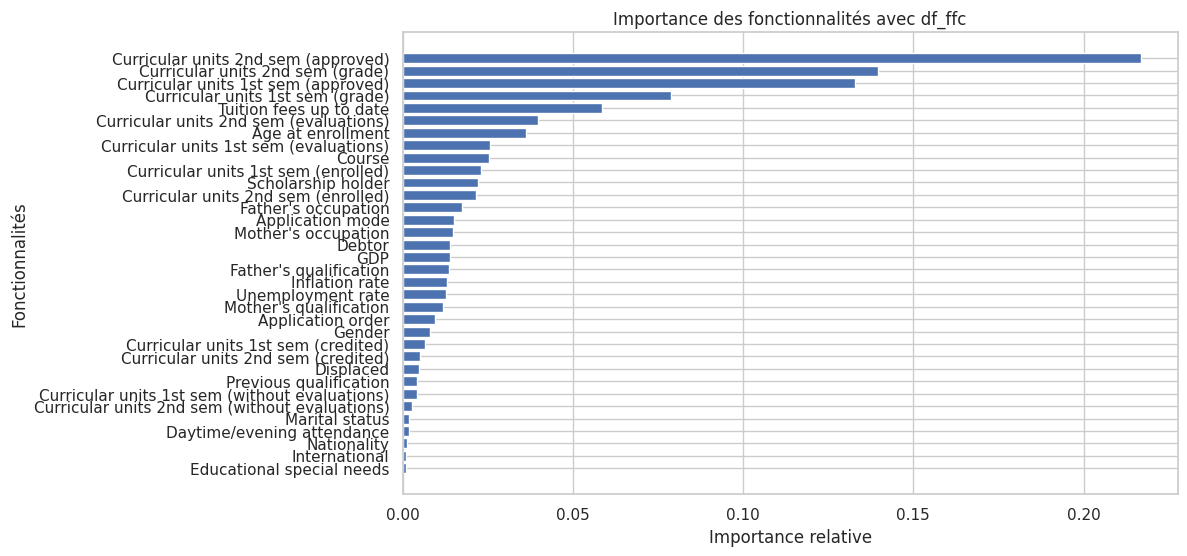

In [ ]:
feature_importances = random_search.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Importance relative')
plt.ylabel('Fonctionnalités')
plt.title('Importance des fonctionnalités avec df_ffc')
plt.show()

##**Dropped Dataset**

In [ ]:
# 1. Préparation des données
X = df_droped.drop('Target', axis=1)
y = df_droped['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
random_forest = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

KeyboardInterrupt: 

y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)

In [ ]:
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)

Accuracy: 0.8856749311294766
Recall: 0.9354120267260579


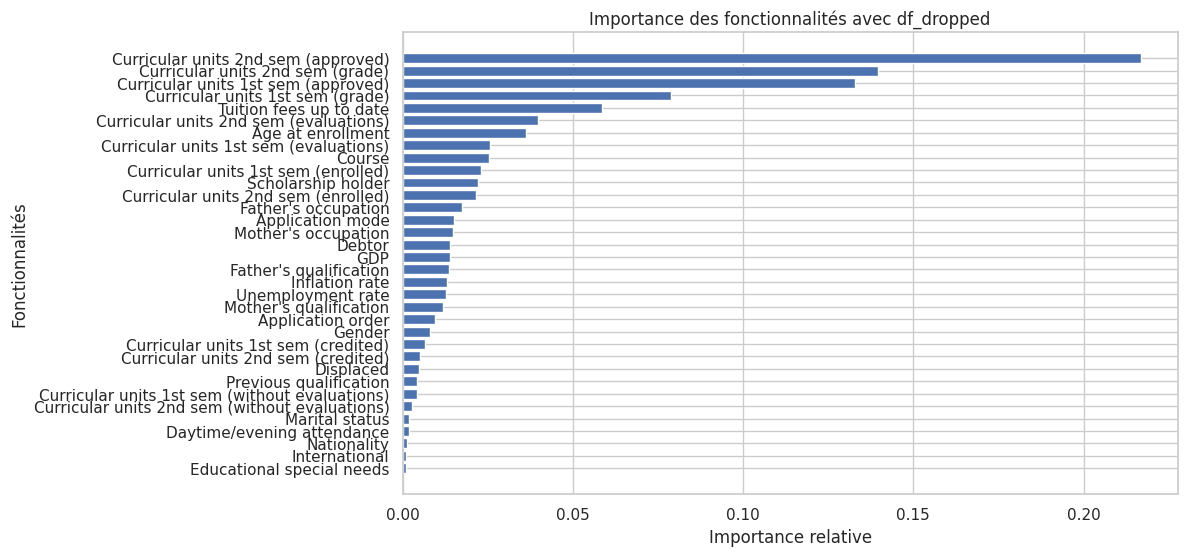

In [ ]:
feature_importances = random_search.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Importance relative')
plt.ylabel('Fonctionnalités')
plt.title('Importance des fonctionnalités avec df_dropped')
plt.show()

## Comparaison Between Datasets

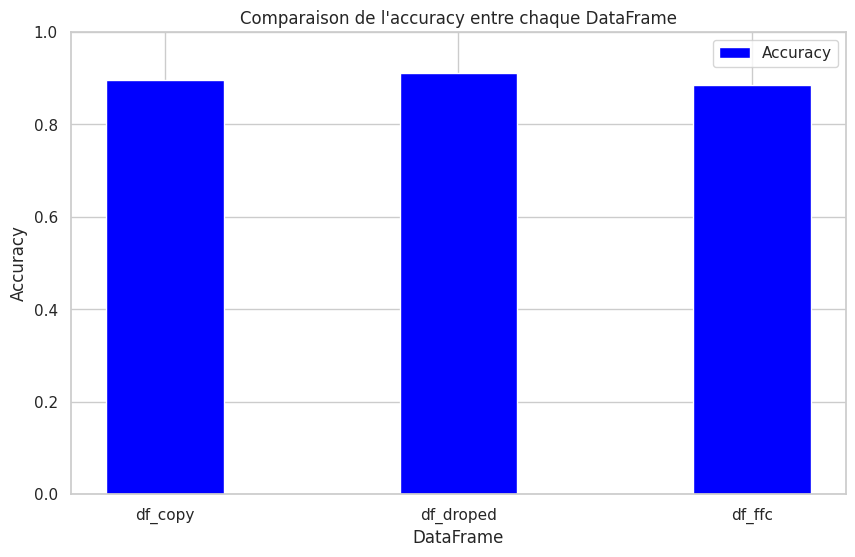

In [ ]:

# Données
datasets = ['df_copy', 'df_droped', 'df_ffc']
accuracies = [0.8966942148760331, 0.9104683195592287, 0.8856749311294766]
recalls = [0.9487750556792873, 0.9688195991091314, 0.9354120267260579]

# Créer un graphique à barres pour l'accuracy
plt.figure(figsize=(10, 6))
plt.bar(datasets, accuracies, color='blue', width=0.4, label='Accuracy')
plt.title('Comparaison de l\'accuracy entre chaque DataFrame')
plt.xlabel('DataFrame')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.legend()
plt.show()



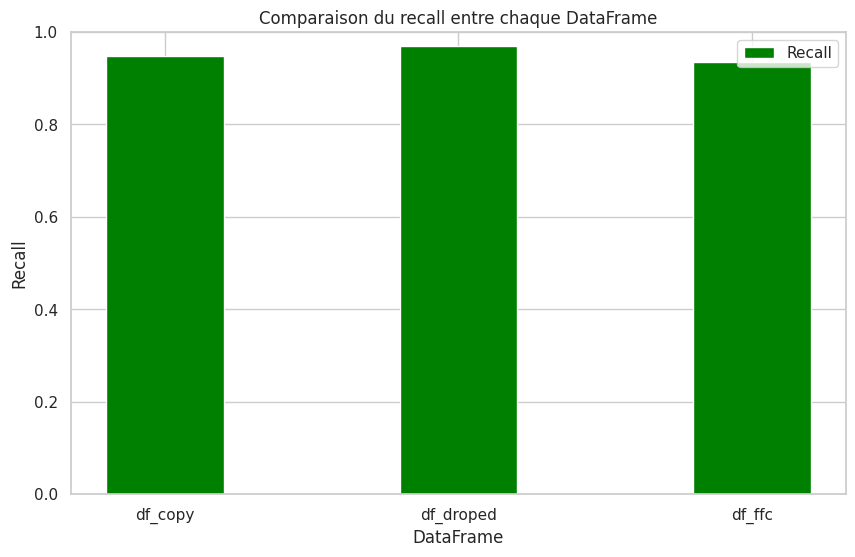

In [ ]:

# Créer un graphique à barres pour le recall
plt.figure(figsize=(10, 6))
plt.bar(datasets, recalls, color='green', width=0.4, label='Recall')
plt.title('Comparaison du recall entre chaque DataFrame')
plt.xlabel('DataFrame')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.legend()
plt.show()

# **SVM MODEL**

## **RBF KERNEL**

### **RBF KERNEL Uncleaned Data**

In [ ]:
# Splitting the dataset into features (X) and target variable (y)
X = df_copy.drop('Target', axis=1)
y = df_droped['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Kernel Choice (RBF)
svm_model_RBF = SVC(kernel='rbf', random_state=42)

In [ ]:
# Train the SVM model
svm_model_RBF.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = svm_model_RBF.predict(X_test)

y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8898071625344353


In [ ]:
# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       277
           1       0.87      0.96      0.92       449

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726


Confusion Matrix:
[[213  64]
 [ 16 433]]


### **RBF KERNEL Dropped DataSet**

In [ ]:
X = df_droped.drop('Target', axis=1)
y = df_droped['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Kernel Choice (RBF)
svm_model_RBF = SVC(kernel='rbf', random_state=42)

In [ ]:
# Train the SVM model
svm_model_RBF.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = svm_model_RBF.predict(X_test)

y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8994490358126722


In [ ]:
# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.85       277
           1       0.88      0.98      0.92       449

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726


Confusion Matrix:
[[215  62]
 [ 11 438]]


### **RBF KERNEL Clean DF**

In [ ]:
# Splitting the data
X = clean_df.drop('Target', axis=1)
y = clean_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Kernel Choice (RBF)
svm_model_RBF = SVC(kernel='rbf', random_state=42)

In [ ]:
# Train the SVM model
svm_model_RBF.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = svm_model_RBF.predict(X_test)

y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Evaluate the model
RBF_accuracy = accuracy_score(y_test, y_pred)
print("RBF Accuracy:", RBF_accuracy)

RBF Accuracy: 0.914651493598862


In [ ]:
# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       280
           1       0.90      0.97      0.93       423

    accuracy                           0.91       703
   macro avg       0.92      0.90      0.91       703
weighted avg       0.92      0.91      0.91       703


Confusion Matrix:
[[234  46]
 [ 14 409]]


## **Polynomial Kernel**

### **Uncleaned Data**

In [ ]:
# Polynomial kernel with degree 2
svm_poly2_model = SVC(kernel='poly', degree=2, random_state=42)
svm_poly2_model.fit(X_train, y_train)
y_pred_poly2 = svm_poly2_model.predict(X_test)
accuracy_poly2 = accuracy_score(y_test, y_pred_poly2)
print("Accuracy (Polynomial Kernel, Degree 2):", accuracy_poly2)

Accuracy (Polynomial Kernel, Degree 2): 0.9022038567493113


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_poly2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_poly2))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       277
           1       0.89      0.96      0.92       449

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726


Confusion Matrix:
[[223  54]
 [ 17 432]]


### **Dropped Data**

In [ ]:
# Polynomial kernel with degree 2
svm_poly2_model = SVC(kernel='poly', degree=2, random_state=42)
svm_poly2_model.fit(X_train, y_train)
y_pred_poly2 = svm_poly2_model.predict(X_test)
accuracy_poly2 = accuracy_score(y_test, y_pred_poly2)
print("Accuracy (Polynomial Kernel, Degree 2):", accuracy_poly2)

Accuracy (Polynomial Kernel, Degree 2): 0.9008264462809917


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_poly2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_poly2))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       277
           1       0.89      0.96      0.92       449

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726


Confusion Matrix:
[[225  52]
 [ 20 429]]


### **Clean Df**

In [ ]:
# Polynomial kernel with degree 2
svm_poly2_model = SVC(kernel='poly', degree=2, random_state=42)
svm_poly2_model.fit(X_train, y_train)
y_pred_poly2 = svm_poly2_model.predict(X_test)
accuracy_poly2 = accuracy_score(y_test, y_pred_poly2)
print("Accuracy (Polynomial Kernel, Degree 2):", accuracy_poly2)

Accuracy (Polynomial Kernel, Degree 2): 0.9160739687055477


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_poly2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_poly2))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       280
           1       0.93      0.93      0.93       423

    accuracy                           0.92       703
   macro avg       0.91      0.91      0.91       703
weighted avg       0.92      0.92      0.92       703


Confusion Matrix:
[[249  31]
 [ 28 395]]


## **Sigmoid Kernel:**

### **Uncleaned Data**

In [ ]:
# Sigmoid kernel
svm_sigmoid_model = SVC(kernel='sigmoid', random_state=42)
svm_sigmoid_model.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid_model.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print("Accuracy (Sigmoid Kernel):", accuracy_sigmoid)

Accuracy (Sigmoid Kernel): 0.6460055096418733


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sigmoid))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_sigmoid))


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       277
           1       0.72      0.71      0.71       449

    accuracy                           0.65       726
   macro avg       0.63      0.63      0.63       726
weighted avg       0.65      0.65      0.65       726


Confusion Matrix:
[[150 127]
 [130 319]]


### **Droppped Data**

In [ ]:
# Sigmoid kernel
svm_sigmoid_model = SVC(kernel='sigmoid', random_state=42)
svm_sigmoid_model.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid_model.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print("Accuracy (Sigmoid Kernel):", accuracy_sigmoid)

Accuracy (Sigmoid Kernel): 0.6570247933884298


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sigmoid))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_sigmoid))


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.60      0.57       277
           1       0.74      0.69      0.71       449

    accuracy                           0.66       726
   macro avg       0.64      0.65      0.64       726
weighted avg       0.66      0.66      0.66       726


Confusion Matrix:
[[166 111]
 [138 311]]


### **Clean DF**

In [ ]:
# Sigmoid kernel
svm_sigmoid_model = SVC(kernel='sigmoid', random_state=42)
svm_sigmoid_model.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid_model.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print("Accuracy (Sigmoid Kernel):", accuracy_sigmoid)

Accuracy (Sigmoid Kernel): 0.5832147937411095


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sigmoid))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_sigmoid))


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.46      0.47       280
           1       0.65      0.66      0.66       423

    accuracy                           0.58       703
   macro avg       0.56      0.56      0.56       703
weighted avg       0.58      0.58      0.58       703


Confusion Matrix:
[[130 150]
 [143 280]]


## **Comparaison between Kernels**

In [ ]:
# Perform cross-validation and get mean accuracy scores for each kernel
cv_scores_rbf = cross_val_score(svm_model_RBF, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_poly = cross_val_score(svm_poly2_model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_sigmoid = cross_val_score(svm_sigmoid_model, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
# Calculate mean accuracy scores
mean_cv_score_rbf = cv_scores_rbf.mean()
mean_cv_score_poly = cv_scores_poly.mean()
mean_cv_score_sigmoid = cv_scores_sigmoid.mean()

print("Mean Cross-Validation Score (RBF Kernel):", mean_cv_score_rbf)
print("Mean Cross-Validation Score (Polynomial Kernel):", mean_cv_score_poly)
print("Mean Cross-Validation Score (Sigmoid Kernel):", mean_cv_score_sigmoid)

Mean Cross-Validation Score (RBF Kernel): 0.9000752198125193
Mean Cross-Validation Score (Polynomial Kernel): 0.9007856993862318
Mean Cross-Validation Score (Sigmoid Kernel): 0.5636587169649122


In [ ]:
# Compare mean accuracy scores and identify the best-performing kernel
best_kernel = max({
    'rbf': mean_cv_score_rbf,
    'poly': mean_cv_score_poly,
    'sigmoid': mean_cv_score_sigmoid
}.items(), key=lambda x: x[1])[0]

print("\nBest Performing Kernel:", best_kernel)


Best Performing Kernel: poly


## **Models Visualization**

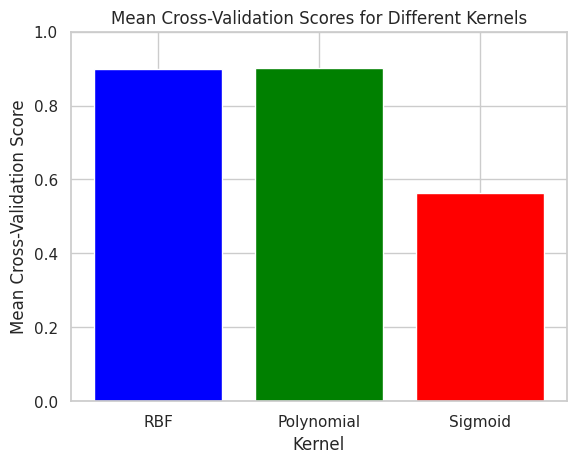

In [ ]:
import matplotlib.pyplot as plt

# Mean cross-validation scores
mean_cv_scores = [mean_cv_score_rbf, mean_cv_score_poly, mean_cv_score_sigmoid]
kernels = ['RBF', 'Polynomial', 'Sigmoid']

# Plotting
plt.bar(kernels, mean_cv_scores, color=['blue', 'green', 'red'])
plt.xlabel('Kernel')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Mean Cross-Validation Scores for Different Kernels')
plt.ylim(0.0, 1.0)  # Limit the y-axis from 0 to 1 for accuracy scores
plt.show()


## **Optimization of the Polynomial Kernel Model**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define a range of hyperparameters to try
C_values = [0.1, 1, 10, 100]
gamma_values = ['scale', 0.1, 0.01, 0.001]

best_accuracy = 0
best_params = {}

# Iterate over hyperparameters
for C in C_values:
    for gamma in gamma_values:
        # Create SVM model with specified hyperparameters
        svm_poly2_model = SVC(kernel='poly', degree=2, C=C, gamma=gamma, random_state=42)

        # Train the model
        svm_poly2_model.fit(X_train, y_train)

        # Make predictions
        y_pred_poly2 = svm_poly2_model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred_poly2)

        # Check if current hyperparameters yield better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'C': C, 'gamma': gamma}

print("Best Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_params)


Best Accuracy: 0.918918918918919
Best Hyperparameters: {'C': 100, 'gamma': 0.1}


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_poly2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_poly2))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       280
           1       0.93      0.94      0.93       423

    accuracy                           0.92       703
   macro avg       0.91      0.91      0.91       703
weighted avg       0.92      0.92      0.92       703


Confusion Matrix:
[[249  31]
 [ 27 396]]


# **Naive Bayes**


**Séparation des données +Training the model using diffrent naive bayes methods  :**


Diffrent naive bayes methods


*  GaussianNB
*  MultinomialNB
*   BernoulliNB
*   ComplementNB
*   CategoricalNB










# **1 : Using df_copy**

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#only the best selected features
X = df_copy.drop('Target', axis=1)
y = df_copy['Target']

label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#the classifiers
classifiers = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
}

# Training and evaluating each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

#results
results_df = pd.DataFrame(results).T
print(results_df)



             Accuracy  Precision    Recall
GaussianNB   0.855372   0.853909  0.924276
BernoulliNB  0.838843   0.807407  0.971047


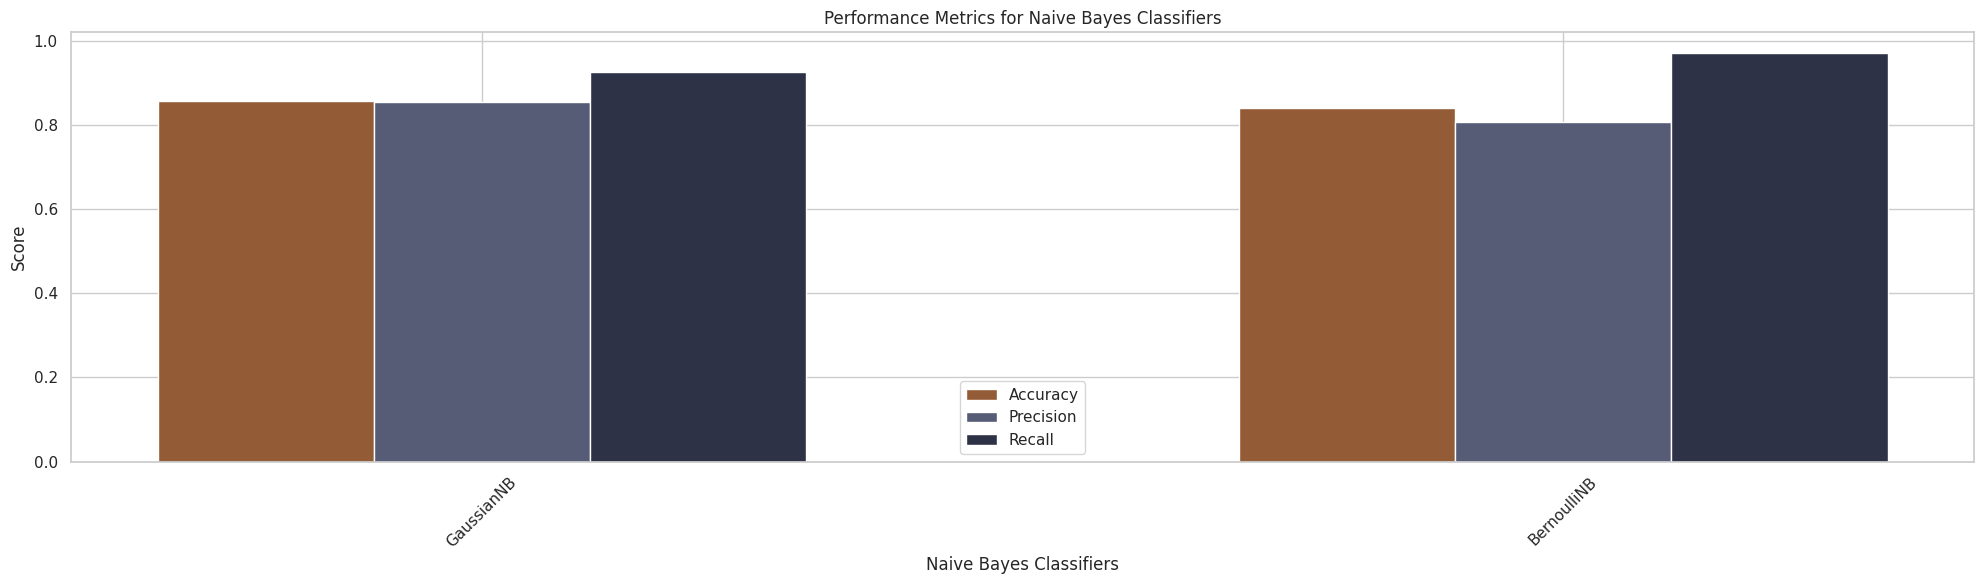

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['GaussianNB', 'BernoulliNB']

# Results
accuracy = [0.855372 , 0.838843 ]
precision = [ 0.853909 ,0.807407]
recall = [0.924276,  0.971047]

# Plotting
bar_width = 0.2
index = np.arange(len(classifiers))

plt.figure(figsize=(20, 6))

plt.bar(index - bar_width, accuracy, color='#945B37', width=bar_width, label='Accuracy')
plt.bar(index, precision, color='#565C76', width=bar_width, label='Precision')
plt.bar(index + bar_width, recall, color='#2D3247', width=bar_width, label='Recall')

plt.xlabel('Naive Bayes Classifiers')
plt.ylabel('Score')
plt.title('Performance Metrics for Naive Bayes Classifiers')
plt.xticks(index, classifiers, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


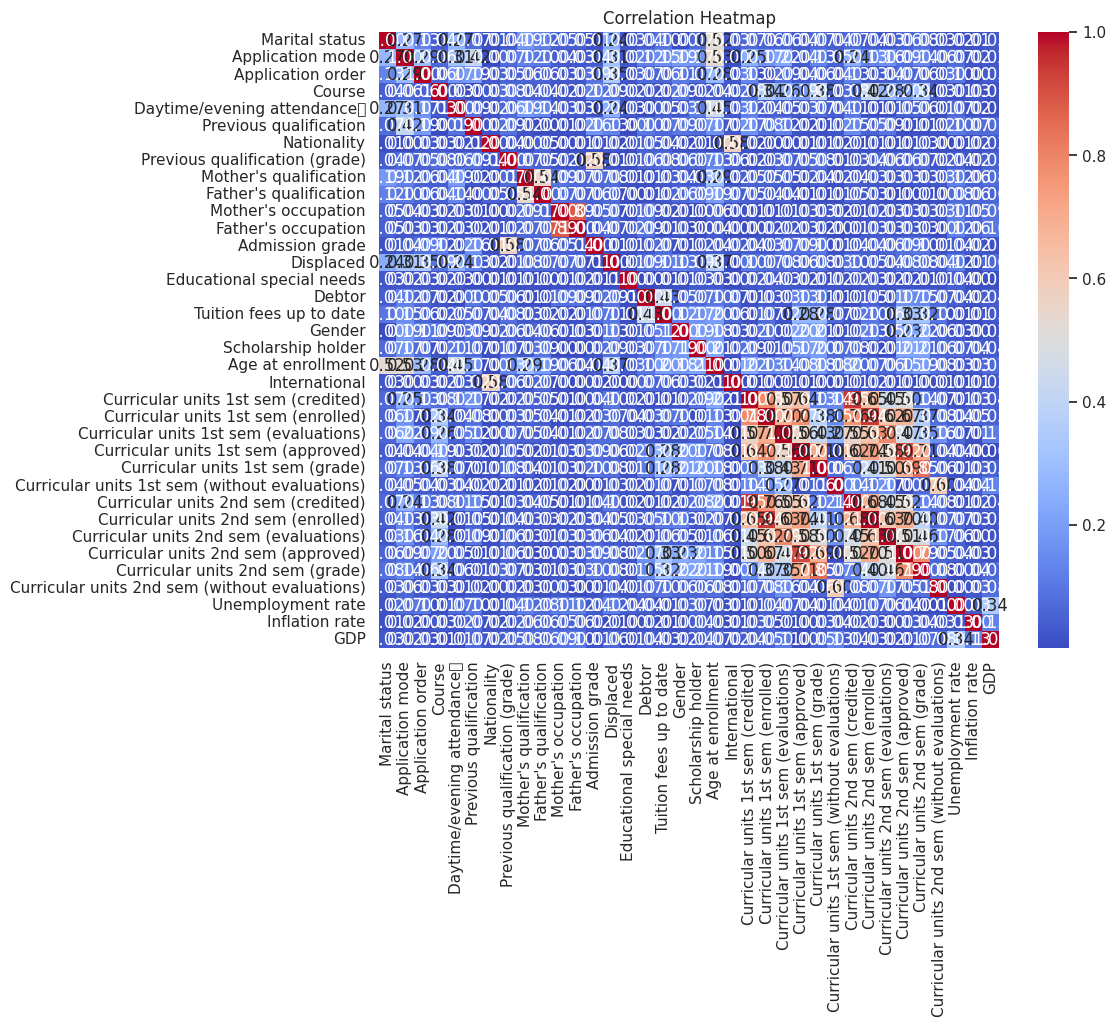

Removed highly correlated features:
["Father's occupation", 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']


In [ ]:
X = df_copy.drop('Target', axis=1)

#the correlation matrix
correlation_matrix = X.corr().abs()

mask = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

threshold = 0.7

correlated_features = [column for column in mask.columns if any(mask[column] > threshold)]

# Drop the highly correlated features
X_filtered = X.drop(columns=correlated_features)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Display the removed features
print("Removed highly correlated features:")
print(correlated_features)


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_copy.drop('Target', axis=1)
y = df_copy['Target']

# Remove highly correlated features
X_filtered = X.drop(["Father's occupation", 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

classifiers = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print("Classifier:", name)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("\n")


Classifier: GaussianNB
Accuracy: 0.7534435261707989
Precision: 0.7576335877862596
Recall: 0.8841870824053452


Classifier: BernoulliNB
Accuracy: 0.7892561983471075
Precision: 0.7924901185770751
Recall: 0.8930957683741648




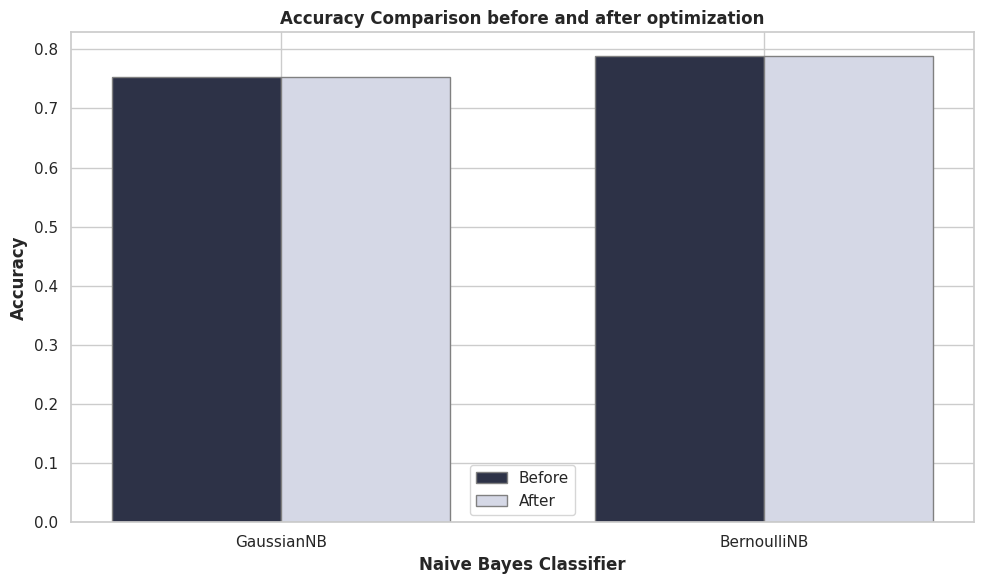

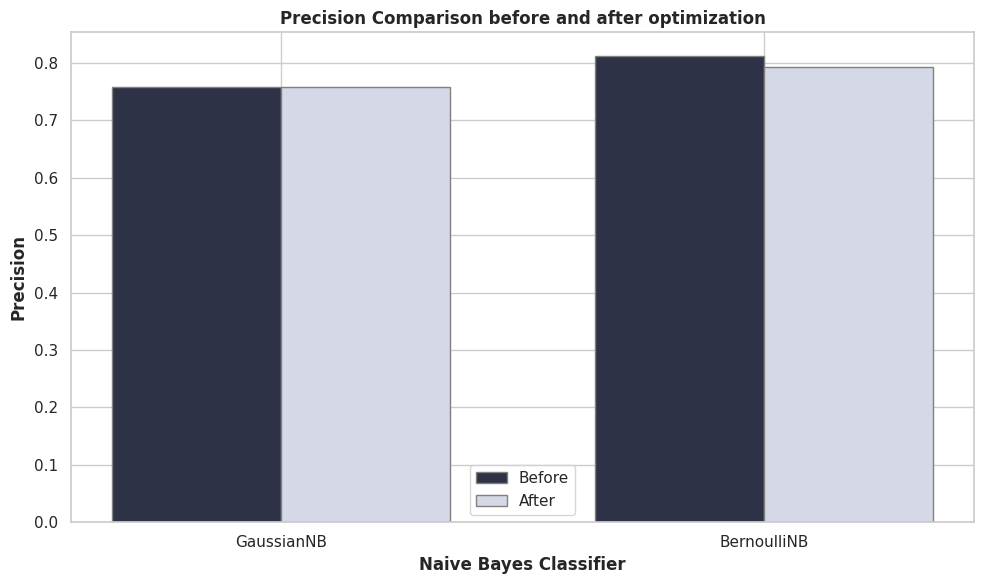

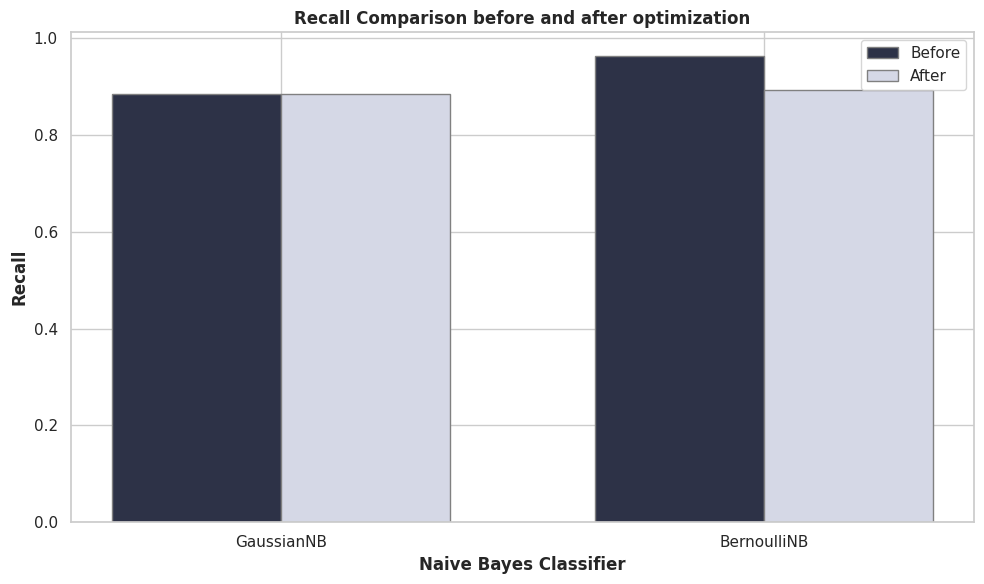

	
Best Recall Classifier: BernoulliNB, Value: 0.964365, Result: Before
	
	
Best Precision Classifier: BernoulliNB, Value: 0.812383, Result: Before
	
	
Best Accuracy Classifier: BernoulliNB, Value: 0.7892561983471075, Result: After
	


In [ ]:
import numpy as np

results_before = {
    'GaussianNB': {'Accuracy': 0.7534435261707989 ,'Precision': 0.7576335877862596, 'Recall': 0.8841870824053452},
    'BernoulliNB': {'Accuracy': 0.7892561983471075, 'Precision': 0.812383, 'Recall': 0.964365},
}

results_after = {
    'GaussianNB': {'Accuracy': 0.7534435261707989, 'Precision': 0.7576335877862596, 'Recall': 0.8841870824053452},
    'BernoulliNB': {'Accuracy': 0.7892561983471075, 'Precision': 0.7924901185770751, 'Recall': 0.8930957683741648},
}
classifiers = ['GaussianNB', 'BernoulliNB']

metrics = ['Accuracy', 'Precision', 'Recall']
values_before = np.array([[results_before[classifier][metric] for classifier in classifiers] for metric in metrics])
values_after = np.array([[results_after[classifier][metric] for classifier in classifiers] for metric in metrics])

bar_width = 0.35

r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]

for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    plt.bar(r1, values_before[i], color='#2D3247', width=bar_width, edgecolor='grey', label='Before')
    plt.bar(r2, values_after[i], color='#D5D8E6', width=bar_width, edgecolor='grey', label='After')

    plt.xlabel('Naive Bayes Classifier', fontweight='bold')
    plt.ylabel(metric, fontweight='bold')
    plt.title(f'{metric} Comparison before and after optimization', fontweight='bold')
    plt.xticks([r + bar_width/2 for r in range(len(classifiers))], classifiers)
    plt.legend()

    plt.tight_layout()
    plt.show()

# *********************** the best recall *******************************
best_recall_before = max(results_before.values(), key=lambda x: x['Recall'])
best_recall_after = max(results_after.values(), key=lambda x: x['Recall'])


if best_recall_before['Recall'] > best_recall_after['Recall']:
    best_recall_value = best_recall_before['Recall']
    best_recall_classifier = [classifier for classifier, metrics in results_before.items() if metrics['Recall'] == best_recall_before['Recall']][0]
    recall_result_type = "Before"
else:
    best_recall_value = best_recall_after['Recall']
    best_recall_classifier = [classifier for classifier, metrics in results_after.items() if metrics['Recall'] == best_recall_after['Recall']][0]
    recall_result_type = "After"
print('\t')
print(f"Best Recall Classifier: {best_recall_classifier}, Value: {best_recall_value}, Result: {recall_result_type}")
print('\t')
# *********************the best precision ***************************************
best_precision_before = max(results_before.values(), key=lambda x: x['Precision'])
best_precision_after = max(results_after.values(), key=lambda x: x['Precision'])

if best_precision_before['Precision'] > best_precision_after['Precision']:
    best_precision_value = best_precision_before['Precision']
    best_precision_classifier = [classifier for classifier, metrics in results_before.items() if metrics['Precision'] == best_precision_before['Precision']][0]
    precision_result_type = "Before"
else:
    best_precision_value = best_precision_after['Precision']
    best_precision_classifier = [classifier for classifier, metrics in results_after.items() if metrics['Precision'] == best_precision_after['Precision']][0]
    precision_result_type = "After"
print('\t')
print(f"Best Precision Classifier: {best_precision_classifier}, Value: {best_precision_value}, Result: {precision_result_type}")
print('\t')

# **************************** the best accuracy *******************************
best_accuracy_before = max(results_before.values(), key=lambda x: x['Accuracy'])
best_accuracy_after = max(results_after.values(), key=lambda x: x['Accuracy'])

# Compare the best accuracy values
if best_accuracy_before['Accuracy'] > best_accuracy_after['Accuracy']:
    best_accuracy_value = best_accuracy_before['Accuracy']
    best_accuracy_classifier = [classifier for classifier, metrics in results_before.items() if metrics['Accuracy'] == best_accuracy_before['Accuracy']][0]
    result_type = "Before"
else:
    best_accuracy_value = best_accuracy_after['Accuracy']
    best_accuracy_classifier = [classifier for classifier, metrics in results_after.items() if metrics['Accuracy'] == best_accuracy_after['Accuracy']][0]
    result_type = "After"
print('\t')
print(f"Best Accuracy Classifier: {best_accuracy_classifier}, Value: {best_accuracy_value}, Result: {result_type}")
print('\t')

# **2 : Using df_droped**

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#only the best selected features
X = df_droped.drop('Target', axis=1)
y = df_droped['Target']

label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#the classifiers
classifiers = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB()
}

# Training and evaluating each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

#results
results_df = pd.DataFrame(results).T
print(results_df)



             Accuracy  Precision    Recall
GaussianNB   0.859504   0.859213  0.924276
BernoulliNB  0.838843   0.807407  0.971047


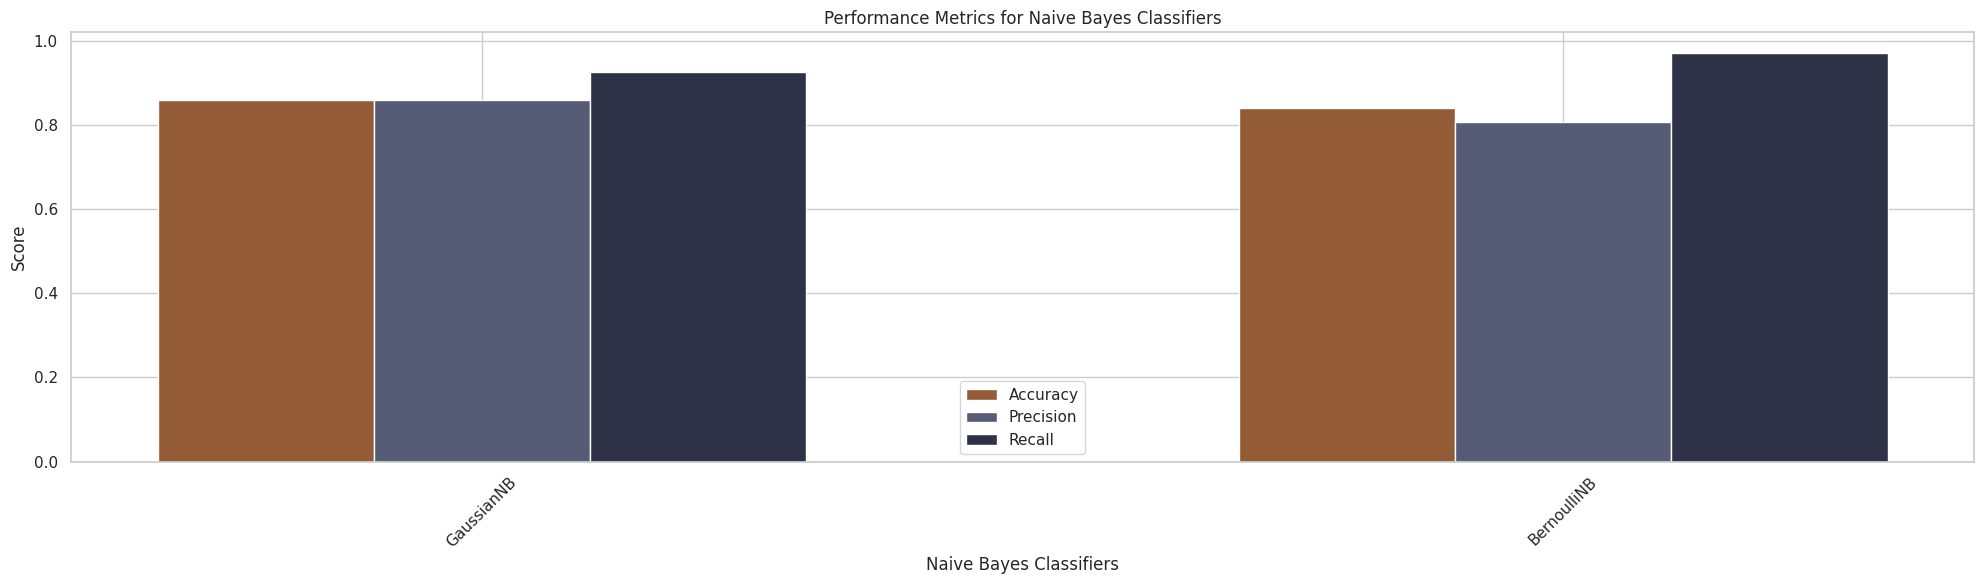

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['GaussianNB', 'BernoulliNB']

# Results
accuracy = [ 0.859504,  0.838843]
precision = [0.859213 ,  0.807407 ]
recall = [0.924276 ,0.971047]

# Plotting
bar_width = 0.2
index = np.arange(len(classifiers))

plt.figure(figsize=(20, 6))

plt.bar(index - bar_width, accuracy, color='#945B37', width=bar_width, label='Accuracy')
plt.bar(index, precision, color='#565C76', width=bar_width, label='Precision')
plt.bar(index + bar_width, recall, color='#2D3247', width=bar_width, label='Recall')

plt.xlabel('Naive Bayes Classifiers')
plt.ylabel('Score')
plt.title('Performance Metrics for Naive Bayes Classifiers')
plt.xticks(index, classifiers, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


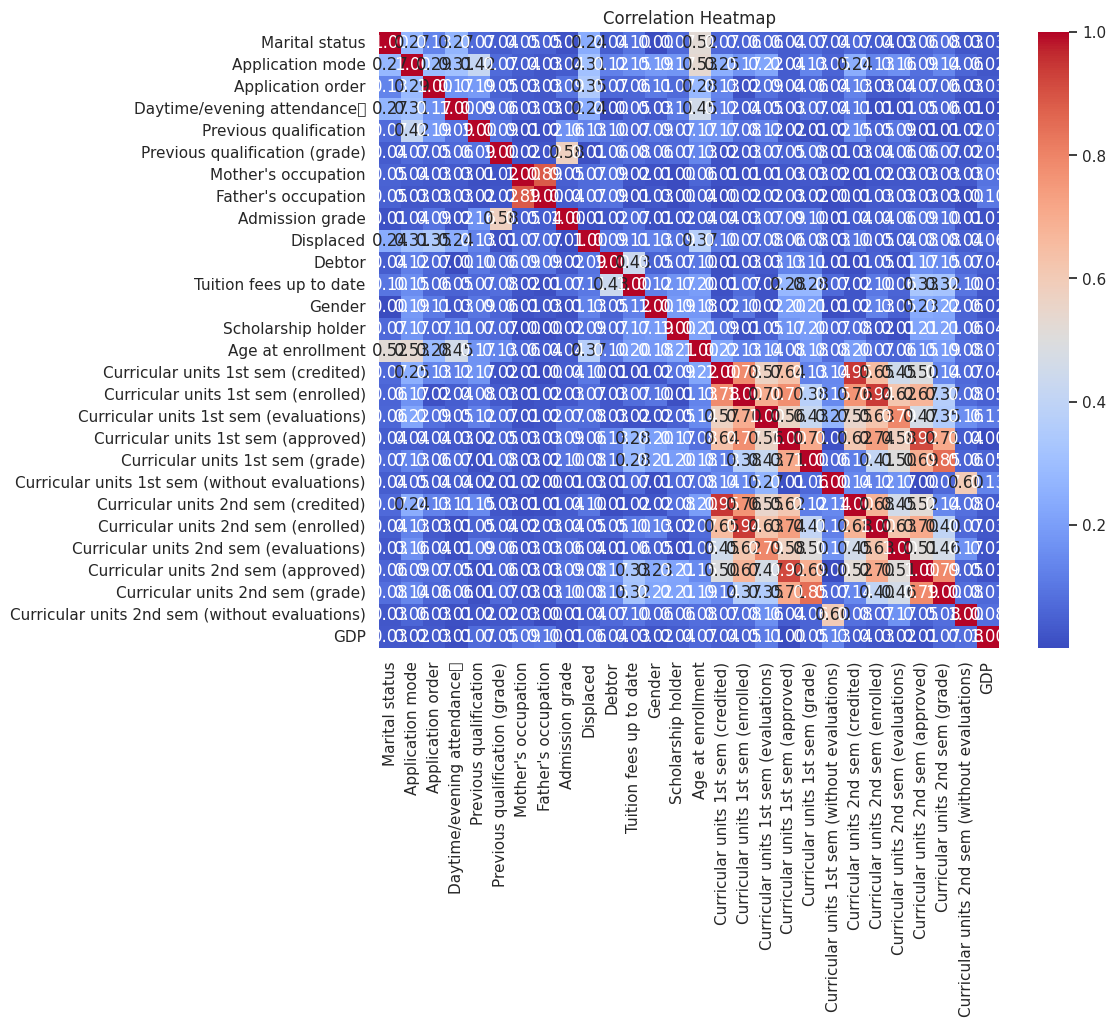

Removed highly correlated features:
["Father's occupation", 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']


In [ ]:
X = df_droped.drop('Target', axis=1)

#the correlation matrix
correlation_matrix = X.corr().abs()

mask = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

threshold = 0.7

correlated_features = [column for column in mask.columns if any(mask[column] > threshold)]

# Drop the highly correlated features
X_filtered = X.drop(columns=correlated_features)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Display the removed features
print("Removed highly correlated features:")
print(correlated_features)


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_droped.drop('Target', axis=1)
y = df_droped['Target']

# Remove highly correlated features
X_filtered = X.drop(["Father's occupation",'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

classifiers = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),

}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print("Classifier:", name)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("\n")


Classifier: GaussianNB
Accuracy: 0.7493112947658402
Precision: 0.7552581261950286
Recall: 0.8797327394209354


Classifier: BernoulliNB
Accuracy: 0.7892561983471075
Precision: 0.7924901185770751
Recall: 0.8930957683741648




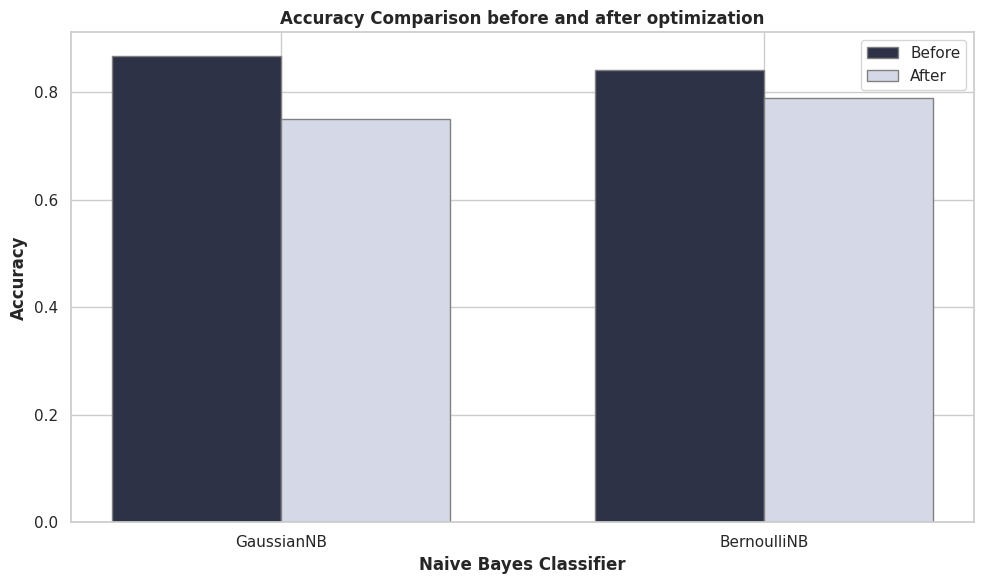

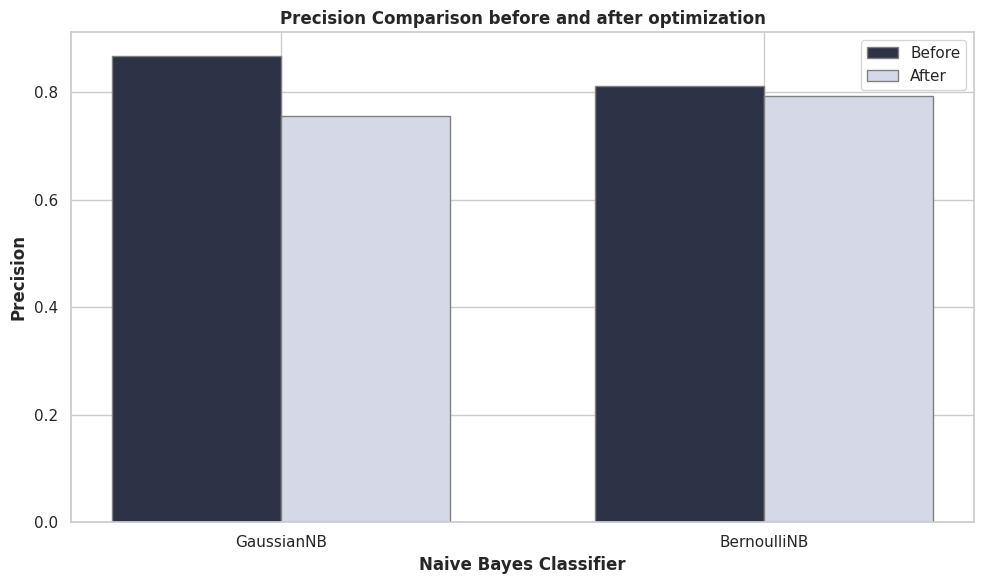

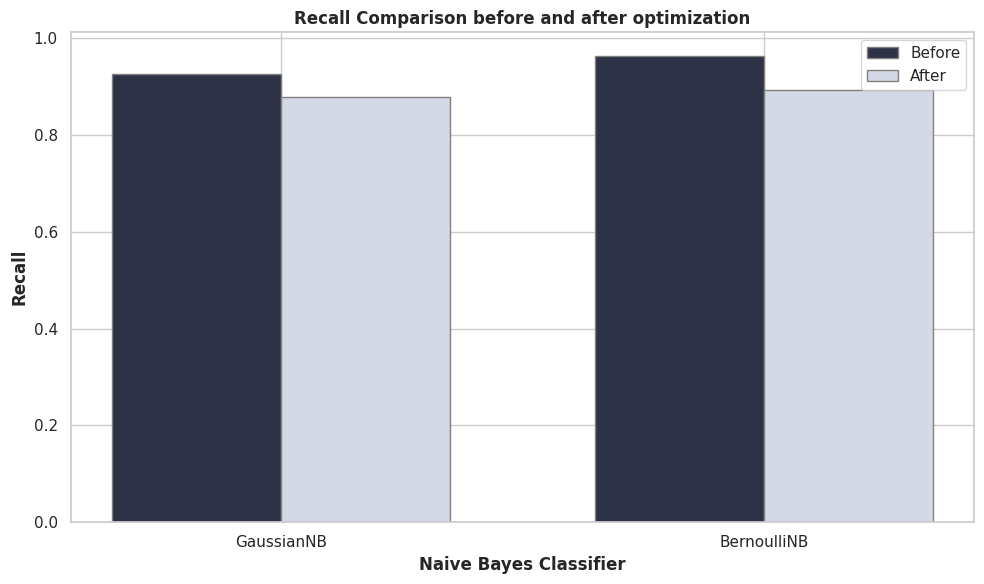

	
Best Recall Classifier: BernoulliNB, Value: 0.964365, Result: Before
	
	
Best Precision Classifier: GaussianNB, Value: 0.868476, Result: Before
	
	
Best Accuracy Classifier: GaussianNB, Value: 0.867769, Result: Before
	


In [ ]:
import numpy as np

results_before = {
    'GaussianNB': {'Accuracy': 0.867769, 'Precision': 0.868476, 'Recall': 0.926503},
    'BernoulliNB': {'Accuracy': 0.840220, 'Precision': 0.812383, 'Recall': 0.964365},
}

results_after = {
    'GaussianNB': {'Accuracy': 0.7493112947658402, 'Precision':  0.7552581261950286, 'Recall': 0.8797327394209354},
    'BernoulliNB': {'Accuracy': 0.7892561983471075, 'Precision': 0.7924901185770751, 'Recall': 0.8930957683741648},
}
classifiers = ['GaussianNB',  'BernoulliNB']

metrics = ['Accuracy', 'Precision', 'Recall']
values_before = np.array([[results_before[classifier][metric] for classifier in classifiers] for metric in metrics])
values_after = np.array([[results_after[classifier][metric] for classifier in classifiers] for metric in metrics])

bar_width = 0.35

r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]

for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    plt.bar(r1, values_before[i], color='#2D3247', width=bar_width, edgecolor='grey', label='Before')
    plt.bar(r2, values_after[i], color='#D5D8E6', width=bar_width, edgecolor='grey', label='After')

    plt.xlabel('Naive Bayes Classifier', fontweight='bold')
    plt.ylabel(metric, fontweight='bold')
    plt.title(f'{metric} Comparison before and after optimization', fontweight='bold')
    plt.xticks([r + bar_width/2 for r in range(len(classifiers))], classifiers)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # *********************** the best recall *******************************
best_recall_before = max(results_before.values(), key=lambda x: x['Recall'])
best_recall_after = max(results_after.values(), key=lambda x: x['Recall'])


if best_recall_before['Recall'] > best_recall_after['Recall']:
    best_recall_value = best_recall_before['Recall']
    best_recall_classifier = [classifier for classifier, metrics in results_before.items() if metrics['Recall'] == best_recall_before['Recall']][0]
    recall_result_type = "Before"
else:
    best_recall_value = best_recall_after['Recall']
    best_recall_classifier = [classifier for classifier, metrics in results_after.items() if metrics['Recall'] == best_recall_after['Recall']][0]
    recall_result_type = "After"
print('\t')
print(f"Best Recall Classifier: {best_recall_classifier}, Value: {best_recall_value}, Result: {recall_result_type}")
print('\t')
# *********************the best precision ***************************************
best_precision_before = max(results_before.values(), key=lambda x: x['Precision'])
best_precision_after = max(results_after.values(), key=lambda x: x['Precision'])

if best_precision_before['Precision'] > best_precision_after['Precision']:
    best_precision_value = best_precision_before['Precision']
    best_precision_classifier = [classifier for classifier, metrics in results_before.items() if metrics['Precision'] == best_precision_before['Precision']][0]
    precision_result_type = "Before"
else:
    best_precision_value = best_precision_after['Precision']
    best_precision_classifier = [classifier for classifier, metrics in results_after.items() if metrics['Precision'] == best_precision_after['Precision']][0]
    precision_result_type = "After"
print('\t')
print(f"Best Precision Classifier: {best_precision_classifier}, Value: {best_precision_value}, Result: {precision_result_type}")
print('\t')

# **************************** the best accuracy *******************************
best_accuracy_before = max(results_before.values(), key=lambda x: x['Accuracy'])
best_accuracy_after = max(results_after.values(), key=lambda x: x['Accuracy'])

# Compare the best accuracy values
if best_accuracy_before['Accuracy'] > best_accuracy_after['Accuracy']:
    best_accuracy_value = best_accuracy_before['Accuracy']
    best_accuracy_classifier = [classifier for classifier, metrics in results_before.items() if metrics['Accuracy'] == best_accuracy_before['Accuracy']][0]
    result_type = "Before"
else:
    best_accuracy_value = best_accuracy_after['Accuracy']
    best_accuracy_classifier = [classifier for classifier, metrics in results_after.items() if metrics['Accuracy'] == best_accuracy_after['Accuracy']][0]
    result_type = "After"
print('\t')
print(f"Best Accuracy Classifier: {best_accuracy_classifier}, Value: {best_accuracy_value}, Result: {result_type}")
print('\t')

# **3 : Using df_ffc**

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#only the best selected features
X = df_ffc.drop('Target', axis=1)
y = df_ffc['Target']

label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#the classifiers
classifiers = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'ComplementNB': ComplementNB(),
    'CategoricalNB': CategoricalNB()
}

# Training and evaluating each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

#results
results_df = pd.DataFrame(results).T
print(results_df)




               Accuracy  Precision    Recall
GaussianNB     0.867769   0.868476  0.926503
MultinomialNB  0.783747   0.780769  0.904232
BernoulliNB    0.840220   0.812383  0.964365
ComplementNB   0.796143   0.798020  0.897550
CategoricalNB  0.884298   0.895879  0.919822


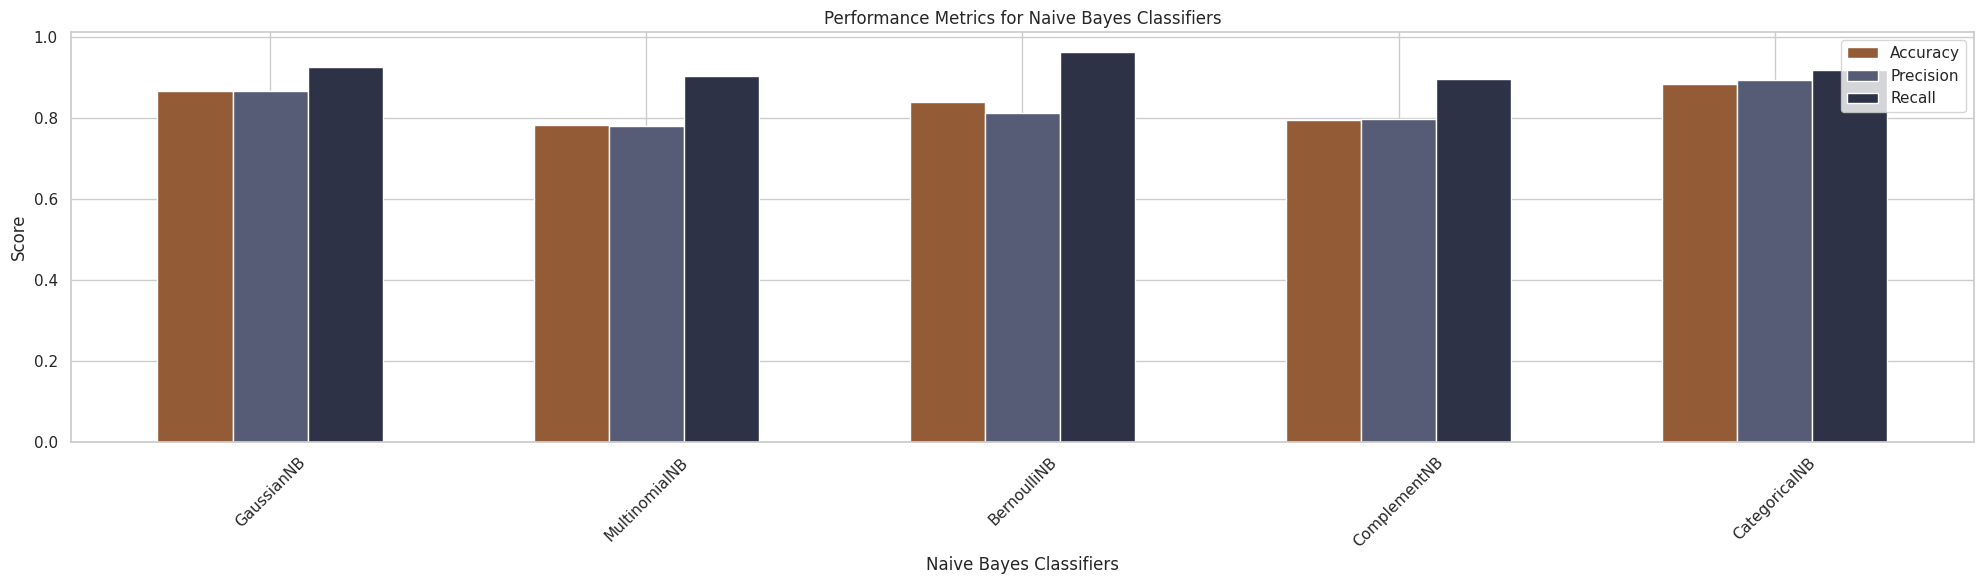

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['GaussianNB', 'MultinomialNB', 'BernoulliNB', 'ComplementNB', 'CategoricalNB']

# Results
accuracy = [0.867769, 0.783747, 0.840220, 0.796143, 0.884298]
precision = [0.868476, 0.780769, 0.812383, 0.798020, 0.895879]
recall = [0.926503, 0.904232, 0.964365, 0.897550, 0.919822]

# Plotting
bar_width = 0.2
index = np.arange(len(classifiers))

plt.figure(figsize=(20, 6))

plt.bar(index - bar_width, accuracy, color='#945B37', width=bar_width, label='Accuracy')
plt.bar(index, precision, color='#565C76', width=bar_width, label='Precision')
plt.bar(index + bar_width, recall, color='#2D3247', width=bar_width, label='Recall')

plt.xlabel('Naive Bayes Classifiers')
plt.ylabel('Score')
plt.title('Performance Metrics for Naive Bayes Classifiers')
plt.xticks(index, classifiers, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


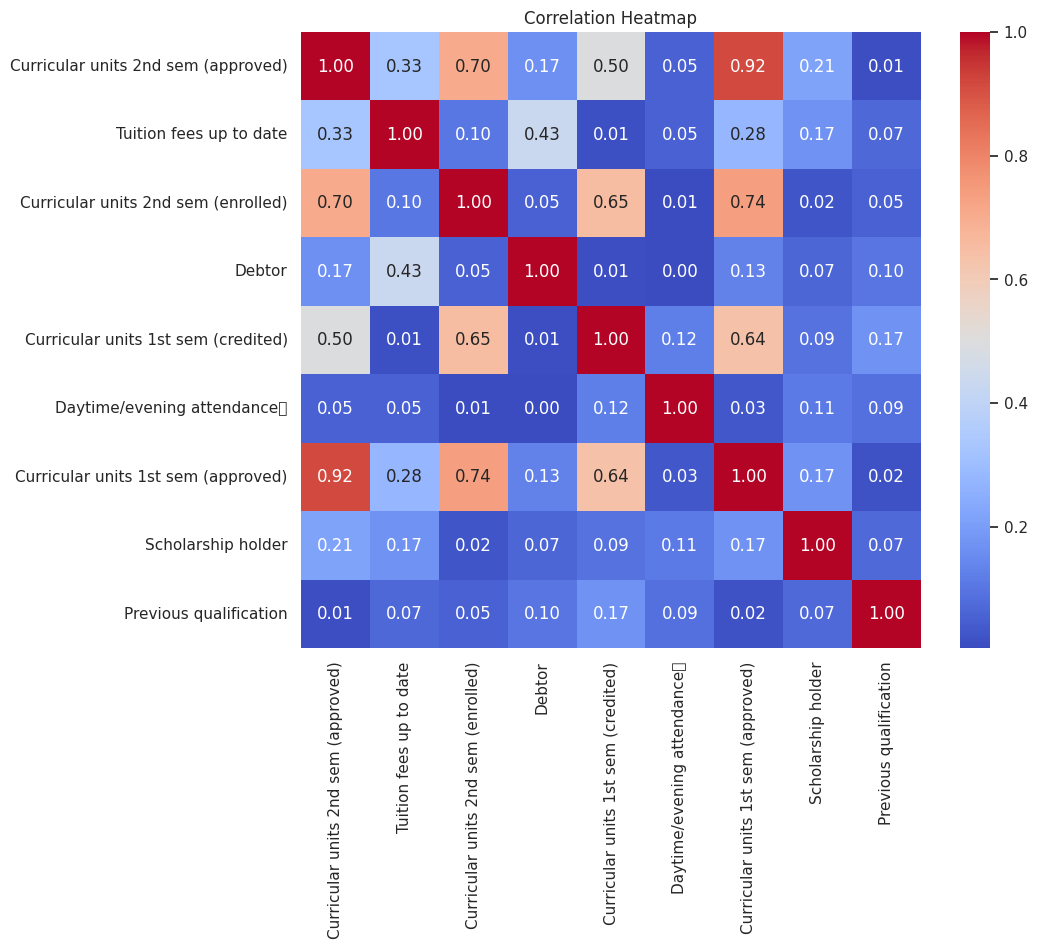

Removed highly correlated features:
['Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (approved)']


In [ ]:
X = df_ffc.drop('Target', axis=1)

#the correlation matrix
correlation_matrix = X.corr().abs()

mask = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

threshold = 0.7

correlated_features = [column for column in mask.columns if any(mask[column] > threshold)]

# Drop the highly correlated features
X_filtered = X.drop(columns=correlated_features)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Display the removed features
print("Removed highly correlated features:")
print(correlated_features)


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_ffc.drop('Target', axis=1)
y = df_ffc['Target']

# Remove highly correlated features
X_filtered = X.drop(['Curricular units 2nd sem (enrolled)','Curricular units 1st sem (approved)'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

classifiers = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "CategoricalNB": CategoricalNB()
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print("Classifier:", name)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("\n")



Classifier: GaussianNB
Accuracy: 0.8539944903581267
Precision: 0.8450704225352113
Recall: 0.9354120267260579


Classifier: MultinomialNB
Accuracy: 0.78099173553719
Precision: 0.7777777777777778
Recall: 0.9042316258351893


Classifier: BernoulliNB
Accuracy: 0.8443526170798898
Precision: 0.8218390804597702
Recall: 0.955456570155902


Classifier: ComplementNB
Accuracy: 0.7892561983471075
Precision: 0.7868217054263565
Recall: 0.9042316258351893


Classifier: CategoricalNB
Accuracy: 0.8911845730027548
Precision: 0.890295358649789
Recall: 0.9398663697104677




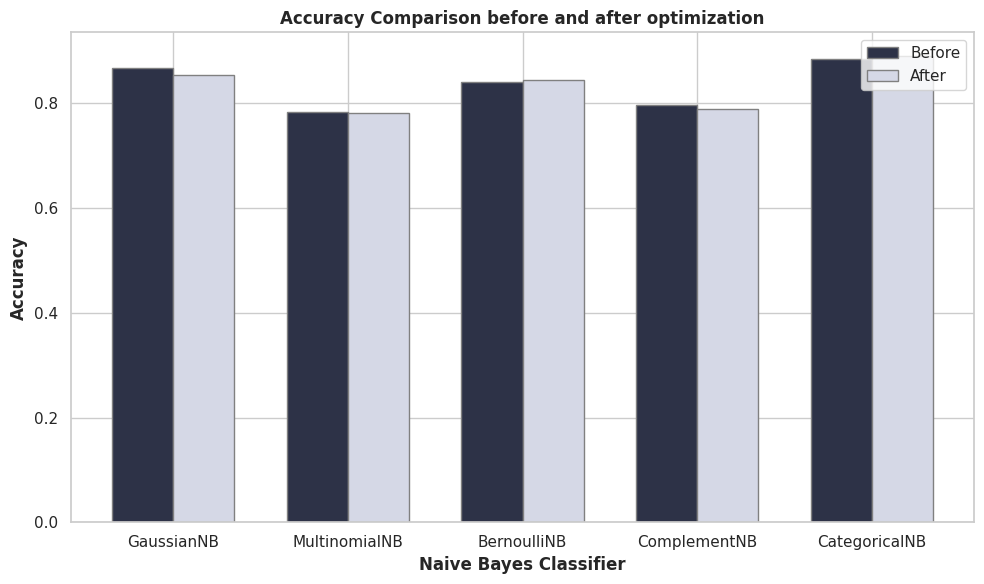

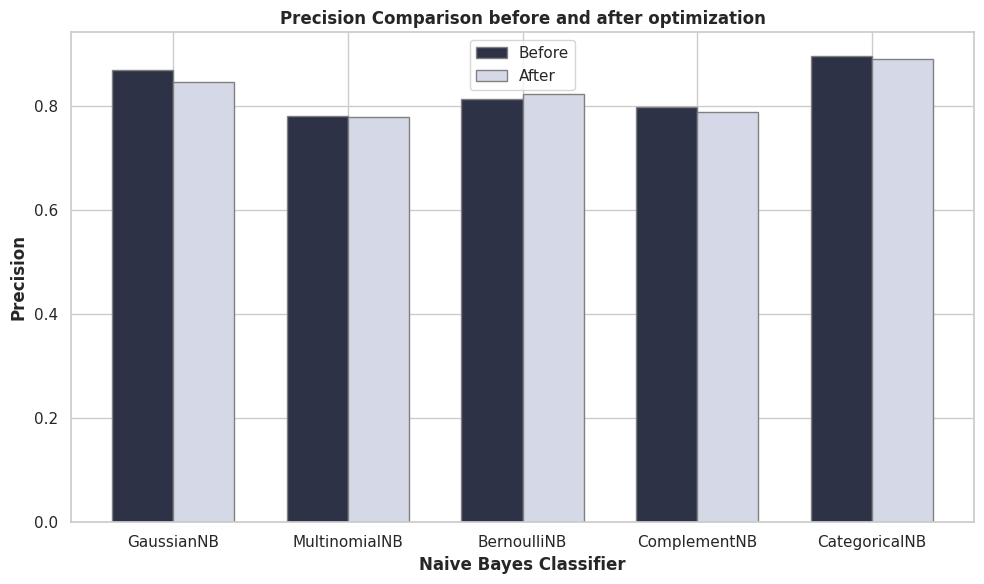

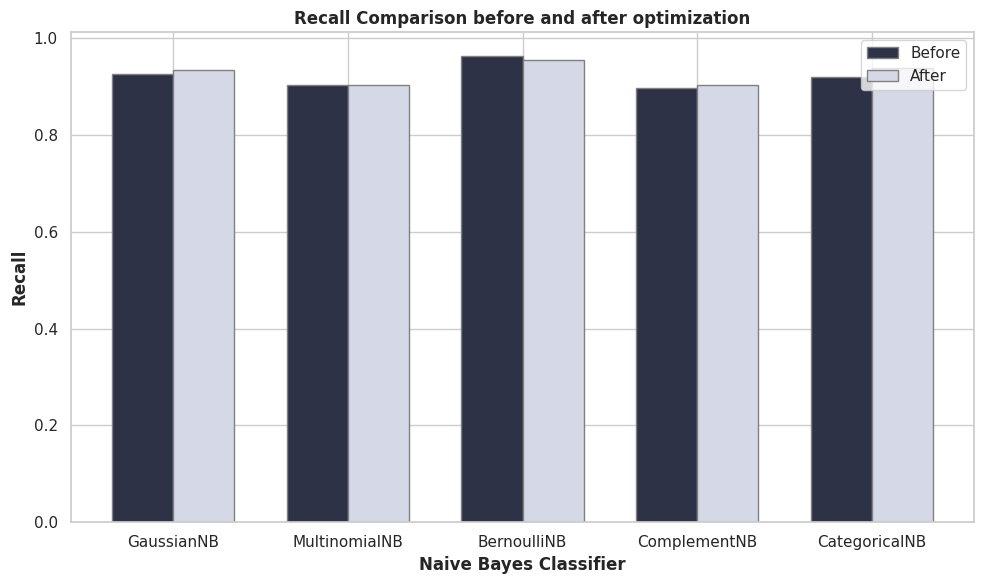

	
Best Recall Classifier: BernoulliNB, Value: 0.964365, Result: Before
	
	
Best Precision Classifier: CategoricalNB, Value: 0.895879, Result: Before
	
	
Best Accuracy Classifier: CategoricalNB, Value: 0.8911845730027548, Result: After
	


In [ ]:
import numpy as np

results_before = {
    'GaussianNB': {'Accuracy': 0.867769, 'Precision': 0.868476, 'Recall': 0.926503},
    'MultinomialNB': {'Accuracy': 0.783747, 'Precision': 0.780769, 'Recall': 0.904232},
    'BernoulliNB': {'Accuracy': 0.840220, 'Precision': 0.812383, 'Recall': 0.964365},
    'ComplementNB': {'Accuracy': 0.796143, 'Precision': 0.798020, 'Recall': 0.897550},
    'CategoricalNB': {'Accuracy': 0.884298, 'Precision': 0.895879, 'Recall': 0.919822}
}

results_after = {
    'GaussianNB': {'Accuracy': 0.8539944903581267, 'Precision': 0.8450704225352113, 'Recall': 0.9354120267260579},
    'MultinomialNB': {'Accuracy': 0.78099173553719, 'Precision': 0.7777777777777778, 'Recall': 0.9042316258351893},
    'BernoulliNB': {'Accuracy': 0.8443526170798898, 'Precision': 0.8218390804597702, 'Recall': 0.955456570155902},
    'ComplementNB': {'Accuracy': 0.7892561983471075, 'Precision': 0.7868217054263565, 'Recall': 0.9042316258351893},
    'CategoricalNB': {'Accuracy': 0.8911845730027548, 'Precision': 0.890295358649789, 'Recall': 0.9398663697104677}
}
classifiers = ['GaussianNB', 'MultinomialNB', 'BernoulliNB', 'ComplementNB', 'CategoricalNB']


metrics = ['Accuracy', 'Precision', 'Recall']
values_before = np.array([[results_before[classifier][metric] for classifier in classifiers] for metric in metrics])
values_after = np.array([[results_after[classifier][metric] for classifier in classifiers] for metric in metrics])

bar_width = 0.35

r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]

for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    plt.bar(r1, values_before[i], color='#2D3247', width=bar_width, edgecolor='grey', label='Before')
    plt.bar(r2, values_after[i], color='#D5D8E6', width=bar_width, edgecolor='grey', label='After')

    plt.xlabel('Naive Bayes Classifier', fontweight='bold')
    plt.ylabel(metric, fontweight='bold')
    plt.title(f'{metric} Comparison before and after optimization', fontweight='bold')
    plt.xticks([r + bar_width/2 for r in range(len(classifiers))], classifiers)
    plt.legend()

    plt.tight_layout()
    plt.show()

# *********************** the best recall *******************************
best_recall_before = max(results_before.values(), key=lambda x: x['Recall'])
best_recall_after = max(results_after.values(), key=lambda x: x['Recall'])


if best_recall_before['Recall'] > best_recall_after['Recall']:
    best_recall_value = best_recall_before['Recall']
    best_recall_classifier = [classifier for classifier, metrics in results_before.items() if metrics['Recall'] == best_recall_before['Recall']][0]
    recall_result_type = "Before"
else:
    best_recall_value = best_recall_after['Recall']
    best_recall_classifier = [classifier for classifier, metrics in results_after.items() if metrics['Recall'] == best_recall_after['Recall']][0]
    recall_result_type = "After"
print('\t')
print(f"Best Recall Classifier: {best_recall_classifier}, Value: {best_recall_value}, Result: {recall_result_type}")
print('\t')
# *********************the best precision ***************************************
best_precision_before = max(results_before.values(), key=lambda x: x['Precision'])
best_precision_after = max(results_after.values(), key=lambda x: x['Precision'])

if best_precision_before['Precision'] > best_precision_after['Precision']:
    best_precision_value = best_precision_before['Precision']
    best_precision_classifier = [classifier for classifier, metrics in results_before.items() if metrics['Precision'] == best_precision_before['Precision']][0]
    precision_result_type = "Before"
else:
    best_precision_value = best_precision_after['Precision']
    best_precision_classifier = [classifier for classifier, metrics in results_after.items() if metrics['Precision'] == best_precision_after['Precision']][0]
    precision_result_type = "After"
print('\t')
print(f"Best Precision Classifier: {best_precision_classifier}, Value: {best_precision_value}, Result: {precision_result_type}")
print('\t')

# **************************** the best accuracy *******************************
best_accuracy_before = max(results_before.values(), key=lambda x: x['Accuracy'])
best_accuracy_after = max(results_after.values(), key=lambda x: x['Accuracy'])

# Compare the best accuracy values
if best_accuracy_before['Accuracy'] > best_accuracy_after['Accuracy']:
    best_accuracy_value = best_accuracy_before['Accuracy']
    best_accuracy_classifier = [classifier for classifier, metrics in results_before.items() if metrics['Accuracy'] == best_accuracy_before['Accuracy']][0]
    result_type = "Before"
else:
    best_accuracy_value = best_accuracy_after['Accuracy']
    best_accuracy_classifier = [classifier for classifier, metrics in results_after.items() if metrics['Accuracy'] == best_accuracy_after['Accuracy']][0]
    result_type = "After"
print('\t')
print(f"Best Accuracy Classifier: {best_accuracy_classifier}, Value: {best_accuracy_value}, Result: {result_type}")
print('\t')

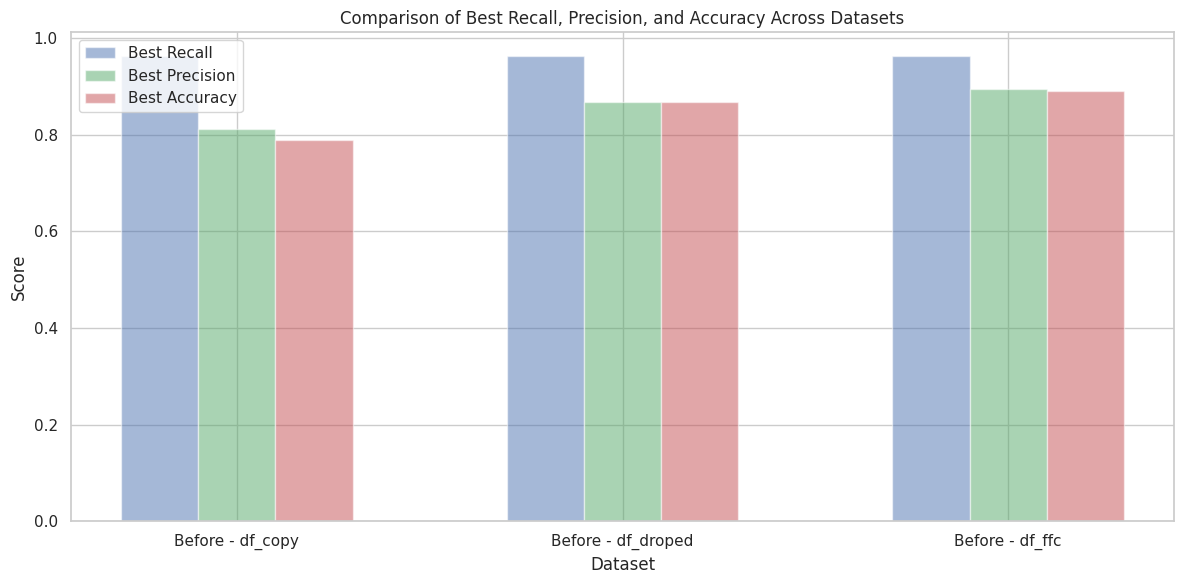

	
Best Recall Classifier: BernoulliNB, Value: 0.964365, Result: Before - df_copy
	
	
Best Precision Classifier: BernoulliNB, Value: 0.895879, Result: Before - df_ffc
	
	
Best Accuracy Classifier: BernoulliNB, Value: 0.8911845730027548, Result: Before - df_ffc
	


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
results = {
    'df_copy': {
        'Best Recall': {'Classifier': 'BernoulliNB', 'Value': 0.964365, 'Result': 'Before'},
        'Best Precision': {'Classifier': 'BernoulliNB', 'Value': 0.812383, 'Result': 'Before'},
        'Best Accuracy': {'Classifier': 'BernoulliNB', 'Value': 0.7892561983471075, 'Result': 'After'}
    },
    'df_droped': {
        'Best Recall': {'Classifier': 'BernoulliNB', 'Value': 0.964365, 'Result': 'Before'},
        'Best Precision': {'Classifier': 'GaussianNB', 'Value': 0.868476, 'Result': 'Before'},
        'Best Accuracy': {'Classifier': 'GaussianNB', 'Value': 0.867769, 'Result': 'Before'}
    },
    'df_ffc': {
        'Best Recall': {'Classifier': 'BernoulliNB', 'Value': 0.964365, 'Result': 'Before'},
        'Best Precision': {'Classifier': 'CategoricalNB', 'Value': 0.895879, 'Result': 'Before'},
        'Best Accuracy': {'Classifier': 'CategoricalNB', 'Value': 0.8911845730027548, 'Result': 'After'}
    }
}

# Extracting data
classifiers = [result['Best Recall']['Classifier'] for result in results.values()]
recall_values = [result['Best Recall']['Value'] for result in results.values()]
precision_values = [result['Best Precision']['Value'] for result in results.values()]
accuracy_values = [result['Best Accuracy']['Value'] for result in results.values()]
results_info = [f"{result['Best Recall']['Result']} - {key}" for key, result in results.items()]

# Plotting bar graphs
bar_width = 0.2
index = np.arange(len(classifiers))

plt.figure(figsize=(12, 6))

plt.bar(index, recall_values, bar_width, label='Best Recall', color='b', alpha=0.5)
plt.bar(index + bar_width, precision_values, bar_width, label='Best Precision', color='g', alpha=0.5)
plt.bar(index + 2 * bar_width, accuracy_values, bar_width, label='Best Accuracy', color='r', alpha=0.5)

plt.xlabel('Dataset')
plt.ylabel('Score')
plt.title('Comparison of Best Recall, Precision, and Accuracy Across Datasets')
plt.xticks(index + bar_width, results_info)
plt.legend()

plt.tight_layout()
plt.show()

# Printing best accuracy, precision, and recall
best_recall = max(recall_values)
best_recall_classifier = classifiers[recall_values.index(best_recall)]
best_recall_result = results_info[recall_values.index(best_recall)]
print('\t')
print(f"Best Recall Classifier: {best_recall_classifier}, Value: {best_recall}, Result: {best_recall_result}")
print('\t')
best_precision = max(precision_values)
best_precision_classifier = classifiers[precision_values.index(best_precision)]
best_precision_result = results_info[precision_values.index(best_precision)]
print('\t')
print(f"Best Precision Classifier: {best_precision_classifier}, Value: {best_precision}, Result: {best_precision_result}")
print('\t')
best_accuracy = max(accuracy_values)
best_accuracy_classifier = classifiers[accuracy_values.index(best_accuracy)]
best_accuracy_result = results_info[accuracy_values.index(best_accuracy)]
print('\t')
print(f"Best Accuracy Classifier: {best_accuracy_classifier}, Value: {best_accuracy}, Result: {best_accuracy_result}")
print('\t')

# **TO DO**
- Algorthm princpe
- explanation of the use params
- the models with the 9 features (df_ffc) and 26 features (df_droped()) and data before
- AUC curves
 preprocessing (df_copy()) + compair the results
- we work with : accuracy and recall
- Comparaison between the best results of all



#### Modélisations proposées :

### Modélisation en étoile :

**Table de faits électoraux :**
- **Fact_Electoraux**
  - Clé primaire : ID_Fact_Electoraux
  - Clés étrangères : ID_Temps, ID_Electeur, ID_Commune, ID_Wilaya, ID_Election, ID_Centre_Vote, ID_Bureau_Vote
  - Mesures : Nb_Inscrits, Nb_Participations, Nb_Bulletins_Exprimes, Nb_Bulletins_Nuls, Budget_Alloue, Budget_Consomme

**Dimensions :**

- **Temps**
  - ID_Temps
  - Date
  - Année
  - Mois
  - Jour

- **Electeurs**
  - ID_Electeur
  - Age
  - Tranche_Age
  - Sexe

- **Commune**
  - ID_Commune
  - Nom_Commune
  - Population

- **Wilaya**
  - ID_Wilaya
  - Nom_Wilaya
  - Région

- **Elections**
  - ID_Election
  - Type_Election
  - Date_Election
  - Budget

- **Centre_Vote**
  - ID_Centre_Vote
  - Code_Commune
  - Adresse_Centre

- **Bureau_Vote**
  - ID_Bureau_Vote
  - Code_Centre_Vote
  - Superficie_Bureau

![Schéma en étoile](https://i.imgur.com/5XnEzRo.png)

### Modélisation en flocon (3ème requête) :

**Table de faits :**
- **Fact_Vote**
  - Clé primaire : ID_Fact_Vote
  - Clés étrangères : ID_Temps, ID_Commune, ID_Wilaya, ID_Election, ID_Centre_Vote, ID_Bureau_Vote
  - Mesures : Nb_Bulletins_Exprimes, Nb_Bulletins_Nuls

**Dimensions :**

- **Temps**
  - ID_Temps
  - Date
  - Année
  - Mois
  - Jour

- **Commune**
  - ID_Commune
  - Nom_Commune
  - ID_Wilaya (Clé étrangère vers la table Wilaya)
  - Population

- **Wilaya**
  - ID_Wilaya
  - Nom_Wilaya
  - Région

- **Elections**
  - ID_Election
  - Type_Election
  - Date_Election
  - Budget

- **Centre_Vote**
  - ID_Centre_Vote
  - Code_Commune
  - Adresse_Centre

- **Bureau_Vote**
  - ID_Bureau_Vote
  - Code_Centre_Vote
  - Superficie_Bureau

![Schéma en flocon](https://i.imgur.com/QH3zowI.png)

### Modèle en constellation :

**Tables de faits :**
- **Fact_Electoraux**
  - Clé primaire : ID_Fact_Electoraux
  - Clés étrangères : ID_Temps, ID_Electeur, ID_Commune, ID_Wilaya, ID_Election, ID_Centre_Vote, ID_Bureau_Vote
  - Mesures : Nb_Inscrits, Budget_Alloue, Budget_Consomme

- **Fact_Vote**
  - Clé primaire : ID_Fact_Vote
  - Clés étrangères : ID_Temps, ID_Commune, ID_Wilaya, ID_Election, ID_Centre_Vote, ID_Bureau_Vote
  - Mesures : Nb_Participations, Nb_Bulletins_Exprimes, Nb_Bulletins_Nuls

**Dimensions :**

- **Temps**
  - ID_Temps
  - Date
  - Année
  - Mois
  - Jour

- **Electeurs**
  - ID_Electeur
  - Age
  - Tranche_Age
  - Sexe

- **Commune**
  - ID_Commune
  - Nom_Commune
  - ID_Wilaya (Clé étrangère vers la table Wilaya)
  - Population

- **Wilaya**
  - ID_Wilaya
  - Nom_Wilaya
  - Région

- **Elections**
  - ID_Election
  - Type_Election
  - Date_Election
  - Budget

- **Centre_Vote**
  - ID_Centre_Vote
  - Code_Commune
  - Adresse_Centre

- **Bureau_Vote**
  - ID_Bureau_Vote
  - Code_Centre_Vote
  - Superficie_Bureau

![Schéma en constellation](https://i.imgur.com/KVwPR3U.png)

Ces modèles permettent d'analyser divers aspects des élections, en optimisant l'organisation des données pour répondre aux requêtes spécifiques mentionnées.